# Import packages

In [1]:
!pip install mlflow tensorflow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
import datetime
import geopandas as gpd
from shapely.geometry import Point, Polygon
import dask.dataframe as dd
from google.colab import drive
drive.mount('/content/drive')

import mlflow
import mlflow.tensorflow
mlflow.tensorflow.autolog()




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
Mounted at /content/drive


# 2025 Data EDA

Import data for one month of NYC Taxi and Limousine Commison (TLC)

January 2025 TLC file

In [2]:
eda_ddf = dd.read_parquet(['/content/drive/MyDrive/PHASE_5_PROJECT/U2025.parquet'])
eda_df = eda_ddf.compute()
eda_df

hvfhs_license_num dispatching_base_num originating_base_num  \
0                  HV0003               B03404               B03404   
1                  HV0005               B03406                 <NA>   
2                  HV0003               B03404               B03404   
3                  HV0003               B03404               B03404   
4                  HV0003               B03404               B03404   
...                   ...                  ...                  ...   
3628445            HV0003               B03404               B03404   
3628446            HV0003               B03404               B03404   
3628447            HV0003               B03404               B03404   
3628448            HV0003               B03404               B03404   
3628449            HV0003               B03404               B03404   

           request_datetime   on_scene_datetime     pickup_datetime  \
0       2025-01-01 00:28:07 2025-01-01 00:31:17 2025-01-01 00:33:25   
1       2025-01-01 00:18:33                 NaT 2025-01-01 00:29:49   
2       2025-01-01 00:28:22 2025-01-01 00:31:52 2025-01-01 00:32:39   
3       2025-01-01 00:27:13 2025-01-01 00:33:58 2025-01-01 00:34:55   
4       2025-01-01 00:33:29 2025-01-01 00:45:46 2025-01-01 00:46:19   
...                     ...                 ...                 ...   
3628445 2025-01-31 23:45:39 2025-01-31 23:51:13 2025-01-31 23:51:52   
3628446 2025-01-31 23:06:19 2025-01-31 23:08:27 2025-01-31 23:10:28   
3628447 2025-01-31 23:25:48 2025-01-31 23:30:47 2025-01-31 23:31:24   
3628448 2025-01-31 23:48:59 2025-01-31 23:55:45 2025-01-31 23:57:06   
3628449 2025-01-31 23:16:25 2025-01-31 23:22:00 2025-01-31 23:22:03   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  \
0       2025-01-01 00:54:24           148           211       1.320  ...   
1       2025-01-01 00:41:52           127           244       3.313  ...   
2       2025-01-01 01:20:33           132           181      13.430  ...   
3       2025-01-01 00:39:19            76            76       0.820  ...   
4       2025-01-01 00:53:56            76            76       1.610  ...   
...                     ...           ...           ...         ...  ...   
3628445 2025-01-31 23:55:59            45           148       0.470  ...   
3628446 2025-01-31 23:29:36           235           242       6.360  ...   
3628447 2025-01-31 23:48:23           242           235       5.280  ...   
3628448 2025-02-01 00:04:35           235           235       0.830  ...   
3628449 2025-01-31 23:42:45            97           133       4.350  ...   

         sales_tax  congestion_surcharge  airport_fee  tips  driver_pay  \
0             1.50                  2.75          0.0   0.0       15.71   
1             1.51                  0.00          0.0   0.0       23.57   
2             3.80                  0.00          2.5   0.0       47.75   
3             1.08                  0.00          0.0   0.0       12.20   
4             1.76                  0.00          0.0   0.0       17.67   
...            ...                   ...          ...   ...         ...   
3628445       2.49                  2.75          0.0   0.0       17.66   
3628446       1.55                  0.00          0.0   0.0       19.80   
3628447       1.68                  0.00          0.0   0.0       17.08   
3628448       1.04                  0.00          0.0   1.0        6.79   
3628449       1.89                  0.00          0.0   0.0       17.99   

         shared_request_flag  shared_match_flag  access_a_ride_flag  \
0                          N                  N                   N   
1                          N                  N                   N   
2                          N                  N                   N   
3                          N                  N                   N   
4                          N                  N                   N   
...                      ...                ...               

In [3]:
eda_df.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

Reduce the row count from 20 million to 1 million

In [4]:
mini_eda_df= eda_df.sample(frac=.05, random_state=42)
mini_eda_df

hvfhs_license_num dispatching_base_num originating_base_num  \
2707637            HV0003               B03404               B03404   
1762921            HV0003               B03404               B03404   
3943151            HV0003               B03404               B03404   
6097672            HV0005               B03406                 <NA>   
3332466            HV0005               B03406                 <NA>   
...                   ...                  ...                  ...   
5036411            HV0003               B03404               B03404   
4331130            HV0005               B03406                 <NA>   
1816595            HV0003               B03404               B03404   
3230322            HV0003               B03404               B03404   
4686214            HV0003               B03404               B03404   

           request_datetime   on_scene_datetime     pickup_datetime  \
2707637 2025-01-05 11:33:26 2025-01-05 11:33:39 2025-01-05 11:34:58   
1762921 2025-01-16 22:52:08 2025-01-16 22:55:45 2025-01-16 22:55:59   
3943151 2025-01-19 23:09:59 2025-01-19 23:27:05 2025-01-19 23:28:09   
6097672 2025-01-23 10:50:08                 NaT 2025-01-23 10:53:50   
3332466 2025-01-19 01:35:56                 NaT 2025-01-19 01:44:22   
...                     ...                 ...                 ...   
5036411 2025-01-09 08:00:19 2025-01-09 08:05:19 2025-01-09 08:05:37   
4331130 2025-01-08 07:14:40                 NaT 2025-01-08 07:16:25   
1816595 2025-01-04 00:45:25 2025-01-04 00:49:12 2025-01-04 00:51:14   
3230322 2025-01-18 22:41:55 2025-01-18 22:44:22 2025-01-18 22:44:42   
4686214 2025-01-21 09:17:40 2025-01-21 09:19:33 2025-01-21 09:20:46   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  \
2707637 2025-01-05 11:54:18           163           144       3.450  ...   
1762921 2025-01-16 23:33:40           155           265      19.010  ...   
3943151 2025-01-19 23:41:19           106            14       5.950  ...   
6097672 2025-01-23 11:10:11           180            95       3.467  ...   
3332466 2025-01-19 01:47:21            91            72       0.508  ...   
...                     ...           ...           ...         ...  ...   
5036411 2025-01-09 08:16:15           136            94       1.380  ...   
4331130 2025-01-08 07:26:24           246           230       1.414  ...   
1816595 2025-01-04 01:10:45            35           132       5.970  ...   
3230322 2025-01-18 22:58:43           229           238       2.780  ...   
4686214 2025-01-21 09:26:18            82           260       0.930  ...   

         sales_tax  congestion_surcharge  airport_fee  tips  driver_pay  \
2707637       2.56                  2.75          0.0  0.00       15.96   
1762921       4.72                  0.00          0.0  4.00       50.22   
3943151       1.66                  0.00          0.0  4.18       16.92   
6097672       1.58                  0.00          0.0  0.00       15.64   
3332466       0.71                  0.00          0.0  0.00        5.47   
...            ...                   ...          ...   ...         ...   
5036411       1.11                  0.00          0.0  0.00       10.63   
4331130       1.01                  2.75          0.0  0.00        7.78   
1816595       1.81                  0.00          0.0  0.00       23.50   
3230322       1.19                  2.75          0.0  0.00       12.12   
4686214       0.79                  0.00          0.0  0.00        4.48   

         shared_request_flag  shared_match_flag  access_a_ride_flag  \
2707637                    N                  N                   N   
1762921                    N                  N                   N   
3943151                    N                  N                   N   
6097672                    N                  N                   N   
3332466                    N                  N                   N   
...                      ...                ...               

Import table containg taxi zones corresponding to LocationID and Borough

In [5]:
zone_lookup = pd.read_csv('/content/drive/MyDrive/PHASE_5_PROJECT/taxi_zone_lookup.csv')
zone_lookup

LocationID        Borough                     Zone service_zone
0             1            EWR           Newark Airport          EWR
1             2         Queens              Jamaica Bay    Boro Zone
2             3          Bronx  Allerton/Pelham Gardens    Boro Zone
3             4      Manhattan            Alphabet City  Yellow Zone
4             5  Staten Island            Arden Heights    Boro Zone
..          ...            ...                      ...          ...
260         261      Manhattan       World Trade Center  Yellow Zone
261         262      Manhattan           Yorkville East  Yellow Zone
262         263      Manhattan           Yorkville West  Yellow Zone
263         264        Unknown                      NaN          NaN
264         265            NaN           Outside of NYC          NaN

[265 rows x 4 columns]

Merge TLC table with taxi zone table to include borough

In [6]:
pickup = zone_lookup[['Borough', 'LocationID']].copy()
pickup.columns= ['pickup_borough','PULocationID',]
dropoff = zone_lookup[['Borough', 'LocationID']].copy()
dropoff.columns =['dropoff_borough', 'DOLocationID',]
df_merged = pd.merge(
            eda_df,
            pickup,
            on = 'PULocationID',
            how = 'left'
)

df_merged = pd.merge(
            df_merged,
            dropoff,
            on = 'DOLocationID',
            how = 'left'
)
df_merged

hvfhs_license_num dispatching_base_num originating_base_num  \
0                   HV0003               B03404               B03404   
1                   HV0005               B03406                 <NA>   
2                   HV0003               B03404               B03404   
3                   HV0003               B03404               B03404   
4                   HV0003               B03404               B03404   
...                    ...                  ...                  ...   
20405661            HV0003               B03404               B03404   
20405662            HV0003               B03404               B03404   
20405663            HV0003               B03404               B03404   
20405664            HV0003               B03404               B03404   
20405665            HV0003               B03404               B03404   

            request_datetime   on_scene_datetime     pickup_datetime  \
0        2025-01-01 00:28:07 2025-01-01 00:31:17 2025-01-01 00:33:25   
1        2025-01-01 00:18:33                 NaT 2025-01-01 00:29:49   
2        2025-01-01 00:28:22 2025-01-01 00:31:52 2025-01-01 00:32:39   
3        2025-01-01 00:27:13 2025-01-01 00:33:58 2025-01-01 00:34:55   
4        2025-01-01 00:33:29 2025-01-01 00:45:46 2025-01-01 00:46:19   
...                      ...                 ...                 ...   
20405661 2025-01-31 23:45:39 2025-01-31 23:51:13 2025-01-31 23:51:52   
20405662 2025-01-31 23:06:19 2025-01-31 23:08:27 2025-01-31 23:10:28   
20405663 2025-01-31 23:25:48 2025-01-31 23:30:47 2025-01-31 23:31:24   
20405664 2025-01-31 23:48:59 2025-01-31 23:55:45 2025-01-31 23:57:06   
20405665 2025-01-31 23:16:25 2025-01-31 23:22:00 2025-01-31 23:22:03   

            dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  \
0        2025-01-01 00:54:24           148           211       1.320  ...   
1        2025-01-01 00:41:52           127           244       3.313  ...   
2        2025-01-01 01:20:33           132           181      13.430  ...   
3        2025-01-01 00:39:19            76            76       0.820  ...   
4        2025-01-01 00:53:56            76            76       1.610  ...   
...                      ...           ...           ...         ...  ...   
20405661 2025-01-31 23:55:59            45           148       0.470  ...   
20405662 2025-01-31 23:29:36           235           242       6.360  ...   
20405663 2025-01-31 23:48:23           242           235       5.280  ...   
20405664 2025-02-01 00:04:35           235           235       0.830  ...   
20405665 2025-01-31 23:42:45            97           133       4.350  ...   

          airport_fee  tips  driver_pay  shared_request_flag  \
0                 0.0   0.0       15.71                    N   
1                 0.0   0.0       23.57                    N   
2                 2.5   0.0       47.75                    N   
3                 0.0   0.0       12.20                    N   
4                 0.0   0.0       17.67                    N   
...               ...   ...         ...                  ...   
20405661          0.0   0.0       17.66                    N   
20405662          0.0   0.0       19.80                    N   
20405663          0.0   0.0       17.08                    N   
20405664          0.0   1.0        6.79                    N   
20405665          0.0   0.0       17.99                    N   

          shared_match_flag  access_a_ride_flag  wav_request_flag  \
0                         N                   N                 N   
1                         N                   N                 N   
2                         N                   N                 N   
3                         N                   N                 N   
4                         N                   N                 N   
...                     ...                 ...               ...   
20405661                  N                   N                 N   
20405662                  N      

Filter for only Manhattan pickup and dropoff locations

In [7]:
manhattan_df = df_merged[(df_merged['pickup_borough'] == 'Manhattan') & (df_merged['dropoff_borough'] == 'Manhattan')].drop(columns=['pickup_borough','dropoff_borough'],axis=1)
manhattan_df

hvfhs_license_num dispatching_base_num originating_base_num  \
0                   HV0003               B03404               B03404   
1                   HV0005               B03406                 <NA>   
8                   HV0005               B03406                 <NA>   
10                  HV0005               B03406                 <NA>   
11                  HV0005               B03406                 <NA>   
...                    ...                  ...                  ...   
20405653            HV0003               B03404               B03404   
20405658            HV0003               B03404               B03404   
20405659            HV0003               B03404               B03404   
20405660            HV0003               B03404               B03404   
20405661            HV0003               B03404               B03404   

            request_datetime   on_scene_datetime     pickup_datetime  \
0        2025-01-01 00:28:07 2025-01-01 00:31:17 2025-01-01 00:33:25   
1        2025-01-01 00:18:33                 NaT 2025-01-01 00:29:49   
8        2025-01-01 00:10:48                 NaT 2025-01-01 00:12:35   
10       2025-01-01 00:02:47                 NaT 2025-01-01 00:06:32   
11       2025-01-01 00:10:09                 NaT 2025-01-01 00:19:16   
...                      ...                 ...                 ...   
20405653 2025-01-31 23:41:20 2025-01-31 23:44:35 2025-01-31 23:45:11   
20405658 2025-01-31 23:11:26 2025-01-31 23:12:17 2025-01-31 23:13:46   
20405659 2025-01-31 23:24:02 2025-01-31 23:25:37 2025-01-31 23:26:04   
20405660 2025-01-31 23:40:08 2025-01-31 23:41:09 2025-01-31 23:42:21   
20405661 2025-01-31 23:45:39 2025-01-31 23:51:13 2025-01-31 23:51:52   

            dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  \
0        2025-01-01 00:54:24           148           211       1.320  ...   
1        2025-01-01 00:41:52           127           244       3.313  ...   
8        2025-01-01 00:51:37           234            41       7.254  ...   
10       2025-01-01 00:17:04           141           239       2.095  ...   
11       2025-01-01 00:28:49           239           166       2.876  ...   
...                      ...           ...           ...         ...  ...   
20405653 2025-01-31 23:57:52           243           243       1.370  ...   
20405658 2025-01-31 23:20:56           249            79       0.720  ...   
20405659 2025-01-31 23:32:12           114           113       0.800  ...   
20405660 2025-01-31 23:48:20           114           144       0.630  ...   
20405661 2025-01-31 23:55:59            45           148       0.470  ...   

          sales_tax  congestion_surcharge  airport_fee  tips  driver_pay  \
0              1.50                  2.75          0.0  0.00       15.71   
1              1.51                  0.00          0.0  0.00       23.57   
8              2.86                  2.75          0.0  0.00       35.74   
10             1.11                  2.75          0.0  3.36       13.02   
11             1.05                  2.75          0.0  0.00       13.01   
...             ...                   ...          ...   ...         ...   
20405653       0.78                  0.00          0.0  0.00        9.25   
20405658       2.40                  2.75          0.0  3.29       12.92   
20405659       1.85                  2.75          0.0  0.00       10.72   
20405660       2.61                  2.75          0.0  0.00       16.64   
20405661       2.49                  2.75          0.0  0.00       17.66   

          shared_request_flag  shared_match_flag  access_a_ride_flag  \
0                           N                  N                   N   
1                           N                  N                   N   
8                           N                  N                   N   
10                          N                  N                   N   
11                          N                  N                   N   
...      

Remove base fares equal to zero

In [8]:
manhattan_df_2 = manhattan_df[manhattan_df['base_passenger_fare'] != 0]

In [9]:
pricing_df_all =manhattan_df_2['base_passenger_fare'].sort_values(ascending=False)

<Axes: xlabel='base_passenger_fare', ylabel='trip_miles'>

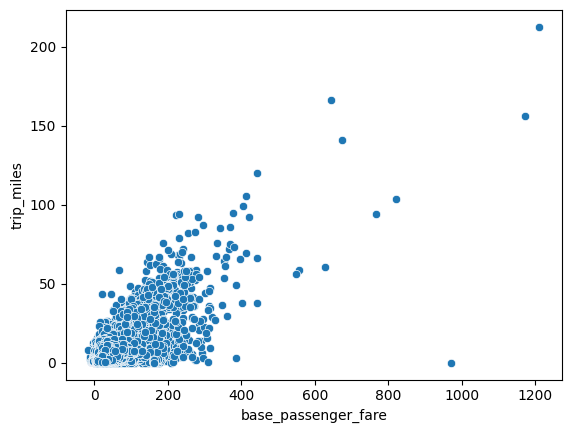

In [10]:
sns.scatterplot(data=manhattan_df_2, x = 'base_passenger_fare', y= 'trip_miles')

In [11]:
pricing_df_all_2 = pricing_df_all[(pricing_df_all > 0 ) & (pricing_df_all < 8)]

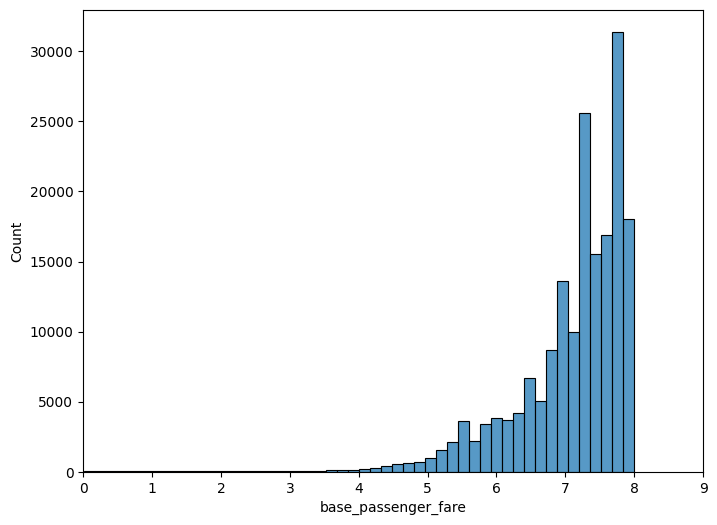

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(pricing_df_all_2, bins=50)

plt.xlim(0,9)
plt.show()

Drop all rows less than 5 and greater than 120

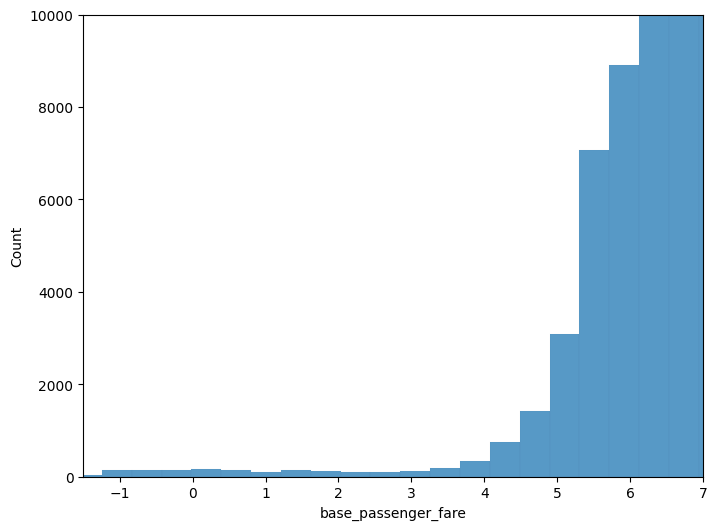

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(pricing_df_all, bins=3000)

plt.xlim(-1.5,7)
plt.ylim(0,10000)
plt.show()

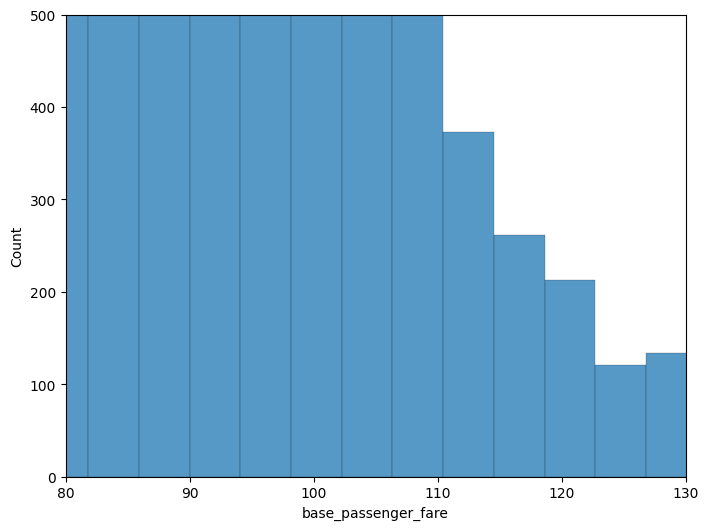

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(pricing_df_all, bins=300)

plt.xlim(80,130)
plt.ylim(0,500)
plt.show()

In [15]:
manhattan_df_3 = manhattan_df_2[(manhattan_df_2['base_passenger_fare'] > 5) & (manhattan_df_2['base_passenger_fare'] < 120)]

In [16]:
manhattan_df_3['base_passenger_fare'].describe()

count    5.505321e+06
mean     2.023235e+01
std      1.121046e+01
min      5.010000e+00
25%      1.217000e+01
50%      1.737000e+01
75%      2.522000e+01
max      1.199800e+02
Name: base_passenger_fare, dtype: float64

<Axes: xlabel='base_passenger_fare', ylabel='trip_miles'>

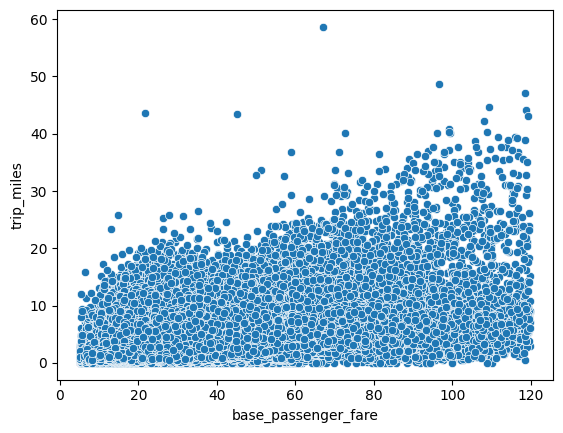

In [17]:
sns.scatterplot(data=manhattan_df_3,  x = 'base_passenger_fare', y = 'trip_miles' )

Remove rows that where the base fare is over 100 and the pickup and dropoff location is the same

In [18]:
manhattan_df_4 = manhattan_df_3[(manhattan_df_3['base_passenger_fare'] <100) & (manhattan_df_3['PULocationID'] != manhattan_df_3['DOLocationID'])]

In [19]:
manhattan_df_4.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [20]:
manhattan_df_4.isna().sum()

hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    1447884
request_datetime              0
on_scene_datetime       1447884
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64

In [21]:
manhattan_df_4.dropna()

hvfhs_license_num dispatching_base_num originating_base_num  \
0                   HV0003               B03404               B03404   
26                  HV0003               B03404               B03404   
27                  HV0003               B03404               B03404   
28                  HV0003               B03404               B03404   
29                  HV0003               B03404               B03404   
...                    ...                  ...                  ...   
20405645            HV0003               B03404               B03404   
20405658            HV0003               B03404               B03404   
20405659            HV0003               B03404               B03404   
20405660            HV0003               B03404               B03404   
20405661            HV0003               B03404               B03404   

            request_datetime   on_scene_datetime     pickup_datetime  \
0        2025-01-01 00:28:07 2025-01-01 00:31:17 2025-01-01 00:33:25   
26       2025-01-01 00:18:33 2025-01-01 00:22:39 2025-01-01 00:23:47   
27       2025-01-01 00:38:50 2025-01-01 00:47:19 2025-01-01 00:48:32   
28       2025-01-01 00:01:51 2025-01-01 00:03:23 2025-01-01 00:04:36   
29       2025-01-01 00:15:03 2025-01-01 00:18:51 2025-01-01 00:20:39   
...                      ...                 ...                 ...   
20405645 2025-01-31 23:41:32 2025-01-31 23:46:08 2025-01-31 23:47:49   
20405658 2025-01-31 23:11:26 2025-01-31 23:12:17 2025-01-31 23:13:46   
20405659 2025-01-31 23:24:02 2025-01-31 23:25:37 2025-01-31 23:26:04   
20405660 2025-01-31 23:40:08 2025-01-31 23:41:09 2025-01-31 23:42:21   
20405661 2025-01-31 23:45:39 2025-01-31 23:51:13 2025-01-31 23:51:52   

            dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  \
0        2025-01-01 00:54:24           148           211        1.32  ...   
26       2025-01-01 00:42:24           229           114        4.28  ...   
27       2025-01-01 00:59:51           249           211        1.07  ...   
28       2025-01-01 00:16:23           141            41        2.72  ...   
29       2025-01-01 00:34:00            41           238        2.29  ...   
...                      ...           ...           ...         ...  ...   
20405645 2025-02-01 00:00:16           237           232        4.50  ...   
20405658 2025-01-31 23:20:56           249            79        0.72  ...   
20405659 2025-01-31 23:32:12           114           113        0.80  ...   
20405660 2025-01-31 23:48:20           114           144        0.63  ...   
20405661 2025-01-31 23:55:59            45           148        0.47  ...   

          sales_tax  congestion_surcharge  airport_fee  tips  driver_pay  \
0              1.50                  2.75          0.0  0.00       15.71   
26             3.90                  2.75          0.0  7.78       30.37   
27             2.15                  2.75          0.0  0.00       19.17   
28             1.46                  2.75          0.0  0.00       15.71   
29             1.18                  2.75          0.0  1.00       16.03   
...             ...                   ...          ...   ...         ...   
20405645       2.00                  2.75          0.0  0.00       13.38   
20405658       2.40                  2.75          0.0  3.29       12.92   
20405659       1.85                  2.75          0.0  0.00       10.72   
20405660       2.61                  2.75          0.0  0.00       16.64   
20405661       2.49                  2.75          0.0  0.00       17.66   

          shared_request_flag  shared_match_flag  access_a_ride_flag  \
0                           N                  N                   N   
26                          N                  N                   N   
27                          N                  N                   N   
28                          N                  N                   N   
29                          N                  N                   N   
...      

Filter for 'HV0003' in hvfhs_license_num column as this is the desingated code for Ubers

In [22]:
manhattan_df_4['hvfhs_license_num'].value_counts()

hvfhs_license_num
HV0003    3819818
HV0005    1451460
Name: count, dtype: int64[pyarrow]

In [23]:
temp_df_1 = manhattan_df_4.loc[manhattan_df_4['hvfhs_license_num']=='HV0003']

Filter out shared rides where the request was both requested and fufilled as the price is the same for both

In [24]:
ddf_temp_2 = temp_df_1[(temp_df_1['shared_match_flag'] == 'N')& (temp_df_1['shared_request_flag'] == 'N')]
ddf_temp_2.head()

hvfhs_license_num dispatching_base_num originating_base_num  \
0             HV0003               B03404               B03404   
26            HV0003               B03404               B03404   
27            HV0003               B03404               B03404   
28            HV0003               B03404               B03404   
29            HV0003               B03404               B03404   

      request_datetime   on_scene_datetime     pickup_datetime  \
0  2025-01-01 00:28:07 2025-01-01 00:31:17 2025-01-01 00:33:25   
26 2025-01-01 00:18:33 2025-01-01 00:22:39 2025-01-01 00:23:47   
27 2025-01-01 00:38:50 2025-01-01 00:47:19 2025-01-01 00:48:32   
28 2025-01-01 00:01:51 2025-01-01 00:03:23 2025-01-01 00:04:36   
29 2025-01-01 00:15:03 2025-01-01 00:18:51 2025-01-01 00:20:39   

      dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  \
0  2025-01-01 00:54:24           148           211        1.32  ...   
26 2025-01-01 00:42:24           229           114        4.28  ...   
27 2025-01-01 00:59:51           249           211        1.07  ...   
28 2025-01-01 00:16:23           141            41        2.72  ...   
29 2025-01-01 00:34:00            41           238        2.29  ...   

    sales_tax  congestion_surcharge  airport_fee  tips  driver_pay  \
0        1.50                  2.75          0.0  0.00       15.71   
26       3.90                  2.75          0.0  7.78       30.37   
27       2.15                  2.75          0.0  0.00       19.17   
28       1.46                  2.75          0.0  0.00       15.71   
29       1.18                  2.75          0.0  1.00       16.03   

    shared_request_flag  shared_match_flag  access_a_ride_flag  \
0                     N                  N                   N   
26                    N                  N                   N   
27                    N                  N                   N   
28                    N                  N                   N   
29                    N                  N                   N   

    wav_request_flag wav_match_flag  
0                  N              N  
26                 N              N  
27                 N              N  
28                 N              N  
29                 N              N  

[5 rows x 24 columns]

In [25]:
ddf_temp_3 = ddf_temp_2.drop(columns=['shared_match_flag','shared_request_flag'])
ddf_temp_3.head()

hvfhs_license_num dispatching_base_num originating_base_num  \
0             HV0003               B03404               B03404   
26            HV0003               B03404               B03404   
27            HV0003               B03404               B03404   
28            HV0003               B03404               B03404   
29            HV0003               B03404               B03404   

      request_datetime   on_scene_datetime     pickup_datetime  \
0  2025-01-01 00:28:07 2025-01-01 00:31:17 2025-01-01 00:33:25   
26 2025-01-01 00:18:33 2025-01-01 00:22:39 2025-01-01 00:23:47   
27 2025-01-01 00:38:50 2025-01-01 00:47:19 2025-01-01 00:48:32   
28 2025-01-01 00:01:51 2025-01-01 00:03:23 2025-01-01 00:04:36   
29 2025-01-01 00:15:03 2025-01-01 00:18:51 2025-01-01 00:20:39   

      dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  tolls  \
0  2025-01-01 00:54:24           148           211        1.32  ...    0.0   
26 2025-01-01 00:42:24           229           114        4.28  ...    0.0   
27 2025-01-01 00:59:51           249           211        1.07  ...    0.0   
28 2025-01-01 00:16:23           141            41        2.72  ...    0.0   
29 2025-01-01 00:34:00            41           238        2.29  ...    0.0   

     bcf  sales_tax  congestion_surcharge  airport_fee  tips  driver_pay  \
0   0.46       1.50                  2.75          0.0  0.00       15.71   
26  1.21       3.90                  2.75          0.0  7.78       30.37   
27  0.66       2.15                  2.75          0.0  0.00       19.17   
28  0.45       1.46                  2.75          0.0  0.00       15.71   
29  0.36       1.18                  2.75          0.0  1.00       16.03   

    access_a_ride_flag  wav_request_flag wav_match_flag  
0                    N                 N              N  
26                   N                 N              N  
27                   N                 N              N  
28                   N                 N              N  
29                   N                 N              N  

[5 rows x 22 columns]

Analyzing the access_a_ride_flag column which is Uber users who have thier rides subsidized by the MTA

In [26]:
ddf_temp_3['access_a_ride_flag'].value_counts()

access_a_ride_flag
N    3693315
Y       2283
Name: count, dtype: int64[pyarrow]

The subsidized fare is about $2.50 so the base fare incldued here is the total price paid to Uber

In [27]:
ddf_temp_3[ddf_temp_3['access_a_ride_flag'] == 'Y']['base_passenger_fare'].median()

25.0

In [28]:
ddf_temp_3[ddf_temp_3['access_a_ride_flag'] == 'Y']['trip_miles'].median()

3.23

In [29]:
ddf_temp_3[ddf_temp_3['access_a_ride_flag'] == 'N']['base_passenger_fare'].median()

18.81

In [30]:
ddf_temp_3[ddf_temp_3['access_a_ride_flag'] == 'N']['trip_miles'].median()

1.91

In [31]:
ddf_temp_3[(ddf_temp_3['access_a_ride_flag'] == 'Y') & (ddf_temp_3['trip_miles']  < 2)& (ddf_temp_3['trip_miles']  > 1)]['base_passenger_fare'].describe()

count    509.000000
mean      15.527642
std        6.751434
min        5.570000
25%       11.270000
50%       13.560000
75%       18.060000
max       51.600000
Name: base_passenger_fare, dtype: float64

In [32]:
ddf_temp_3[(ddf_temp_3['access_a_ride_flag'] == 'N') & (ddf_temp_3['trip_miles']  < 2)& (ddf_temp_3['trip_miles']  > 1)]['base_passenger_fare'].describe()

count    1.403330e+06
mean     1.680704e+01
std      7.426771e+00
min      5.010000e+00
25%      1.190000e+01
50%      1.491000e+01
75%      1.918000e+01
max      9.983000e+01
Name: base_passenger_fare, dtype: float64

In [33]:
ddf_temp_3[(ddf_temp_3['access_a_ride_flag'] == 'Y')]['PULocationID'].value_counts()[:10]

PULocationID
41     150
75     130
90     116
74     100
238     91
42      81
143     80
244     71
140     60
170     55
Name: count, dtype: int64

In [34]:
ddf_temp_3[(ddf_temp_3['access_a_ride_flag'] == 'N')]['PULocationID'].value_counts()[:10]

PULocationID
161    127493
230    118021
234    116287
79     115828
231    114310
246    114255
68     103707
249     97807
164     93927
237     93535
Name: count, dtype: int64

The rides that are subsidized by the MTA may be important to keep as they provide addtional data and have about the same base fare

In [35]:
ddf_temp_3

hvfhs_license_num dispatching_base_num originating_base_num  \
0                   HV0003               B03404               B03404   
26                  HV0003               B03404               B03404   
27                  HV0003               B03404               B03404   
28                  HV0003               B03404               B03404   
29                  HV0003               B03404               B03404   
...                    ...                  ...                  ...   
20405645            HV0003               B03404               B03404   
20405658            HV0003               B03404               B03404   
20405659            HV0003               B03404               B03404   
20405660            HV0003               B03404               B03404   
20405661            HV0003               B03404               B03404   

            request_datetime   on_scene_datetime     pickup_datetime  \
0        2025-01-01 00:28:07 2025-01-01 00:31:17 2025-01-01 00:33:25   
26       2025-01-01 00:18:33 2025-01-01 00:22:39 2025-01-01 00:23:47   
27       2025-01-01 00:38:50 2025-01-01 00:47:19 2025-01-01 00:48:32   
28       2025-01-01 00:01:51 2025-01-01 00:03:23 2025-01-01 00:04:36   
29       2025-01-01 00:15:03 2025-01-01 00:18:51 2025-01-01 00:20:39   
...                      ...                 ...                 ...   
20405645 2025-01-31 23:41:32 2025-01-31 23:46:08 2025-01-31 23:47:49   
20405658 2025-01-31 23:11:26 2025-01-31 23:12:17 2025-01-31 23:13:46   
20405659 2025-01-31 23:24:02 2025-01-31 23:25:37 2025-01-31 23:26:04   
20405660 2025-01-31 23:40:08 2025-01-31 23:41:09 2025-01-31 23:42:21   
20405661 2025-01-31 23:45:39 2025-01-31 23:51:13 2025-01-31 23:51:52   

            dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  \
0        2025-01-01 00:54:24           148           211        1.32  ...   
26       2025-01-01 00:42:24           229           114        4.28  ...   
27       2025-01-01 00:59:51           249           211        1.07  ...   
28       2025-01-01 00:16:23           141            41        2.72  ...   
29       2025-01-01 00:34:00            41           238        2.29  ...   
...                      ...           ...           ...         ...  ...   
20405645 2025-02-01 00:00:16           237           232        4.50  ...   
20405658 2025-01-31 23:20:56           249            79        0.72  ...   
20405659 2025-01-31 23:32:12           114           113        0.80  ...   
20405660 2025-01-31 23:48:20           114           144        0.63  ...   
20405661 2025-01-31 23:55:59            45           148        0.47  ...   

          tolls   bcf  sales_tax  congestion_surcharge  airport_fee  tips  \
0           0.0  0.46       1.50                  2.75          0.0  0.00   
26          0.0  1.21       3.90                  2.75          0.0  7.78   
27          0.0  0.66       2.15                  2.75          0.0  0.00   
28          0.0  0.45       1.46                  2.75          0.0  0.00   
29          0.0  0.36       1.18                  2.75          0.0  1.00   
...         ...   ...        ...                   ...          ...   ...   
20405645    0.0  0.57       2.00                  2.75          0.0  0.00   
20405658    0.0  0.70       2.40                  2.75          0.0  3.29   
20405659    0.0  0.53       1.85                  2.75          0.0  0.00   
20405660    0.0  0.77       2.61                  2.75          0.0  0.00   
20405661    0.0  0.73       2.49                  2.75          0.0  0.00   

          driver_pay  access_a_ride_flag  wav_request_flag wav_match_flag  
0              15.71                   N                 N              N  
26             30.37                   N                 N              N  
27             19.17                   N                 N              N  
28             15.71                   N                 N              N  
29             16.03                   N         

In [36]:
ddf_temp_3['wav_request_flag'].value_counts()

wav_request_flag
N    3685578
Y      10020
Name: count, dtype: int64[pyarrow]

In [37]:
ddf_temp_3['wav_match_flag'].value_counts()

wav_match_flag
N    3244334
Y     451264
Name: count, dtype: int64[pyarrow]

Keep both wav_request_flag features

In [38]:
ddf_temp_3[ddf_temp_3['wav_request_flag'] == 'Y']['base_passenger_fare'].median()

17.81

In [39]:
ddf_temp_3[ddf_temp_3['wav_request_flag'] == 'N']['base_passenger_fare'].median()

18.81

In [40]:
ddf_temp_3[ddf_temp_3['wav_match_flag'] == 'Y']['base_passenger_fare'].median()

17.35

In [41]:
ddf_temp_3[ddf_temp_3['wav_match_flag'] == 'N']['base_passenger_fare'].median()

19.0

In [42]:
ddf_temp_3.describe()

request_datetime           on_scene_datetime  \
count                     3695598                     3695598   
mean   2025-01-17 04:34:52.990624  2025-01-17 04:37:35.724060   
min           2024-12-31 23:02:17         2024-12-31 23:50:35   
25%    2025-01-09 21:24:54.250000  2025-01-09 21:27:35.500000   
50%    2025-01-17 09:14:55.500000  2025-01-17 09:17:02.500000   
75%    2025-01-24 18:30:28.750000         2025-01-24 18:34:12   
max           2025-01-31 23:58:30         2025-01-31 23:59:52   
std                           NaN                         NaN   

                  pickup_datetime            dropoff_datetime  PULocationID  \
count                     3695598                     3695598  3.695598e+06   
mean   2025-01-17 04:38:38.051577  2025-01-17 04:52:57.176569  1.587457e+02   
min           2025-01-01 00:00:01         2025-01-01 00:03:56  4.000000e+00   
25%           2025-01-09 21:28:39         2025-01-09 21:42:16  1.070000e+02   
50%           2025-01-17 09:18:02  2025-01-17 09:33:21.500000  1.610000e+02   
75%           2025-01-24 18:35:09         2025-01-24 18:50:48  2.320000e+02   
max           2025-01-31 23:59:59         2025-02-01 00:52:14  2.630000e+02   
std                           NaN                         NaN  7.038690e+01   

       DOLocationID    trip_miles     trip_time  base_passenger_fare  \
count  3.695598e+06  3.695598e+06  3.695598e+06         3.695598e+06   
mean   1.593876e+02  2.575945e+00  8.591256e+02         2.171657e+01   
min    4.000000e+00  0.000000e+00  1.600000e+01         5.010000e+00   
25%    1.070000e+02  1.250000e+00  5.330000e+02         1.313000e+01   
50%    1.610000e+02  1.910000e+00  7.720000e+02         1.881000e+01   
75%    2.320000e+02  3.180000e+00  1.098000e+03         2.713000e+01   
max    2.630000e+02  5.868000e+01  8.685000e+03         9.999000e+01   
std    6.985084e+01  1.981898e+00  4.399246e+02         1.177638e+01   

              tolls           bcf     sales_tax  congestion_surcharge  \
count  3.695598e+06  3.695598e+06  3.695598e+06          3.695598e+06   
mean   1.445714e-02  5.692252e-01  1.931506e+00          2.518525e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00          0.000000e+00   
25%    0.000000e+00  3.300000e-01  1.150000e+00          2.750000e+00   
50%    0.000000e+00  4.900000e-01  1.670000e+00          2.750000e+00   
75%    0.000000e+00  7.200000e-01  2.420000e+00          2.750000e+00   
max    5.824000e+01  3.100000e+00  1.210000e+01          2.750000e+00   
std    4.296657e-01  3.270781e-01  1.068378e+00          7.633577e-01   

       airport_fee          tips    driver_pay  
count    3695598.0  3.695598e+06  3.695598e+06  
mean           0.0  1.089549e+00  1.397654e+01  
min            0.0  0.000000e+00 -6.940000e+00  
25%            0.0  0.000000e+00  8.230000e+00  
50%            0.0  0.000000e+00  1.208000e+01  
75%            0.0  0.000000e+00  1.778000e+01  
max            0.0  8.000000e+01  1.727700e+02  
std            0.0  2.380982e+00  7.797975e+00

In [43]:
ddf_temp_3['tolls'].sort_values(ascending=False)[:20]

3472936     58.24
18544184    40.72
1866505     40.00
92356       40.00
2195422     40.00
12464293    34.80
19234799    33.26
19618577    32.58
13644821    32.56
5177016     32.13
12804124    32.12
9039981     32.12
15478780    32.12
18782129    32.12
16017952    32.12
19344238    32.12
17895161    32.12
7530806     32.12
15965368    32.12
12192704    32.12
Name: tolls, dtype: float64

In [44]:
tolls_df = ddf_temp_3[ddf_temp_3['tolls'] > 0]

In [45]:
tolls_df['PULocationID'].value_counts()

PULocationID
194    912
202    827
74     503
137    281
42     215
      ... 
128     10
120      9
88       9
224      4
12       3
Name: count, Length: 66, dtype: int64

In [46]:
tolls_df['DOLocationID'].value_counts()

DOLocationID
194    1865
202    1056
137     231
153     193
74      165
       ... 
88        8
45        6
12        5
24        4
120       4
Name: count, Length: 66, dtype: int64

In [47]:
toll_42_df = tolls_df[tolls_df['PULocationID'] == 42]

In [48]:
toll_42_df['DOLocationID'].value_counts()

DOLocationID
194    126
202     60
137      9
74       3
144      2
244      2
140      1
170      1
186      1
263      1
151      1
41       1
141      1
161      1
232      1
13       1
107      1
231      1
125      1
Name: count, dtype: int64

In [49]:
tolls_df_test = ddf_temp_3[(ddf_temp_3['PULocationID'] == 232) & (ddf_temp_3['DOLocationID'] == 42)]

In [50]:
tolls_df_test[tolls_df_test['tolls'] > 0]

hvfhs_license_num dispatching_base_num originating_base_num  \
2409                HV0003               B03404               B03404   
10644               HV0003               B03404               B03404   
16407316            HV0003               B03404               B03404   
16476982            HV0003               B03404               B03404   
16483825            HV0003               B03404               B03404   

            request_datetime   on_scene_datetime     pickup_datetime  \
2409     2025-01-01 00:43:10 2025-01-01 00:52:02 2025-01-01 00:52:30   
10644    2025-01-01 00:43:07 2025-01-01 00:54:30 2025-01-01 00:56:34   
16407316 2025-01-25 21:09:24 2025-01-25 21:12:43 2025-01-25 21:14:15   
16476982 2025-01-25 23:05:59 2025-01-25 23:34:38 2025-01-25 23:35:15   
16483825 2025-01-25 23:31:58 2025-01-25 23:48:24 2025-01-25 23:50:25   

            dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  \
2409     2025-01-01 01:26:04           232            42       13.58  ...   
10644    2025-01-01 01:27:57           232            42       13.55  ...   
16407316 2025-01-25 22:37:10           232            42       33.75  ...   
16476982 2025-01-26 00:02:28           232            42       12.78  ...   
16483825 2025-01-26 00:19:04           232            42       13.38  ...   

          tolls   bcf  sales_tax  congestion_surcharge  airport_fee  tips  \
2409       6.94  1.23       4.54                  2.75          0.0   0.0   
10644      6.94  1.46       5.34                  2.75          0.0   0.0   
16407316   6.94  2.45       8.64                  2.75          0.0   0.0   
16476982   6.94  1.03       4.07                  2.75          0.0   0.0   
16483825   6.94  1.28       4.88                  2.75          0.0   0.0   

          driver_pay  access_a_ride_flag  wav_request_flag wav_match_flag  
2409           48.61                   N                 N              N  
10644          48.28                   N                 N              N  
16407316       94.81                   N                 N              N  
16476982       38.25                   N                 N              N  
16483825       46.91                   N                 N              Y  

[5 rows x 22 columns]

In [51]:
ddf_temp_3['trip_miles'].sort_values(ascending=False)

3472936     58.68
17693273    40.30
1069663     40.20
18544184    40.16
2571143     36.13
            ...  
11873343     0.00
9718906      0.00
6286448      0.00
15768491     0.00
5741388      0.00
Name: trip_miles, Length: 3695598, dtype: float64

<Axes: xlabel='trip_miles', ylabel='trip_time'>

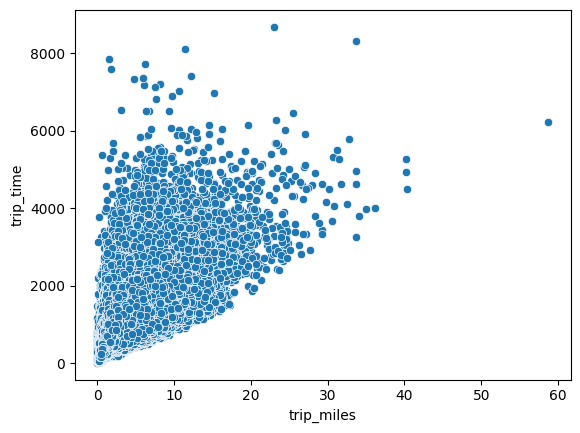

In [52]:
sns.scatterplot(data=ddf_temp_3, x = 'trip_miles', y = 'trip_time')

In [53]:
ddf_temp_4 = ddf_temp_3[((ddf_temp_3['trip_time'] < 8000) | (ddf_temp_3['trip_miles'] < 50))  & (ddf_temp_3['trip_miles'] < 50) ]

<Axes: xlabel='trip_miles', ylabel='trip_time'>

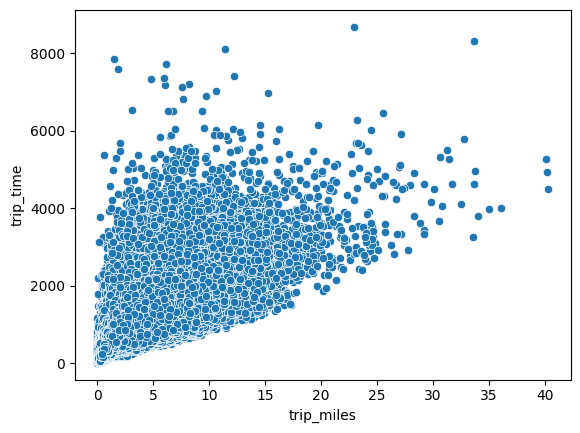

In [54]:
sns.scatterplot(data=ddf_temp_4, x = 'trip_miles', y = 'trip_time')

In [55]:
ddf_temp_3 = ddf_temp_3[ddf_temp_3['trip_miles'] < 38]

In [56]:
ddf_temp_3 = ddf_temp_3[ddf_temp_3['trip_time'] < 8000]

<Axes: xlabel='trip_miles', ylabel='trip_time'>

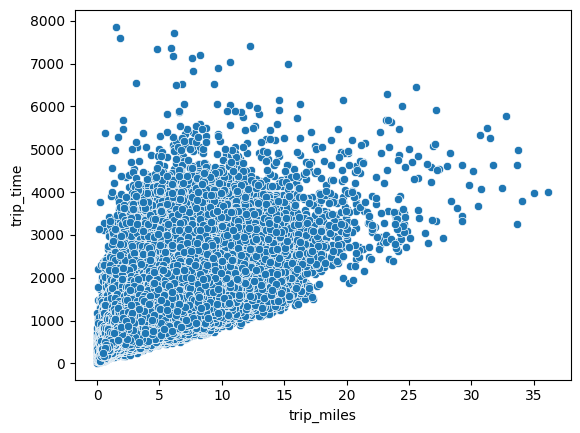

In [57]:
sns.scatterplot(data=ddf_temp_3, x = 'trip_miles', y = 'trip_time')

In [58]:
ddf_temp_3[['bcf', 'base_passenger_fare']]

bcf  base_passenger_fare
0         0.46                18.21
26        1.21                44.03
27        0.66                24.14
28        0.45                16.50
29        0.36                13.30
...        ...                  ...
20405645  0.57                21.24
20405658  0.70                27.11
20405659  0.53                20.89
20405660  0.77                31.78
20405661  0.73                27.81

[3695591 rows x 2 columns]

In [59]:
ddf_temp_3['bcf_percentage'] = ddf_temp_3['bcf'] / ddf_temp_3['base_passenger_fare']

In [60]:
ddf_temp_3[['bcf', 'base_passenger_fare' , 'bcf_percentage']]

bcf  base_passenger_fare  bcf_percentage
0         0.46                18.21        0.025261
26        1.21                44.03        0.027481
27        0.66                24.14        0.027341
28        0.45                16.50        0.027273
29        0.36                13.30        0.027068
...        ...                  ...             ...
20405645  0.57                21.24        0.026836
20405658  0.70                27.11        0.025821
20405659  0.53                20.89        0.025371
20405660  0.77                31.78        0.024229
20405661  0.73                27.81        0.026250

[3695591 rows x 3 columns]

In [61]:
ddf_temp_3[ddf_temp_3['bcf_percentage'] < .005]

hvfhs_license_num dispatching_base_num originating_base_num  \
28618               HV0003               B03404               B03404   
40898               HV0003               B03404               B03404   
63622               HV0003               B03404               B03404   
90935               HV0003               B03404               B03404   
133073              HV0003               B03404               B03404   
...                    ...                  ...                  ...   
20402176            HV0003               B03404               B03404   
20402763            HV0003               B03404               B03404   
20403367            HV0003               B03404               B03404   
20405058            HV0003               B03404               B03404   
20405355            HV0003               B03404               B03404   

            request_datetime   on_scene_datetime     pickup_datetime  \
28618    2025-01-01 00:44:03 2025-01-01 00:48:25 2025-01-01 00:49:06   
40898    2025-01-01 00:13:58 2025-01-01 00:15:29 2025-01-01 00:16:41   
63622    2025-01-01 01:12:30 2025-01-01 01:19:35 2025-01-01 01:21:24   
90935    2025-01-01 01:06:38 2025-01-01 01:15:03 2025-01-01 01:17:05   
133073   2025-01-01 02:22:53 2025-01-01 02:25:48 2025-01-01 02:27:50   
...                      ...                 ...                 ...   
20402176 2025-01-31 23:20:24 2025-01-31 23:28:16 2025-01-31 23:28:16   
20402763 2025-01-31 23:02:49 2025-01-31 23:06:06 2025-01-31 23:06:48   
20403367 2025-01-31 23:08:10 2025-01-31 23:11:39 2025-01-31 23:13:39   
20405058 2025-01-31 23:21:54 2025-01-31 23:30:53 2025-01-31 23:31:39   
20405355 2025-01-31 23:04:32 2025-01-31 23:08:12 2025-01-31 23:09:38   

            dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  \
28618    2025-01-01 00:53:57           249            90        0.62  ...   
40898    2025-01-01 00:23:31           231           249        1.32  ...   
63622    2025-01-01 01:33:43            79           137        1.52  ...   
90935    2025-01-01 01:37:06           116           127        4.21  ...   
133073   2025-01-01 02:41:02           232           114        1.96  ...   
...                      ...           ...           ...         ...  ...   
20402176 2025-01-31 23:34:38           234           186        0.95  ...   
20402763 2025-01-31 23:16:19           164           233        1.08  ...   
20403367 2025-01-31 23:21:30            90           158        1.17  ...   
20405058 2025-01-31 23:44:27           249           234        1.79  ...   
20405355 2025-01-31 23:21:33            79           249        1.64  ...   

           bcf  sales_tax  congestion_surcharge  airport_fee  tips  \
28618     0.00       0.00                  2.75          0.0   0.0   
40898     0.00       0.00                  2.75          0.0   0.0   
63622     0.00       0.00                  2.75          0.0   0.0   
90935     0.02       0.05                  0.00          0.0   0.0   
133073    0.07       0.22                  2.75          0.0   0.0   
...        ...        ...                   ...          ...   ...   
20402176  0.03       0.10                  2.75          0.0   0.0   
20402763  0.02       0.07                  2.75          0.0   0.0   
20403367  0.02       0.07                  2.75          0.0   0.0   
20405058  0.05       0.19                  2.75          0.0   0.0   
20405355  0.00       0.00                  2.75          0.0   0.0   

          driver_pay  access_a_ride_flag  wav_request_flag  wav_match_flag  \
28618          29.60                   N                 N               N   
40898          11.83                   N                 N               N   
63622          37.94                   N                 N               N   
90935          30.99                   N                 N               N   
133073         42.95                   N                 N               Y   
...              ...                 ...     

In [62]:
#NOTE:The BCF's surcharge rate decreased from 2.75% to 2.5% effective February 1, 2025.

In [63]:
ddf_temp_3['sales_tax_percentage'] = ddf_temp_3['sales_tax'] / ddf_temp_3['base_passenger_fare']

In [64]:
ddf_temp_3[['sales_tax', 'base_passenger_fare' , 'sales_tax_percentage']]

sales_tax  base_passenger_fare  sales_tax_percentage
0              1.50                18.21              0.082372
26             3.90                44.03              0.088576
27             2.15                24.14              0.089064
28             1.46                16.50              0.088485
29             1.18                13.30              0.088722
...             ...                  ...                   ...
20405645       2.00                21.24              0.094162
20405658       2.40                27.11              0.088528
20405659       1.85                20.89              0.088559
20405660       2.61                31.78              0.082127
20405661       2.49                27.81              0.089536

[3695591 rows x 3 columns]

In [65]:
ddf_temp_3[ddf_temp_3['sales_tax_percentage'] > .2]

hvfhs_license_num dispatching_base_num originating_base_num  \
172752              HV0003               B03404               B03404   
515227              HV0003               B03404               B03404   
805895              HV0003               B03404               B03404   
845826              HV0003               B03404               B03404   
883058              HV0003               B03404               B03404   
...                    ...                  ...                  ...   
19935671            HV0003               B03404               B03404   
19971424            HV0003               B03404               B03404   
20176264            HV0003               B03404               B03404   
20361352            HV0003               B03404               B03404   
20405061            HV0003               B03404               B03404   

            request_datetime   on_scene_datetime     pickup_datetime  \
172752   2025-01-01 02:48:33 2025-01-01 02:52:16 2025-01-01 02:57:17   
515227   2025-01-01 17:45:42 2025-01-01 17:49:00 2025-01-01 17:49:58   
805895   2025-01-02 08:59:15 2025-01-02 09:04:30 2025-01-02 09:04:47   
845826   2025-01-02 11:15:22 2025-01-02 11:15:38 2025-01-02 11:17:39   
883058   2025-01-02 12:33:16 2025-01-02 12:36:07 2025-01-02 12:42:39   
...                      ...                 ...                 ...   
19935671 2025-01-31 12:18:45 2025-01-31 12:20:59 2025-01-31 12:27:30   
19971424 2025-01-31 13:30:07 2025-01-31 13:34:25 2025-01-31 13:37:25   
20176264 2025-01-31 18:50:00 2025-01-31 18:34:03 2025-01-31 18:40:35   
20361352 2025-01-31 22:00:49 2025-01-31 22:02:21 2025-01-31 22:04:22   
20405061 2025-01-31 23:25:48 2025-01-31 23:30:48 2025-01-31 23:31:39   

            dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  \
172752   2025-01-01 03:07:53           211            79        0.83  ...   
515227   2025-01-01 18:13:28           163           244       11.38  ...   
805895   2025-01-02 09:28:04           141            42        5.00  ...   
845826   2025-01-02 11:47:57           100            41        7.15  ...   
883058   2025-01-02 12:56:07           236            75        1.77  ...   
...                      ...           ...           ...         ...  ...   
19935671 2025-01-31 12:36:55           140           237        0.88  ...   
19971424 2025-01-31 13:54:49            74            42        3.28  ...   
20176264 2025-01-31 19:07:44           170            41        5.09  ...   
20361352 2025-01-31 22:37:49            79           246        8.78  ...   
20405061 2025-01-31 23:53:34           194           107        7.04  ...   

          sales_tax  congestion_surcharge  airport_fee  tips  driver_pay  \
172752         3.00                  2.75          0.0  8.09       25.50   
515227         3.07                  2.75          0.0  0.00       31.44   
805895         5.90                  2.75          0.0  0.00       24.17   
845826         2.80                  2.75          0.0  0.00       27.38   
883058         4.77                  2.75          0.0  0.00       12.75   
...             ...                   ...          ...   ...         ...   
19935671       4.52                  2.75          0.0  0.00        8.45   
19971424       5.19                  0.00          0.0  0.00       16.28   
20176264       5.88                  2.75          0.0  0.00       26.25   
20361352       3.59                  2.75          0.0  0.00       31.45   
20405061       2.36                  2.75          0.0  0.00       42.35   

          access_a_ride_flag  wav_request_flag  wav_match_flag  \
172752                     N                 N               N   
515227                     N                 N               N   
805895                     N                 Y               Y   
845826                     N                 N               N   
883058                     N                 Y               Y   
...                      ...               ..

# Prepare 2025 Data

Upload a years worth of data of TLC paraquet files between Febuarary 2024 and January 2025

In [66]:
paths=['/content/drive/MyDrive/PHASE_5_PROJECT/Feb_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Mar_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Apr_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/May_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Jun_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Jul_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Aug_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Sep_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Oct_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Nov_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Dec_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/U2025.parquet']
ddf_24 = dd.read_parquet(paths)

In [67]:
zone_lookup = pd.read_csv('/content/drive/MyDrive/PHASE_5_PROJECT/taxi_zone_lookup.csv')
zone_lookup

LocationID        Borough                     Zone service_zone
0             1            EWR           Newark Airport          EWR
1             2         Queens              Jamaica Bay    Boro Zone
2             3          Bronx  Allerton/Pelham Gardens    Boro Zone
3             4      Manhattan            Alphabet City  Yellow Zone
4             5  Staten Island            Arden Heights    Boro Zone
..          ...            ...                      ...          ...
260         261      Manhattan       World Trade Center  Yellow Zone
261         262      Manhattan           Yorkville East  Yellow Zone
262         263      Manhattan           Yorkville West  Yellow Zone
263         264        Unknown                      NaN          NaN
264         265            NaN           Outside of NYC          NaN

[265 rows x 4 columns]

In [68]:
ddf_24['PULocationID'] = ddf_24['PULocationID'].astype('int64')
ddf_24['DOLocationID'] = ddf_24['DOLocationID'].astype('int64')
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype('int64')
pickup = zone_lookup[['Borough', 'LocationID', 'Zone']].copy()
pickup.columns= ['pickup_borough','PULocationID','pickup_zone']
dropoff = zone_lookup[['Borough', 'LocationID', 'Zone']].copy()
dropoff.columns =['dropoff_borough', 'DOLocationID','dropoff_zone']
merged_ddf = ddf_24.merge(
            pickup,
            on = 'PULocationID',
            how = 'left'
)

merged_ddf = merged_ddf.merge(
            dropoff,
            on = 'DOLocationID',
            how = 'left'
)


In [69]:
print(merged_ddf.columns)

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'pickup_borough', 'pickup_zone',
       'dropoff_borough', 'dropoff_zone'],
      dtype='object')


Replicate EDA completed above

In [70]:
ddf_manhattan = merged_ddf[(merged_ddf['pickup_borough'] == 'Manhattan') & (merged_ddf['dropoff_borough'] == 'Manhattan')]

In [71]:
ddf_manhattan_2 = ddf_manhattan.drop(columns=['pickup_borough', 'dropoff_borough'], axis=1)

In [72]:
ddf_manhattan_3 = ddf_manhattan_2[ddf_manhattan_2['base_passenger_fare'] != 0]

In [73]:
ddf_manhattan_4 = ddf_manhattan_3[(ddf_manhattan_3['base_passenger_fare'] >= 4)]

In [74]:
ddf_2024 = ddf_manhattan_4.loc[ddf_manhattan_4['hvfhs_license_num']=='HV0003']

In [75]:
ddf_temp = ddf_2024.loc[ddf_2024['shared_match_flag'] == 'N']

In [76]:
ddf_temp_2= ddf_temp.loc[ddf_temp['shared_request_flag'] == 'N']

In [77]:
ddf_temp_3 = ddf_temp_2.loc[(ddf_temp_2['PULocationID'] < 265) & (ddf_temp_2['DOLocationID'] < 265)]

In [78]:
ddf_temp_4 = ddf_temp_3.loc[ddf_temp_3['trip_miles'] < 38]

In [79]:
ddf_temp_5 = ddf_temp_4.loc[ddf_temp_3['trip_time'] < 3000]

In [80]:
ddf_temp_6 = ddf_temp_5[ddf_temp_5['base_passenger_fare']<140]

In [81]:
ddf_temp_7 = ddf_temp_6[~((ddf_temp_6['trip_time']>2400)& (ddf_temp_6['PULocationID'] == ddf_temp_6['DOLocationID']))]

In [82]:
excluded_zones = [103, 104, 105, 194, 202]

ddf_temp_7 = ddf_temp_6[(~ddf_temp_6['PULocationID'].isin(excluded_zones)) &
    (~ddf_temp_6['DOLocationID'].isin(excluded_zones))]

Roughly 180 million rows, need to sample

In [83]:
ddf_sam = ddf_temp_7.sample(frac=.03, random_state=42)

In [84]:
df_2024 = ddf_sam.compute()


In [85]:
df_2024.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'pickup_zone', 'dropoff_zone'],
      dtype='object')

In [86]:
df_24_Cl = df_2024.drop(columns=['hvfhs_license_num','dispatching_base_num','originating_base_num','shared_request_flag','shared_match_flag','access_a_ride_flag','wav_request_flag','wav_match_flag','tips','driver_pay'], axis =1)

In [87]:
df_24_Cl

request_datetime   on_scene_datetime     pickup_datetime  \
394658  2024-04-02 18:33:05 2024-04-02 18:42:31 2024-04-02 18:42:51   
2327577 2024-04-09 23:35:19 2024-04-09 23:45:51 2024-04-09 23:46:48   
639206  2024-04-03 15:47:44 2024-04-03 15:51:13 2024-04-03 15:51:25   
2000864 2024-04-08 14:52:08 2024-04-08 14:54:54 2024-04-08 14:56:21   
629998  2024-04-03 14:55:45 2024-04-03 15:00:14 2024-04-03 15:00:49   
...                     ...                 ...                 ...   
1134248 2025-01-31 02:03:01 2025-01-31 02:06:23 2025-01-31 02:06:31   
1099635 2025-01-30 22:22:07 2025-01-30 22:26:12 2025-01-30 22:26:21   
343187  2025-01-27 22:00:10 2025-01-27 22:01:10 2025-01-27 22:01:37   
1123598 2025-01-31 00:29:54 2025-01-31 00:31:10 2025-01-31 00:33:11   
1031030 2025-01-30 19:42:49 2025-01-30 19:46:11 2025-01-30 19:47:16   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  \
394658  2024-04-02 18:55:04           246           234        1.49   
2327577 2024-04-09 23:53:13           164           100        0.85   
639206  2024-04-03 16:05:00           161           237        1.18   
2000864 2024-04-08 15:01:24           170           137        0.50   
629998  2024-04-03 15:16:28           231           211        1.85   
...                     ...           ...           ...         ...   
1134248 2025-01-31 02:13:26           186           125        2.23   
1099635 2025-01-30 22:45:22           234           236        3.80   
343187  2025-01-27 22:10:42            88             4        3.66   
1123598 2025-01-31 00:41:09           161           137        1.15   
1031030 2025-01-30 20:10:46           246           243        8.89   

         trip_time  base_passenger_fare  tolls   bcf  sales_tax  \
394658         733                10.22    0.0  0.30       0.96   
2327577        385                14.52    0.0  0.40       1.29   
639206         815                15.36    0.0  0.45       1.44   
2000864        303                 8.25    0.0  0.23       0.73   
629998         939                26.53    0.0  0.73       2.35   
...            ...                  ...    ...   ...        ...   
1134248        415                15.39    0.0  0.38       1.36   
1099635       1141                48.41    0.0  1.22       4.03   
343187         545                12.15    0.0  0.31       1.08   
1123598        478                10.96    0.0  0.27       1.03   
1031030       1410                30.82    0.0  0.80       2.73   

         congestion_surcharge  airport_fee                   pickup_zone  \
394658                   2.75          0.0     West Chelsea/Hudson Yards   
2327577                  2.75          0.0                 Midtown South   
639206                   2.75          0.0                Midtown Center   
2000864                  2.75          0.0                   Murray Hill   
629998                   2.75          0.0          TriBeCa/Civic Center   
...                       ...          ...                           ...   
1134248                  2.75          0.0  Penn Station/Madison Sq West   
1099635                  2.75          0.0                      Union Sq   
343187                   2.75          0.0      Financial District South   
1123598                  2.75          0.0                Midtown Center   
1031030                  2.75          0.0     West Chelsea/Hudson Yards   

                     dropoff_zone  
394658                   Union Sq  
2327577          Garment District  
639206      Upper East Side South  
2000864                  Kips Bay  
629998                       SoHo  
...                           ...  
1134248                 Hudson Sq  
1099635     Upper East Side North  
343187              Alphabet City  
1123598                  Kips Bay  
1031030  Washington Heights North  

[1377401 rows x 16 columns]

In [88]:
mean_time = df_24_Cl['trip_time'].mean()
std_time = df_24_Cl['trip_time'].std()
cutoff = mean_time + 3 * std_time
print(cutoff)

2416.6703401687087


In [89]:
df_24_Cl['trip_time'].sort_values()

3006476       0
3290186       1
2257466       1
355510        3
145551        3
           ... 
2477634    2999
2559297    2999
2098217    2999
922226     2999
2955560    2999
Name: trip_time, Length: 1377401, dtype: int64

In [90]:
df_24_Cl['sales_tax'].isna().sum()

np.int64(0)

In [91]:
#df_24_Cl['total_fare'] = (df_24_Cl['base_passenger_fare']) + (df_24_Cl['tolls']) + (df_24_Cl['bcf']) + (df_24_Cl['sales_tax']) + (df_24_Cl['congestion_surcharge'])+ (df_24_Cl['airport_fee'])

# 2009 Data EDA

In [92]:
early_uber = pd.read_csv('/content/drive/MyDrive/PHASE_5_PROJECT/Uber_Fares_Dataset_Main.csv')
early_uber

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2       2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3       2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4       2014-08-28 17:47:00 UTC        -73.925023        40.744085   
...                         ...               ...              ...   
199995  2012-10-28 10:49:00 UTC        -73.987042        40.739367   
199996  2014-03-14 01:09:00 UTC        -73.984722        40.736837   
199997  2009-06-29 00:42:00 UTC        -73.986017        40.756487   
199998  2015-05-20 14:56:25 UTC        -73.997124        40.725452   
199999  2010-05-15 04:08:00 UTC        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  
0              -73.999512         40.723217                1  
1              -73.994710         40.750325                1  
2              -73.962565         40.772647                1  
3              -73.965316         40.803349                3  
4              -73.973082         40.761247                5  
...                   ...               ...              ...  
199995         -73.986525         40.740297                1  
199996         -74.006672         40.739620                1  
199997         -73.858957         40.692588                2  
199998         -73.983215         40.695415                1  
199999         -73.985508         40.768793                1  

[200000 rows x 9 columns]

In [93]:
#Data from all of NYC, Limit to Manhattan

In [94]:
def is_in_manhattan(lat, lon):
    return 40.70 <= lat <= 40.88 and -74.02 <= lon <= -73.92
selection = (
    early_uber['pickup_latitude'].between(40.70, 40.88) &
    early_uber['pickup_longitude'].between(-74.02, -73.92) &
    early_uber['dropoff_latitude'].between(40.70, 40.88) &
    early_uber['dropoff_longitude'].between(-74.02, -73.92)
)

early_uber = early_uber[selection]

In [95]:
early_uber

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199993    28359558    2012-09-29 19:51:27.0000006          9.5   
199994     3189201  2014-01-31 14:42:00.000000181         12.0   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2       2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3       2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4       2014-08-28 17:47:00 UTC        -73.925023        40.744085   
...                         ...               ...              ...   
199993  2012-09-29 19:51:27 UTC        -73.987798        40.721210   
199994  2014-01-31 14:42:00 UTC        -73.983070        40.760770   
199995  2012-10-28 10:49:00 UTC        -73.987042        40.739367   
199996  2014-03-14 01:09:00 UTC        -73.984722        40.736837   
199999  2010-05-15 04:08:00 UTC        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  
0              -73.999512         40.723217                1  
1              -73.994710         40.750325                1  
2              -73.962565         40.772647                1  
3              -73.965316         40.803349                3  
4              -73.973082         40.761247                5  
...                   ...               ...              ...  
199993         -73.980960         40.744388                1  
199994         -73.972972         40.754177                1  
199995         -73.986525         40.740297                1  
199996         -74.006672         40.739620                1  
199999         -73.985508         40.768793                1  

[172934 rows x 9 columns]

In [96]:
early_uber['pickup_datetime'] = early_uber['pickup_datetime'].str.replace(" UTC", "")

<ipython-input-96-244ed4b2da3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_uber['pickup_datetime'] = early_uber['pickup_datetime'].str.replace(" UTC", "")


In [97]:
early_uber['dropoff_datetime'] = early_uber['pickup_datetime'].str.replace(" UTC", "")

<ipython-input-97-087247c76da3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_uber['dropoff_datetime'] = early_uber['pickup_datetime'].str.replace(" UTC", "")


In [98]:
early_uber['pickup_datetime'] = pd.to_datetime(early_uber['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

<ipython-input-98-f624cfa85048>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_uber['pickup_datetime'] = pd.to_datetime(early_uber['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')


In [99]:
early_uber['dropoff_datetime'] = pd.to_datetime(early_uber['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

<ipython-input-99-3d03f98e66f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_uber['dropoff_datetime'] = pd.to_datetime(early_uber['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')


In [100]:
early_uber.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dropoff_datetime     0
dtype: int64

In [101]:
early_uber_2 =early_uber[~((early_uber['pickup_longitude'] == early_uber['dropoff_longitude']) |
            (early_uber['pickup_latitude'] == early_uber['dropoff_latitude']))]

In [102]:
early_uber_2

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199993    28359558    2012-09-29 19:51:27.0000006          9.5   
199994     3189201  2014-01-31 14:42:00.000000181         12.0   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06        -73.999817        40.738354   
1      2009-07-17 20:04:56        -73.994355        40.728225   
2      2009-08-24 21:45:00        -74.005043        40.740770   
3      2009-06-26 08:22:21        -73.976124        40.790844   
4      2014-08-28 17:47:00        -73.925023        40.744085   
...                    ...               ...              ...   
199993 2012-09-29 19:51:27        -73.987798        40.721210   
199994 2014-01-31 14:42:00        -73.983070        40.760770   
199995 2012-10-28 10:49:00        -73.987042        40.739367   
199996 2014-03-14 01:09:00        -73.984722        40.736837   
199999 2010-05-15 04:08:00        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  \
0              -73.999512         40.723217                1   
1              -73.994710         40.750325                1   
2              -73.962565         40.772647                1   
3              -73.965316         40.803349                3   
4              -73.973082         40.761247                5   
...                   ...               ...              ...   
199993         -73.980960         40.744388                1   
199994         -73.972972         40.754177                1   
199995         -73.986525         40.740297                1   
199996         -74.006672         40.739620                1   
199999         -73.985508         40.768793                1   

          dropoff_datetime  
0      2015-05-07 19:52:06  
1      2009-07-17 20:04:56  
2      2009-08-24 21:45:00  
3      2009-06-26 08:22:21  
4      2014-08-28 17:47:00  
...                    ...  
199993 2012-09-29 19:51:27  
199994 2014-01-31 14:42:00  
199995 2012-10-28 10:49:00  
199996 2014-03-14 01:09:00  
199999 2010-05-15 04:08:00  

[171300 rows x 10 columns]

In [103]:
geo_uber_df = early_uber_2[(early_uber_2['pickup_latitude'] != 0 )]

In [104]:
geo_uber_df_2 = early_uber[(early_uber['dropoff_latitude'] != 0 )]

In [105]:
geo_uber_df_3 = geo_uber_df_2[(geo_uber_df_2['pickup_latitude'] > 0)]

In [106]:
geo_uber_df_3

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199993    28359558    2012-09-29 19:51:27.0000006          9.5   
199994     3189201  2014-01-31 14:42:00.000000181         12.0   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06        -73.999817        40.738354   
1      2009-07-17 20:04:56        -73.994355        40.728225   
2      2009-08-24 21:45:00        -74.005043        40.740770   
3      2009-06-26 08:22:21        -73.976124        40.790844   
4      2014-08-28 17:47:00        -73.925023        40.744085   
...                    ...               ...              ...   
199993 2012-09-29 19:51:27        -73.987798        40.721210   
199994 2014-01-31 14:42:00        -73.983070        40.760770   
199995 2012-10-28 10:49:00        -73.987042        40.739367   
199996 2014-03-14 01:09:00        -73.984722        40.736837   
199999 2010-05-15 04:08:00        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  \
0              -73.999512         40.723217                1   
1              -73.994710         40.750325                1   
2              -73.962565         40.772647                1   
3              -73.965316         40.803349                3   
4              -73.973082         40.761247                5   
...                   ...               ...              ...   
199993         -73.980960         40.744388                1   
199994         -73.972972         40.754177                1   
199995         -73.986525         40.740297                1   
199996         -74.006672         40.739620                1   
199999         -73.985508         40.768793                1   

          dropoff_datetime  
0      2015-05-07 19:52:06  
1      2009-07-17 20:04:56  
2      2009-08-24 21:45:00  
3      2009-06-26 08:22:21  
4      2014-08-28 17:47:00  
...                    ...  
199993 2012-09-29 19:51:27  
199994 2014-01-31 14:42:00  
199995 2012-10-28 10:49:00  
199996 2014-03-14 01:09:00  
199999 2010-05-15 04:08:00  

[172934 rows x 10 columns]

In [107]:
len(geo_uber_df_3[(geo_uber_df_3['dropoff_latitude'] < 40.787) & (geo_uber_df_3['pickup_latitude'] < 40.787)])

153891

In [108]:
len(geo_uber_df_3[(geo_uber_df_3['pickup_latitude'] > 40.787)])

9714

In [109]:
geo_uber_df_5 = geo_uber_df_3[(geo_uber_df_3['fare_amount'] >= 2.5 )]

In [110]:
#Creating adjusted fare amount for earlier data by inclduing inflation, bcf, sales_tax and congestion surcharge for all that start and end above 96th street [No tolls]

In [111]:
#Anual inflation rate of about 2.5% since 2009 (2.061)% per month), bcf = 2.75%, sales tax = 8.89%, congestion surcharge   = 2.75 (when used)

In [112]:
geo_uber_df_5

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199993    28359558    2012-09-29 19:51:27.0000006          9.5   
199994     3189201  2014-01-31 14:42:00.000000181         12.0   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06        -73.999817        40.738354   
1      2009-07-17 20:04:56        -73.994355        40.728225   
2      2009-08-24 21:45:00        -74.005043        40.740770   
3      2009-06-26 08:22:21        -73.976124        40.790844   
4      2014-08-28 17:47:00        -73.925023        40.744085   
...                    ...               ...              ...   
199993 2012-09-29 19:51:27        -73.987798        40.721210   
199994 2014-01-31 14:42:00        -73.983070        40.760770   
199995 2012-10-28 10:49:00        -73.987042        40.739367   
199996 2014-03-14 01:09:00        -73.984722        40.736837   
199999 2010-05-15 04:08:00        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  \
0              -73.999512         40.723217                1   
1              -73.994710         40.750325                1   
2              -73.962565         40.772647                1   
3              -73.965316         40.803349                3   
4              -73.973082         40.761247                5   
...                   ...               ...              ...   
199993         -73.980960         40.744388                1   
199994         -73.972972         40.754177                1   
199995         -73.986525         40.740297                1   
199996         -74.006672         40.739620                1   
199999         -73.985508         40.768793                1   

          dropoff_datetime  
0      2015-05-07 19:52:06  
1      2009-07-17 20:04:56  
2      2009-08-24 21:45:00  
3      2009-06-26 08:22:21  
4      2014-08-28 17:47:00  
...                    ...  
199993 2012-09-29 19:51:27  
199994 2014-01-31 14:42:00  
199995 2012-10-28 10:49:00  
199996 2014-03-14 01:09:00  
199999 2010-05-15 04:08:00  

[172914 rows x 10 columns]

In [113]:
geo_uber_df_5['num_months_since_2009'] = ((geo_uber_df_5['pickup_datetime'].dt.year - 2009) * 12) + geo_uber_df_5['pickup_datetime'].dt.month
inflation_multiple = 1.002061
#Number adjusted to match mean and dsitribution
growth_multiplier = 1.5
geo_uber_df_5['adjusted_base_fare'] = (geo_uber_df_5['fare_amount']  * (inflation_multiple ** geo_uber_df_5['num_months_since_2009']))
#geo_uber_df_3['adjusted_total_fare'] = (base_inflated * (1 + .0275 + .0889))

<ipython-input-113-f8a35367baaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_uber_df_5['num_months_since_2009'] = ((geo_uber_df_5['pickup_datetime'].dt.year - 2009) * 12) + geo_uber_df_5['pickup_datetime'].dt.month
<ipython-input-113-f8a35367baaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_uber_df_5['adjusted_base_fare'] = (geo_uber_df_5['fare_amount']  * (inflation_multiple ** geo_uber_df_5['num_months_since_2009']))


In [114]:
no_congestion_charge_df =geo_uber_df_5[(geo_uber_df_5['pickup_latitude']> 40.787)  & (geo_uber_df_5['dropoff_latitude']> 40.787)]

In [115]:
congestion_charge_df = geo_uber_df_5[(geo_uber_df_5['pickup_latitude']< 40.787)  | (geo_uber_df_5['dropoff_latitude']< 40.787)]

In [116]:
congestion_charge_df['adjusted_base_fare'] = congestion_charge_df['adjusted_base_fare'] + 2.75

<ipython-input-116-d6de260bdc0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congestion_charge_df['adjusted_base_fare'] = congestion_charge_df['adjusted_base_fare'] + 2.75


In [117]:
geo_uber_df_6 = pd.concat([congestion_charge_df, no_congestion_charge_df])

In [118]:
geo_test_df = df_24_Cl

In [119]:
from scipy.stats import rankdata
import numpy as np

source = geo_uber_df_6['fare_amount'].values
target = geo_test_df['base_passenger_fare'].values

source_percentiles = rankdata(source, method='average') / len(source)
mapped_fares = np.percentile(np.sort(target), source_percentiles * 100)

jitter = np.random.normal(0, np.std(mapped_fares) * 0.03, size=mapped_fares.shape)
geo_uber_df_6['adjusted_base_fare'] = np.round(np.clip(mapped_fares + jitter, 0, 140), 2)


In [120]:
geo_uber_df_6

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
5         44470845    2011-02-12 02:27:09.0000006          4.9   
...            ...                            ...          ...   
199673    44943450   2009-12-15 07:53:00.00000063          4.5   
199701    44895432    2009-09-16 10:46:52.0000001          6.1   
199735    18714081    2015-01-22 16:52:06.0000001          4.0   
199761    10343914  2013-06-24 13:06:00.000000176          6.0   
199873    36575161   2012-03-04 20:28:00.00000096          3.7   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06        -73.999817        40.738354   
1      2009-07-17 20:04:56        -73.994355        40.728225   
2      2009-08-24 21:45:00        -74.005043        40.740770   
4      2014-08-28 17:47:00        -73.925023        40.744085   
5      2011-02-12 02:27:09        -73.969019        40.755910   
...                    ...               ...              ...   
199673 2009-12-15 07:53:00        -73.973547        40.792330   
199701 2009-09-16 10:46:52        -73.974610        40.790523   
199735 2015-01-22 16:52:06        -73.972771        40.796940   
199761 2013-06-24 13:06:00        -73.957107        40.802107   
199873 2012-03-04 20:28:00        -73.963047        40.794090   

        dropoff_longitude  dropoff_latitude  passenger_count  \
0              -73.999512         40.723217                1   
1              -73.994710         40.750325                1   
2              -73.962565         40.772647                1   
4              -73.973082         40.761247                5   
5              -73.969019         40.755910                1   
...                   ...               ...              ...   
199673         -73.968370         40.787413                1   
199701         -73.961033         40.806596                1   
199735         -73.966850         40.798862                1   
199761         -73.969918         40.793960                1   
199873         -73.967232         40.788057                1   

          dropoff_datetime  num_months_since_2009  adjusted_base_fare  
0      2015-05-07 19:52:06                     77               18.04  
1      2009-07-17 20:04:56                      7               18.23  
2      2009-08-24 21:45:00                      8               32.51  
4      2014-08-28 17:47:00                     68               40.70  
5      2011-02-12 02:27:09                     26               10.20  
...                    ...                    ...                 ...  
199673 2009-12-15 07:53:00                     12                9.73  
199701 2009-09-16 10:46:52                      9               13.78  
199735 2015-01-22 16:52:06                     73                8.42  
199761 2013-06-24 13:06:00                     54               13.22  
199873 2012-03-04 20:28:00                     39                8.16  

[172914 rows x 12 columns]

In [121]:
geo_uber_final = geo_uber_df_6

In [122]:
geo_uber_final.describe()

Unnamed: 0    fare_amount                pickup_datetime  \
count  1.729140e+05  172914.000000                         172914   
mean   2.769634e+07       9.089569  2012-03-16 19:40:09.329157632   
min    1.000000e+00       2.500000            2009-01-01 01:15:22   
25%    1.381456e+07       5.700000  2010-08-15 01:17:27.750000128   
50%    2.771889e+07       8.000000     2012-03-14 09:09:16.500000   
75%    4.151476e+07      11.000000  2013-10-15 14:33:06.750000128   
max    5.542357e+07     499.000000            2015-06-30 23:40:39   
std    1.600468e+07       5.054773                            NaN   

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count     172914.000000    172914.000000      172914.000000     172914.000000   
mean         -73.981436        40.753425         -73.980039         40.754482   
min          -74.019468        40.700032         -74.019923         40.700027   
25%          -73.992675        40.738494         -73.992032         40.738700   
50%          -73.982587        40.754093         -73.981558         40.754944   
75%          -73.970857        40.767338         -73.969104         40.768592   
max          -73.920013        40.873482         -73.920007         40.879629   
std            0.016584         0.021793           0.017881          0.023946   

       passenger_count               dropoff_datetime  num_months_since_2009  \
count    172914.000000                         172914          172914.000000   
mean          1.683536  2012-03-16 19:40:09.329157632              39.000046   
min           0.000000            2009-01-01 01:15:22               1.000000   
25%           1.000000  2010-08-15 01:17:27.750000128              20.000000   
50%           1.000000     2012-03-14 09:09:16.500000              39.000000   
75%           2.000000  2013-10-15 14:33:06.750000128              58.000000   
max         208.000000            2015-06-30 23:40:39              78.000000   
std           1.398318                            NaN              22.184584   

       adjusted_base_fare  
count       172914.000000  
mean            22.134674  
min              4.470000  
25%             12.900000  
50%             19.030000  
75%             27.910000  
max            139.540000  
std             12.751493

In [123]:
geo_test_df.describe()

request_datetime           on_scene_datetime  \
count                     1377401                     1377401   
mean   2024-07-30 09:36:36.846885  2024-07-30 09:39:41.911898   
min           2024-01-31 23:55:58         2024-01-31 23:58:31   
25%           2024-04-27 20:09:26         2024-04-27 20:12:14   
50%           2024-07-28 13:52:43         2024-07-28 13:56:39   
75%           2024-11-01 11:59:31         2024-11-01 12:00:44   
max           2025-01-31 23:54:38         2025-01-31 23:57:48   
std                           NaN                         NaN   

                  pickup_datetime            dropoff_datetime  PULocationID  \
count                     1377401                     1377401  1.377401e+06   
mean   2024-07-30 09:40:40.972024  2024-07-30 09:56:08.898123  1.575379e+02   
min           2024-02-01 00:00:02         2024-02-01 00:05:38  4.000000e+00   
25%           2024-04-27 20:13:03         2024-04-27 20:27:47  1.000000e+02   
50%           2024-07-28 13:57:50         2024-07-28 14:11:52  1.610000e+02   
75%           2024-11-01 12:02:17         2024-11-01 12:19:25  2.310000e+02   
max           2025-01-31 23:59:37         2025-02-01 00:32:52  2.630000e+02   
std                           NaN                         NaN  7.064682e+01   

       DOLocationID    trip_miles     trip_time  base_passenger_fare  \
count  1.377401e+06  1.377401e+06  1.377401e+06         1.377401e+06   
mean   1.582709e+02  2.551665e+00  9.279581e+02         2.214688e+01   
min    4.000000e+00  0.000000e+00  0.000000e+00         4.010000e+00   
25%    1.000000e+02  1.240000e+00  5.560000e+02         1.277000e+01   
50%    1.610000e+02  1.930000e+00  8.270000e+02         1.901000e+01   
75%    2.320000e+02  3.180000e+00  1.199000e+03         2.795000e+01   
max    2.630000e+02  2.797000e+01  2.999000e+03         1.399700e+02   
std    7.013158e+01  1.937714e+00  4.962374e+02         1.274271e+01   

              tolls           bcf     sales_tax  congestion_surcharge  \
count  1.377401e+06  1.377401e+06  1.377401e+06          1.377401e+06   
mean   2.410954e-03  6.113746e-01  1.980660e+00          2.498249e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00          0.000000e+00   
25%    0.000000e+00  3.500000e-01  1.140000e+00          2.750000e+00   
50%    0.000000e+00  5.200000e-01  1.690000e+00          2.750000e+00   
75%    0.000000e+00  7.700000e-01  2.490000e+00          2.750000e+00   
max    4.299000e+01  4.250000e+00  1.371000e+01          2.750000e+00   
std    1.923741e-01  3.559332e-01  1.149063e+00          7.930260e-01   

       airport_fee  
count    1377401.0  
mean           0.0  
min            0.0  
25%            0.0  
50%            0.0  
75%            0.0  
max            0.0  
std            0.0

(0.0, 140.0)

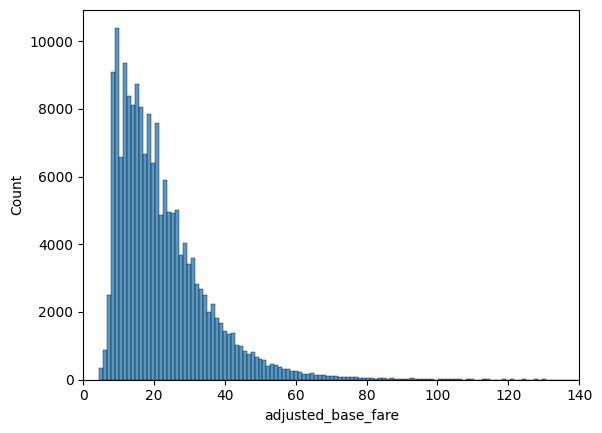

In [124]:
import importlib
import matplotlib.pyplot as plt
importlib.reload(plt)
sns.histplot(geo_uber_final['adjusted_base_fare'], bins=120)
plt.xlim(0,140)

(0.0, 140.0)

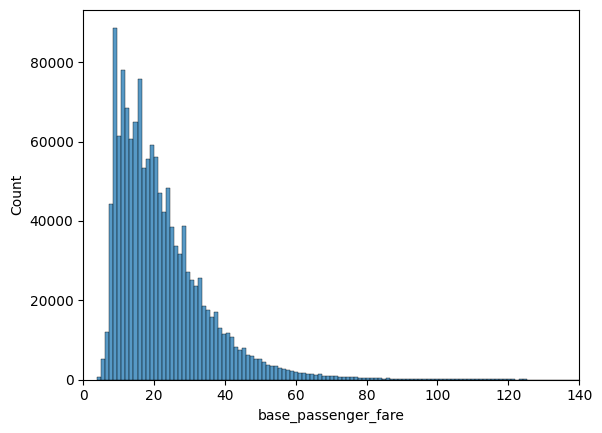

In [125]:
sns.histplot(geo_test_df['base_passenger_fare'], bins=120)
plt.xlim(0,140)

In [126]:
#Base in 2009 = 2.5

In [127]:
geo_uber_df_3[(geo_uber_df_3['pickup_datetime'] > '2009-01-01') & (geo_uber_df_3['pickup_datetime'] < '2015-01-01')]['fare_amount'].sort_values(ascending=True)[:25]

89322    -49.57
92063    -23.70
151681   -10.90
104080    -7.30
139272    -6.90
148803    -5.70
71246     -3.30
22182      0.00
191228     0.01
149342     0.11
75646      2.50
153210     2.50
167055     2.50
155014     2.50
24440      2.50
132440     2.50
88027      2.50
77750      2.50
9381       2.50
82807      2.50
187118     2.50
187116     2.50
139310     2.50
20714      2.50
145648     2.50
Name: fare_amount, dtype: float64

In [128]:
geo_test_df['congestion_surcharge'].value_counts()

congestion_surcharge
2.75    1251294
0.00     126064
0.75         43
Name: count, dtype: int64

In [129]:
geo_test_df[geo_test_df['congestion_surcharge'] == 2.75]

request_datetime   on_scene_datetime     pickup_datetime  \
394658  2024-04-02 18:33:05 2024-04-02 18:42:31 2024-04-02 18:42:51   
2327577 2024-04-09 23:35:19 2024-04-09 23:45:51 2024-04-09 23:46:48   
639206  2024-04-03 15:47:44 2024-04-03 15:51:13 2024-04-03 15:51:25   
2000864 2024-04-08 14:52:08 2024-04-08 14:54:54 2024-04-08 14:56:21   
629998  2024-04-03 14:55:45 2024-04-03 15:00:14 2024-04-03 15:00:49   
...                     ...                 ...                 ...   
1134248 2025-01-31 02:03:01 2025-01-31 02:06:23 2025-01-31 02:06:31   
1099635 2025-01-30 22:22:07 2025-01-30 22:26:12 2025-01-30 22:26:21   
343187  2025-01-27 22:00:10 2025-01-27 22:01:10 2025-01-27 22:01:37   
1123598 2025-01-31 00:29:54 2025-01-31 00:31:10 2025-01-31 00:33:11   
1031030 2025-01-30 19:42:49 2025-01-30 19:46:11 2025-01-30 19:47:16   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  \
394658  2024-04-02 18:55:04           246           234        1.49   
2327577 2024-04-09 23:53:13           164           100        0.85   
639206  2024-04-03 16:05:00           161           237        1.18   
2000864 2024-04-08 15:01:24           170           137        0.50   
629998  2024-04-03 15:16:28           231           211        1.85   
...                     ...           ...           ...         ...   
1134248 2025-01-31 02:13:26           186           125        2.23   
1099635 2025-01-30 22:45:22           234           236        3.80   
343187  2025-01-27 22:10:42            88             4        3.66   
1123598 2025-01-31 00:41:09           161           137        1.15   
1031030 2025-01-30 20:10:46           246           243        8.89   

         trip_time  base_passenger_fare  tolls   bcf  sales_tax  \
394658         733                10.22    0.0  0.30       0.96   
2327577        385                14.52    0.0  0.40       1.29   
639206         815                15.36    0.0  0.45       1.44   
2000864        303                 8.25    0.0  0.23       0.73   
629998         939                26.53    0.0  0.73       2.35   
...            ...                  ...    ...   ...        ...   
1134248        415                15.39    0.0  0.38       1.36   
1099635       1141                48.41    0.0  1.22       4.03   
343187         545                12.15    0.0  0.31       1.08   
1123598        478                10.96    0.0  0.27       1.03   
1031030       1410                30.82    0.0  0.80       2.73   

         congestion_surcharge  airport_fee                   pickup_zone  \
394658                   2.75          0.0     West Chelsea/Hudson Yards   
2327577                  2.75          0.0                 Midtown South   
639206                   2.75          0.0                Midtown Center   
2000864                  2.75          0.0                   Murray Hill   
629998                   2.75          0.0          TriBeCa/Civic Center   
...                       ...          ...                           ...   
1134248                  2.75          0.0  Penn Station/Madison Sq West   
1099635                  2.75          0.0                      Union Sq   
343187                   2.75          0.0      Financial District South   
1123598                  2.75          0.0                Midtown Center   
1031030                  2.75          0.0     West Chelsea/Hudson Yards   

                     dropoff_zone  
394658                   Union Sq  
2327577          Garment District  
639206      Upper East Side South  
2000864                  Kips Bay  
629998                       SoHo  
...                           ...  
1134248                 Hudson Sq  
1099635     Upper East Side North  
343187              Alphabet City  
1123598                  Kips Bay  
1031030  Washington Heights North  

[1251294 rows x 16 columns]

In [130]:
geo_test_df[geo_test_df['congestion_surcharge'] == 0]

request_datetime   on_scene_datetime     pickup_datetime  \
1797534 2024-04-07 14:01:06 2024-04-07 14:02:52 2024-04-07 14:03:47   
142365  2024-04-01 17:57:59 2024-04-01 18:01:19 2024-04-01 18:01:33   
823105  2024-04-04 07:42:05 2024-04-04 07:46:10 2024-04-04 07:47:59   
2747099 2024-04-11 18:39:41 2024-04-11 18:43:51 2024-04-11 18:43:51   
2245066 2024-04-09 17:19:33 2024-04-09 17:25:43 2024-04-09 17:26:31   
...                     ...                 ...                 ...   
256663  2025-01-27 15:24:59 2025-01-27 15:26:53 2025-01-27 15:27:15   
495276  2025-01-28 17:47:08 2025-01-28 17:49:52 2025-01-28 17:50:20   
110676  2025-01-26 20:19:52 2025-01-26 20:20:31 2025-01-26 20:20:40   
787575  2025-01-29 20:10:54 2025-01-29 20:13:30 2025-01-29 20:13:54   
425803  2025-01-28 11:40:50 2025-01-28 11:42:20 2025-01-28 11:43:03   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  \
1797534 2024-04-07 14:17:34           127           152        4.90   
142365  2024-04-01 18:05:04            74            75        0.87   
823105  2024-04-04 08:01:46            75           166        2.41   
2747099 2024-04-11 18:48:18            41           152        0.72   
2245066 2024-04-09 17:47:28           244           128        3.44   
...                     ...           ...           ...         ...   
256663  2025-01-27 15:45:10           244           166        2.91   
495276  2025-01-28 17:59:31           166            41        0.98   
110676  2025-01-26 20:25:34           244           244        1.90   
787575  2025-01-29 20:23:28           116           151        2.56   
425803  2025-01-28 12:00:56           127           244        2.17   

         trip_time  base_passenger_fare  tolls   bcf  sales_tax  \
1797534        827                17.59    0.0  0.48       1.56   
142365         211                 8.40    0.0  0.25       0.79   
823105         827                17.34    0.0  0.48       1.54   
2747099        267                 8.86    0.0  0.24       0.79   
2245066       1257                22.35    0.0  0.61       1.98   
...            ...                  ...    ...   ...        ...   
256663        1075                20.66    0.0  0.58       1.87   
495276         551                 8.55    0.0  0.23       0.75   
110676         294                 9.72    0.0  0.26       0.86   
787575         574                14.62    0.0  0.42       1.38   
425803        1073                15.10    0.0  0.41       1.34   

         congestion_surcharge  airport_fee               pickup_zone  \
1797534                   0.0          0.0                    Inwood   
142365                    0.0          0.0         East Harlem North   
823105                    0.0          0.0         East Harlem South   
2747099                   0.0          0.0            Central Harlem   
2245066                   0.0          0.0  Washington Heights South   
...                       ...          ...                       ...   
256663                    0.0          0.0  Washington Heights South   
495276                    0.0          0.0       Morningside Heights   
110676                    0.0          0.0  Washington Heights South   
787575                    0.0          0.0          Hamilton Heights   
425803                    0.0          0.0                    Inwood   

                     dropoff_zone  
1797534            Manhattanville  
142365          East Harlem South  
823105        Morningside Heights  
2747099            Manhattanville  
2245066          Inwood Hill Park  
...                           ...  
256663        Morningside Heights  
495276             Central Harlem  
110676   Washington Heights South  
787575           Manhattan Valley  
425803   Washington Heights South  

[126064 rows x 16 columns]

In [131]:
taxi_geo = pd.read_csv('/content/drive/MyDrive/PHASE_5_PROJECT/taxi_zones.csv')
taxi_geo

OBJECTID  Shape_Leng                                           the_geom  \
0           1    0.116357  MULTIPOLYGON (((-74.18445299999996 40.69499599...   
1           2    0.433470  MULTIPOLYGON (((-73.82337597260663 40.63898704...   
2           3    0.084341  MULTIPOLYGON (((-73.84792614099985 40.87134223...   
3           4    0.043567  MULTIPOLYGON (((-73.97177410965318 40.72582128...   
4           5    0.092146  MULTIPOLYGON (((-74.17421738099989 40.56256808...   
..        ...         ...                                                ...   
258       256    0.067915  MULTIPOLYGON (((-73.95834207500002 40.71330630...   
259       259    0.126750  MULTIPOLYGON (((-73.85107116191898 40.91037152...   
260       260    0.133514  MULTIPOLYGON (((-73.90175373399988 40.76077547...   
261       261    0.027120  MULTIPOLYGON (((-74.01332610899988 40.70503078...   
262       262    0.049064  MULTIPOLYGON (((-73.94383256699986 40.78285908...   

     Shape_Area                       zone  LocationID        borough  
0      0.000782             Newark Airport           1            EWR  
1      0.004866                Jamaica Bay           2         Queens  
2      0.000314    Allerton/Pelham Gardens           3          Bronx  
3      0.000112              Alphabet City           4      Manhattan  
4      0.000498              Arden Heights           5  Staten Island  
..          ...                        ...         ...            ...  
258    0.000169  Williamsburg (South Side)         256       Brooklyn  
259    0.000395         Woodlawn/Wakefield         259          Bronx  
260    0.000422                   Woodside         260         Queens  
261    0.000034         World Trade Center         261      Manhattan  
262    0.000122             Yorkville East         262      Manhattan  

[263 rows x 7 columns]

In [132]:
taxi_geo.drop(columns = ['OBJECTID', 'Shape_Leng', 'Shape_Area'], axis=1)

the_geom  \
0    MULTIPOLYGON (((-74.18445299999996 40.69499599...   
1    MULTIPOLYGON (((-73.82337597260663 40.63898704...   
2    MULTIPOLYGON (((-73.84792614099985 40.87134223...   
3    MULTIPOLYGON (((-73.97177410965318 40.72582128...   
4    MULTIPOLYGON (((-74.17421738099989 40.56256808...   
..                                                 ...   
258  MULTIPOLYGON (((-73.95834207500002 40.71330630...   
259  MULTIPOLYGON (((-73.85107116191898 40.91037152...   
260  MULTIPOLYGON (((-73.90175373399988 40.76077547...   
261  MULTIPOLYGON (((-74.01332610899988 40.70503078...   
262  MULTIPOLYGON (((-73.94383256699986 40.78285908...   

                          zone  LocationID        borough  
0               Newark Airport           1            EWR  
1                  Jamaica Bay           2         Queens  
2      Allerton/Pelham Gardens           3          Bronx  
3                Alphabet City           4      Manhattan  
4                Arden Heights           5  Staten Island  
..                         ...         ...            ...  
258  Williamsburg (South Side)         256       Brooklyn  
259         Woodlawn/Wakefield         259          Bronx  
260                   Woodside         260         Queens  
261         World Trade Center         261      Manhattan  
262             Yorkville East         262      Manhattan  

[263 rows x 4 columns]

In [133]:
pickup = taxi_geo[['the_geom', 'LocationID']].copy()
pickup.columns= ['PU_Geom','PULocationID',]
dropoff = taxi_geo[['the_geom', 'LocationID']].copy()
dropoff.columns =['DO_Geom', 'DOLocationID',]

In [134]:
geo_df = pd.merge(
            geo_test_df,
            pickup,
            left_on = 'PULocationID',
            right_on = 'PULocationID',
            how = 'left'
)

geo_df = pd.merge(
            geo_df,
            dropoff,
            left_on = 'DOLocationID',
            right_on = 'DOLocationID',
            how = 'left'
)

In [135]:
geo_df

request_datetime   on_scene_datetime     pickup_datetime  \
0       2024-04-02 18:33:05 2024-04-02 18:42:31 2024-04-02 18:42:51   
1       2024-04-09 23:35:19 2024-04-09 23:45:51 2024-04-09 23:46:48   
2       2024-04-03 15:47:44 2024-04-03 15:51:13 2024-04-03 15:51:25   
3       2024-04-08 14:52:08 2024-04-08 14:54:54 2024-04-08 14:56:21   
4       2024-04-03 14:55:45 2024-04-03 15:00:14 2024-04-03 15:00:49   
...                     ...                 ...                 ...   
1377396 2025-01-31 02:03:01 2025-01-31 02:06:23 2025-01-31 02:06:31   
1377397 2025-01-30 22:22:07 2025-01-30 22:26:12 2025-01-30 22:26:21   
1377398 2025-01-27 22:00:10 2025-01-27 22:01:10 2025-01-27 22:01:37   
1377399 2025-01-31 00:29:54 2025-01-31 00:31:10 2025-01-31 00:33:11   
1377400 2025-01-30 19:42:49 2025-01-30 19:46:11 2025-01-30 19:47:16   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  \
0       2024-04-02 18:55:04           246           234        1.49   
1       2024-04-09 23:53:13           164           100        0.85   
2       2024-04-03 16:05:00           161           237        1.18   
3       2024-04-08 15:01:24           170           137        0.50   
4       2024-04-03 15:16:28           231           211        1.85   
...                     ...           ...           ...         ...   
1377396 2025-01-31 02:13:26           186           125        2.23   
1377397 2025-01-30 22:45:22           234           236        3.80   
1377398 2025-01-27 22:10:42            88             4        3.66   
1377399 2025-01-31 00:41:09           161           137        1.15   
1377400 2025-01-30 20:10:46           246           243        8.89   

         trip_time  base_passenger_fare  tolls   bcf  sales_tax  \
0              733                10.22    0.0  0.30       0.96   
1              385                14.52    0.0  0.40       1.29   
2              815                15.36    0.0  0.45       1.44   
3              303                 8.25    0.0  0.23       0.73   
4              939                26.53    0.0  0.73       2.35   
...            ...                  ...    ...   ...        ...   
1377396        415                15.39    0.0  0.38       1.36   
1377397       1141                48.41    0.0  1.22       4.03   
1377398        545                12.15    0.0  0.31       1.08   
1377399        478                10.96    0.0  0.27       1.03   
1377400       1410                30.82    0.0  0.80       2.73   

         congestion_surcharge  airport_fee                   pickup_zone  \
0                        2.75          0.0     West Chelsea/Hudson Yards   
1                        2.75          0.0                 Midtown South   
2                        2.75          0.0                Midtown Center   
3                        2.75          0.0                   Murray Hill   
4                        2.75          0.0          TriBeCa/Civic Center   
...                       ...          ...                           ...   
1377396                  2.75          0.0  Penn Station/Madison Sq West   
1377397                  2.75          0.0                      Union Sq   
1377398                  2.75          0.0      Financial District South   
1377399                  2.75          0.0                Midtown Center   
1377400                  2.75          0.0     West Chelsea/Hudson Yards   

                     dropoff_zone  \
0                        Union Sq   
1                Garment District   
2           Upper East Side South   
3                        Kips Bay   
4                            SoHo   
...                           ...   
1377396                 Hudson Sq   
1377397     Upper East Side North   
1377398             Alphabet City   
1377399                  Kips Bay   
1377400  Washington Heights North   

                                                   PU_Geom  \
0        MULTIPOLYGON (((-74.00439976203513 40.76267135...   
1        MULTIPOLY

In [136]:
early_uber

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199993    28359558    2012-09-29 19:51:27.0000006          9.5   
199994     3189201  2014-01-31 14:42:00.000000181         12.0   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06        -73.999817        40.738354   
1      2009-07-17 20:04:56        -73.994355        40.728225   
2      2009-08-24 21:45:00        -74.005043        40.740770   
3      2009-06-26 08:22:21        -73.976124        40.790844   
4      2014-08-28 17:47:00        -73.925023        40.744085   
...                    ...               ...              ...   
199993 2012-09-29 19:51:27        -73.987798        40.721210   
199994 2014-01-31 14:42:00        -73.983070        40.760770   
199995 2012-10-28 10:49:00        -73.987042        40.739367   
199996 2014-03-14 01:09:00        -73.984722        40.736837   
199999 2010-05-15 04:08:00        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  \
0              -73.999512         40.723217                1   
1              -73.994710         40.750325                1   
2              -73.962565         40.772647                1   
3              -73.965316         40.803349                3   
4              -73.973082         40.761247                5   
...                   ...               ...              ...   
199993         -73.980960         40.744388                1   
199994         -73.972972         40.754177                1   
199995         -73.986525         40.740297                1   
199996         -74.006672         40.739620                1   
199999         -73.985508         40.768793                1   

          dropoff_datetime  
0      2015-05-07 19:52:06  
1      2009-07-17 20:04:56  
2      2009-08-24 21:45:00  
3      2009-06-26 08:22:21  
4      2014-08-28 17:47:00  
...                    ...  
199993 2012-09-29 19:51:27  
199994 2014-01-31 14:42:00  
199995 2012-10-28 10:49:00  
199996 2014-03-14 01:09:00  
199999 2010-05-15 04:08:00  

[172934 rows x 10 columns]

In [137]:
early_uber['pickup_datetime']

0        2015-05-07 19:52:06
1        2009-07-17 20:04:56
2        2009-08-24 21:45:00
3        2009-06-26 08:22:21
4        2014-08-28 17:47:00
                 ...        
199993   2012-09-29 19:51:27
199994   2014-01-31 14:42:00
199995   2012-10-28 10:49:00
199996   2014-03-14 01:09:00
199999   2010-05-15 04:08:00
Name: pickup_datetime, Length: 172934, dtype: datetime64[ns]

In [138]:
early_uber['pickup_datetime'] = pd.to_datetime(early_uber['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

<ipython-input-138-f624cfa85048>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_uber['pickup_datetime'] = pd.to_datetime(early_uber['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')


In [139]:
type(early_uber['pickup_datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [140]:
type(geo_df['PU_Geom'][0])

str

In [141]:
geo_df = geo_df[geo_df['PU_Geom'].apply(lambda x: isinstance(x, str))]
geo_df

request_datetime   on_scene_datetime     pickup_datetime  \
0       2024-04-02 18:33:05 2024-04-02 18:42:31 2024-04-02 18:42:51   
1       2024-04-09 23:35:19 2024-04-09 23:45:51 2024-04-09 23:46:48   
2       2024-04-03 15:47:44 2024-04-03 15:51:13 2024-04-03 15:51:25   
3       2024-04-08 14:52:08 2024-04-08 14:54:54 2024-04-08 14:56:21   
4       2024-04-03 14:55:45 2024-04-03 15:00:14 2024-04-03 15:00:49   
...                     ...                 ...                 ...   
1377396 2025-01-31 02:03:01 2025-01-31 02:06:23 2025-01-31 02:06:31   
1377397 2025-01-30 22:22:07 2025-01-30 22:26:12 2025-01-30 22:26:21   
1377398 2025-01-27 22:00:10 2025-01-27 22:01:10 2025-01-27 22:01:37   
1377399 2025-01-31 00:29:54 2025-01-31 00:31:10 2025-01-31 00:33:11   
1377400 2025-01-30 19:42:49 2025-01-30 19:46:11 2025-01-30 19:47:16   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  \
0       2024-04-02 18:55:04           246           234        1.49   
1       2024-04-09 23:53:13           164           100        0.85   
2       2024-04-03 16:05:00           161           237        1.18   
3       2024-04-08 15:01:24           170           137        0.50   
4       2024-04-03 15:16:28           231           211        1.85   
...                     ...           ...           ...         ...   
1377396 2025-01-31 02:13:26           186           125        2.23   
1377397 2025-01-30 22:45:22           234           236        3.80   
1377398 2025-01-27 22:10:42            88             4        3.66   
1377399 2025-01-31 00:41:09           161           137        1.15   
1377400 2025-01-30 20:10:46           246           243        8.89   

         trip_time  base_passenger_fare  tolls   bcf  sales_tax  \
0              733                10.22    0.0  0.30       0.96   
1              385                14.52    0.0  0.40       1.29   
2              815                15.36    0.0  0.45       1.44   
3              303                 8.25    0.0  0.23       0.73   
4              939                26.53    0.0  0.73       2.35   
...            ...                  ...    ...   ...        ...   
1377396        415                15.39    0.0  0.38       1.36   
1377397       1141                48.41    0.0  1.22       4.03   
1377398        545                12.15    0.0  0.31       1.08   
1377399        478                10.96    0.0  0.27       1.03   
1377400       1410                30.82    0.0  0.80       2.73   

         congestion_surcharge  airport_fee                   pickup_zone  \
0                        2.75          0.0     West Chelsea/Hudson Yards   
1                        2.75          0.0                 Midtown South   
2                        2.75          0.0                Midtown Center   
3                        2.75          0.0                   Murray Hill   
4                        2.75          0.0          TriBeCa/Civic Center   
...                       ...          ...                           ...   
1377396                  2.75          0.0  Penn Station/Madison Sq West   
1377397                  2.75          0.0                      Union Sq   
1377398                  2.75          0.0      Financial District South   
1377399                  2.75          0.0                Midtown Center   
1377400                  2.75          0.0     West Chelsea/Hudson Yards   

                     dropoff_zone  \
0                        Union Sq   
1                Garment District   
2           Upper East Side South   
3                        Kips Bay   
4                            SoHo   
...                           ...   
1377396                 Hudson Sq   
1377397     Upper East Side North   
1377398             Alphabet City   
1377399                  Kips Bay   
1377400  Washington Heights North   

                                                   PU_Geom  \
0        MULTIPOLYGON (((-74.00439976203513 40.76267135...   
1        MULTIPOLY

In [142]:
early_uber

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199993    28359558    2012-09-29 19:51:27.0000006          9.5   
199994     3189201  2014-01-31 14:42:00.000000181         12.0   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06        -73.999817        40.738354   
1      2009-07-17 20:04:56        -73.994355        40.728225   
2      2009-08-24 21:45:00        -74.005043        40.740770   
3      2009-06-26 08:22:21        -73.976124        40.790844   
4      2014-08-28 17:47:00        -73.925023        40.744085   
...                    ...               ...              ...   
199993 2012-09-29 19:51:27        -73.987798        40.721210   
199994 2014-01-31 14:42:00        -73.983070        40.760770   
199995 2012-10-28 10:49:00        -73.987042        40.739367   
199996 2014-03-14 01:09:00        -73.984722        40.736837   
199999 2010-05-15 04:08:00        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  \
0              -73.999512         40.723217                1   
1              -73.994710         40.750325                1   
2              -73.962565         40.772647                1   
3              -73.965316         40.803349                3   
4              -73.973082         40.761247                5   
...                   ...               ...              ...   
199993         -73.980960         40.744388                1   
199994         -73.972972         40.754177                1   
199995         -73.986525         40.740297                1   
199996         -74.006672         40.739620                1   
199999         -73.985508         40.768793                1   

          dropoff_datetime  
0      2015-05-07 19:52:06  
1      2009-07-17 20:04:56  
2      2009-08-24 21:45:00  
3      2009-06-26 08:22:21  
4      2014-08-28 17:47:00  
...                    ...  
199993 2012-09-29 19:51:27  
199994 2014-01-31 14:42:00  
199995 2012-10-28 10:49:00  
199996 2014-03-14 01:09:00  
199999 2010-05-15 04:08:00  

[172934 rows x 10 columns]

In [143]:
early_uber[(early_uber['pickup_datetime'] > '2014-01-01 14:00:00' ) & (early_uber['pickup_datetime'] < '2014-01-01 18:00:00')]

Unnamed: 0                            key  fare_amount  \
41575     33333263  2014-01-01 15:39:00.000000103         10.0   
45885      3136290  2014-01-01 17:17:00.000000176          9.5   
66628      9067259  2014-01-01 15:22:00.000000100          4.5   
66904     11661789   2014-01-01 14:31:00.00000040         19.5   
96706      4288285    2014-01-01 16:35:03.0000003         12.5   
112849    36282486    2014-01-01 15:37:54.0000003          6.0   
112894     2682206    2014-01-01 17:03:59.0000003         17.5   
132889    33880879   2014-01-01 17:31:00.00000016         15.5   
142833    14879236    2014-01-01 14:28:13.0000002         10.0   
146444    18340800   2014-01-01 15:06:00.00000080          9.0   
172590    31229218    2014-01-01 15:06:49.0000002         10.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
41575  2014-01-01 15:39:00        -73.969102        40.761650   
45885  2014-01-01 17:17:00        -73.985215        40.742127   
66628  2014-01-01 15:22:00        -73.982917        40.738102   
66904  2014-01-01 14:31:00        -73.960620        40.806667   
96706  2014-01-01 16:35:03        -73.977788        40.757772   
112849 2014-01-01 15:37:54        -73.997931        40.736265   
112894 2014-01-01 17:03:59        -73.970543        40.762333   
132889 2014-01-01 17:31:00        -74.015270        40.715862   
142833 2014-01-01 14:28:13        -73.988680        40.774305   
146444 2014-01-01 15:06:00        -74.004348        40.730965   
172590 2014-01-01 15:06:49        -73.980173        40.730342   

        dropoff_longitude  dropoff_latitude  passenger_count  \
41575          -74.002365         40.755857                1   
45885          -73.985415         40.721850                1   
66628          -73.979425         40.732717                6   
66904          -73.983792         40.743845                1   
96706          -73.989443         40.741751                4   
112849         -73.985425         40.730838                1   
112894         -73.997345         40.716130                1   
132889         -73.984902         40.719420                1   
142833         -73.980932         40.753361                2   
146444         -74.016727         40.705547                1   
172590         -73.966883         40.764026                1   

          dropoff_datetime  
41575  2014-01-01 15:39:00  
45885  2014-01-01 17:17:00  
66628  2014-01-01 15:22:00  
66904  2014-01-01 14:31:00  
96706  2014-01-01 16:35:03  
112849 2014-01-01 15:37:54  
112894 2014-01-01 17:03:59  
132889 2014-01-01 17:31:00  
142833 2014-01-01 14:28:13  
146444 2014-01-01 15:06:00  
172590 2014-01-01 15:06:49

In [144]:
geo_df[(geo_df['pickup_datetime'] > '2025-01-01 17:00:00') & (geo_df['pickup_datetime'] < '2025-01-01 18:00:00')]

request_datetime   on_scene_datetime     pickup_datetime  \
1262553 2025-01-01 17:30:00 2025-01-01 17:07:08 2025-01-01 17:10:13   
1262858 2025-01-01 17:28:07 2025-01-01 17:33:08 2025-01-01 17:34:20   
1263334 2025-01-01 17:47:14 2025-01-01 17:49:38 2025-01-01 17:51:39   
1263472 2025-01-01 17:06:30 2025-01-01 17:08:09 2025-01-01 17:10:10   
1263538 2025-01-01 17:07:26 2025-01-01 17:08:41 2025-01-01 17:08:51   
...                     ...                 ...                 ...   
1306143 2025-01-01 17:28:15 2025-01-01 17:32:52 2025-01-01 17:33:22   
1306477 2025-01-01 16:56:24 2025-01-01 16:58:38 2025-01-01 17:00:38   
1306552 2025-01-01 17:25:33 2025-01-01 17:26:30 2025-01-01 17:27:05   
1306726 2025-01-01 17:18:31 2025-01-01 17:20:50 2025-01-01 17:21:45   
1307654 2025-01-01 17:17:12 2025-01-01 17:21:33 2025-01-01 17:22:49   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  \
1262553 2025-01-01 17:19:33            90           107        1.04   
1262858 2025-01-01 17:46:53           249            87        2.18   
1263334 2025-01-01 18:00:21           107           233        1.09   
1263472 2025-01-01 17:28:48           229            48        1.89   
1263538 2025-01-01 17:18:32           158           234        1.37   
...                     ...           ...           ...         ...   
1306143 2025-01-01 17:50:24           246           239        4.13   
1306477 2025-01-01 17:10:44            50           186        1.47   
1306552 2025-01-01 17:48:42            43           161        1.51   
1306726 2025-01-01 17:38:49           113            13        2.92   
1307654 2025-01-01 17:39:30           243           166        4.60   

         trip_time  base_passenger_fare  tolls   bcf  sales_tax  \
1262553        560                54.81    0.0  1.51       4.87   
1262858        753                21.12    0.0  0.57       1.84   
1263334        522                10.22    0.0  0.28       0.91   
1263472       1118                24.58    0.0  0.67       2.17   
1263538        581                14.49    0.0  0.40       1.29   
...            ...                  ...    ...   ...        ...   
1306143       1022                26.12    0.0  0.72       2.32   
1306477        606                16.34    0.0  0.45       1.45   
1306552       1297                19.86    0.0  0.54       1.76   
1306726       1024                21.26    0.0  0.58       1.90   
1307654       1001                23.29    0.0  0.64       2.06   

         congestion_surcharge  airport_fee                    pickup_zone  \
1262553                  2.75          0.0                       Flatiron   
1262858                  2.75          0.0                   West Village   
1263334                  2.75          0.0                       Gramercy   
1263472                  2.75          0.0  Sutton Place/Turtle Bay North   
1263538                  2.75          0.0  Meatpacking/West Village West   
...                       ...          ...                            ...   
1306143                  2.75          0.0      West Chelsea/Hudson Yards   
1306477                  2.75          0.0                   Clinton West   
1306552                  2.75          0.0                   Central Park   
1306726                  2.75          0.0        Greenwich Village North   
1307654                  0.00          0.0       Washington Heights North   

                         dropoff_zone  \
1262553                      Gramercy   
1262858      Financial District North   
1263334           UN/Turtle Bay South   
1263472                  Clinton East   
1263538                      Union Sq   
...                               ...   
1306143         Upper West Side South   
1306477  Penn Station/Madison Sq West   
1306552                Midtown Center   
1306726             Battery Park City   
1307654           Morningside Heights   

                                                   PU_Geom  \
1262553  MULTIPOLYGO

In [145]:
Secondary_df = geo_uber_final.drop(columns=['dropoff_datetime',	'num_months_since_2009'])

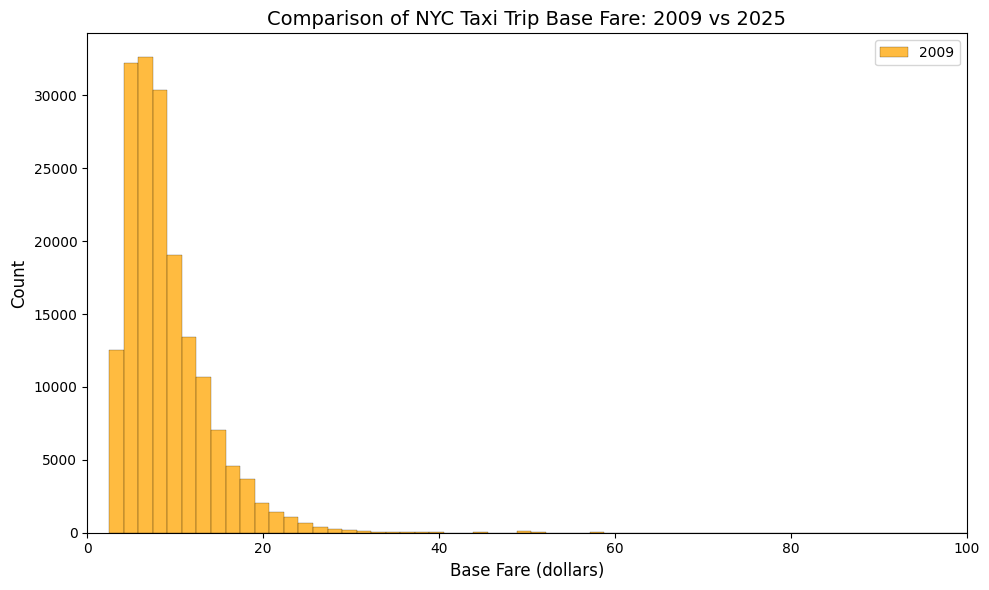

In [153]:
plt.figure(figsize=(10, 6))

# Plot the histograms with labels for the legend

sns.histplot(Secondary_df['fare_amount'], bins=300, color='orange', label='2009')

# Add title and improve axis labels
plt.title('Comparison of NYC Taxi Trip Base Fare: 2009 vs 2025', fontsize=14)
plt.xlabel('Base Fare (dollars)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend
plt.legend(fontsize=10)
plt.xlim(0,100)

# Improve tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optional: Improve layout
plt.tight_layout()

# Show plot
plt.show()

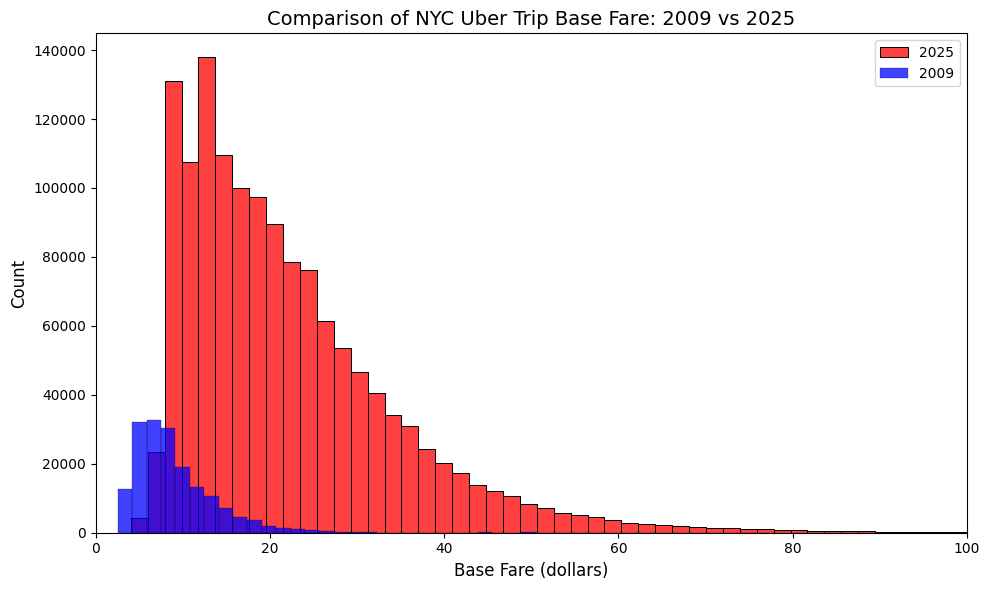

In [156]:
plt.figure(figsize=(10, 6))

# Plot the histograms with labels for the legend
sns.histplot(geo_test_df['base_passenger_fare'], bins=70, color='red', label='2025')
sns.histplot(Secondary_df['fare_amount'], bins=300, color='blue', label='2009')

# Add title and improve axis labels
plt.title('Comparison of NYC Uber Trip Base Fare: 2009 vs 2025', fontsize=14)
plt.xlabel('Base Fare (dollars)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend
plt.legend(fontsize=10)
plt.xlim(0,100)

# Improve tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optional: Improve layout
plt.tight_layout()

# Show plot
plt.show()

# Calculation Secondary Data Dropoff Time

In [157]:
geo_test_df.describe()

request_datetime           on_scene_datetime  \
count                     1377401                     1377401   
mean   2024-07-30 09:36:36.846885  2024-07-30 09:39:41.911898   
min           2024-01-31 23:55:58         2024-01-31 23:58:31   
25%           2024-04-27 20:09:26         2024-04-27 20:12:14   
50%           2024-07-28 13:52:43         2024-07-28 13:56:39   
75%           2024-11-01 11:59:31         2024-11-01 12:00:44   
max           2025-01-31 23:54:38         2025-01-31 23:57:48   
std                           NaN                         NaN   

                  pickup_datetime            dropoff_datetime  PULocationID  \
count                     1377401                     1377401  1.377401e+06   
mean   2024-07-30 09:40:40.972024  2024-07-30 09:56:08.898123  1.575379e+02   
min           2024-02-01 00:00:02         2024-02-01 00:05:38  4.000000e+00   
25%           2024-04-27 20:13:03         2024-04-27 20:27:47  1.000000e+02   
50%           2024-07-28 13:57:50         2024-07-28 14:11:52  1.610000e+02   
75%           2024-11-01 12:02:17         2024-11-01 12:19:25  2.310000e+02   
max           2025-01-31 23:59:37         2025-02-01 00:32:52  2.630000e+02   
std                           NaN                         NaN  7.064682e+01   

       DOLocationID    trip_miles     trip_time  base_passenger_fare  \
count  1.377401e+06  1.377401e+06  1.377401e+06         1.377401e+06   
mean   1.582709e+02  2.551665e+00  9.279581e+02         2.214688e+01   
min    4.000000e+00  0.000000e+00  0.000000e+00         4.010000e+00   
25%    1.000000e+02  1.240000e+00  5.560000e+02         1.277000e+01   
50%    1.610000e+02  1.930000e+00  8.270000e+02         1.901000e+01   
75%    2.320000e+02  3.180000e+00  1.199000e+03         2.795000e+01   
max    2.630000e+02  2.797000e+01  2.999000e+03         1.399700e+02   
std    7.013158e+01  1.937714e+00  4.962374e+02         1.274271e+01   

              tolls           bcf     sales_tax  congestion_surcharge  \
count  1.377401e+06  1.377401e+06  1.377401e+06          1.377401e+06   
mean   2.410954e-03  6.113746e-01  1.980660e+00          2.498249e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00          0.000000e+00   
25%    0.000000e+00  3.500000e-01  1.140000e+00          2.750000e+00   
50%    0.000000e+00  5.200000e-01  1.690000e+00          2.750000e+00   
75%    0.000000e+00  7.700000e-01  2.490000e+00          2.750000e+00   
max    4.299000e+01  4.250000e+00  1.371000e+01          2.750000e+00   
std    1.923741e-01  3.559332e-01  1.149063e+00          7.930260e-01   

       airport_fee  
count    1377401.0  
mean           0.0  
min            0.0  
25%            0.0  
50%            0.0  
75%            0.0  
max            0.0  
std            0.0

In [146]:
Secondary_df.describe()

Unnamed: 0    fare_amount                pickup_datetime  \
count  1.729140e+05  172914.000000                         172914   
mean   2.769634e+07       9.089569  2012-03-16 19:40:09.329157632   
min    1.000000e+00       2.500000            2009-01-01 01:15:22   
25%    1.381456e+07       5.700000  2010-08-15 01:17:27.750000128   
50%    2.771889e+07       8.000000     2012-03-14 09:09:16.500000   
75%    4.151476e+07      11.000000  2013-10-15 14:33:06.750000128   
max    5.542357e+07     499.000000            2015-06-30 23:40:39   
std    1.600468e+07       5.054773                            NaN   

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count     172914.000000    172914.000000      172914.000000     172914.000000   
mean         -73.981436        40.753425         -73.980039         40.754482   
min          -74.019468        40.700032         -74.019923         40.700027   
25%          -73.992675        40.738494         -73.992032         40.738700   
50%          -73.982587        40.754093         -73.981558         40.754944   
75%          -73.970857        40.767338         -73.969104         40.768592   
max          -73.920013        40.873482         -73.920007         40.879629   
std            0.016584         0.021793           0.017881          0.023946   

       passenger_count  adjusted_base_fare  
count    172914.000000       172914.000000  
mean          1.683536           22.134674  
min           0.000000            4.470000  
25%           1.000000           12.900000  
50%           1.000000           19.030000  
75%           2.000000           27.910000  
max         208.000000          139.540000  
std           1.398318           12.751493

# Determining Distance

In [ ]:
def is_grid_area(lat, lon):
    return 40.735 <= lat <= 40.83

def manhattan_distance(lat1, lon1, lat2, lon2, scale_factor=69):
    """
    scale_factor=69 converts degrees to miles for NYC.
    """
    lat_dist = abs(lat1 - lat2)
    lon_dist = abs(lon1 - lon2)
    return (lat_dist + lon_dist) * scale_factor

!pip install osmnx
!pip install networkx
!pip install tqdm

import osmnx as ox
import networkx as nx
import numpy as np
from tqdm.notebook import tqdm


G = ox.graph_from_place("Manhattan, New York City, New York, USA", network_type='drive')

def road_distance(row):
    try:
        orig_node = ox.distance.nearest_nodes(G, row['pickup_longitude'], row['pickup_latitude'])
        dest_node = ox.distance.nearest_nodes(G, row['dropoff_longitude'], row['dropoff_latitude'])

        length = nx.shortest_path_length(G, orig_node, dest_node, weight='length')
        return length / 1609.34
    except Exception as e:
        return np.nan


def smart_distance(row):
    if is_grid_area(row['pickup_latitude'], row['pickup_longitude']) and \
       is_grid_area(row['dropoff_latitude'], row['dropoff_longitude']):
       return manhattan_distance(
            row['pickup_latitude'], row['pickup_longitude'],
            row['dropoff_latitude'], row['dropoff_longitude']
        )
    else:
        return road_distance(row)

from tqdm.notebook import tqdm
tqdm.pandas()
Secondary_df['distance'] = Secondary_df.progress_apply(smart_distance, axis=1)


Secondary_df.to_parquet('/content/drive/MyDrive/Secondary_df_with_distance_V3.parquet')


print("Distance column calculated and file saved")


📍 Loading OSM road network...
🚦 Calculating distances (with progress bar)...


  0%|          | 0/172914 [00:00<?, ?it/s]

✅ Distance column calculated and file saved!


#Determining Dropoff Time

In [158]:
distance_df = pd.read_parquet('/content/drive/MyDrive/Secondary_df_with_distance_V3.parquet')
distance_df

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
5         44470845    2011-02-12 02:27:09.0000006          4.9   
...            ...                            ...          ...   
199673    44943450   2009-12-15 07:53:00.00000063          4.5   
199701    44895432    2009-09-16 10:46:52.0000001          6.1   
199735    18714081    2015-01-22 16:52:06.0000001          4.0   
199761    10343914  2013-06-24 13:06:00.000000176          6.0   
199873    36575161   2012-03-04 20:28:00.00000096          3.7   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06        -73.999817        40.738354   
1      2009-07-17 20:04:56        -73.994355        40.728225   
2      2009-08-24 21:45:00        -74.005043        40.740770   
4      2014-08-28 17:47:00        -73.925023        40.744085   
5      2011-02-12 02:27:09        -73.969019        40.755910   
...                    ...               ...              ...   
199673 2009-12-15 07:53:00        -73.973547        40.792330   
199701 2009-09-16 10:46:52        -73.974610        40.790523   
199735 2015-01-22 16:52:06        -73.972771        40.796940   
199761 2013-06-24 13:06:00        -73.957107        40.802107   
199873 2012-03-04 20:28:00        -73.963047        40.794090   

        dropoff_longitude  dropoff_latitude  passenger_count  \
0              -73.999512         40.723217                1   
1              -73.994710         40.750325                1   
2              -73.962565         40.772647                1   
4              -73.973082         40.761247                5   
5              -73.969019         40.755910                1   
...                   ...               ...              ...   
199673         -73.968370         40.787413                1   
199701         -73.961033         40.806596                1   
199735         -73.966850         40.798862                1   
199761         -73.969918         40.793960                1   
199873         -73.967232         40.788057                1   

        adjusted_base_fare  distance  
0                    17.39  1.306177  
1                    18.41  1.959462  
2                    32.91  5.130495  
4                    41.00  4.500249  
5                     9.96  0.000000  
...                    ...       ...  
199673                8.99  0.696486  
199701               14.30  2.045850  
199735                8.67  0.541168  
199761               14.04  1.446102  
199873                8.68  0.705042  

[172914 rows x 11 columns]

<Axes: xlabel='trip_miles', ylabel='Count'>

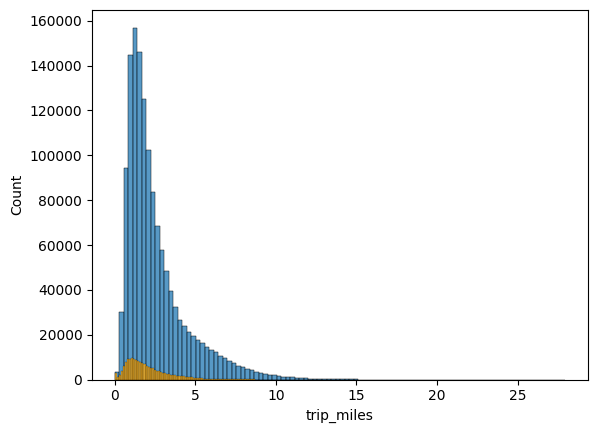

In [159]:
sns.histplot(geo_test_df['trip_miles'], bins=100)
sns.histplot(distance_df['distance'], bins=100, color='orange')


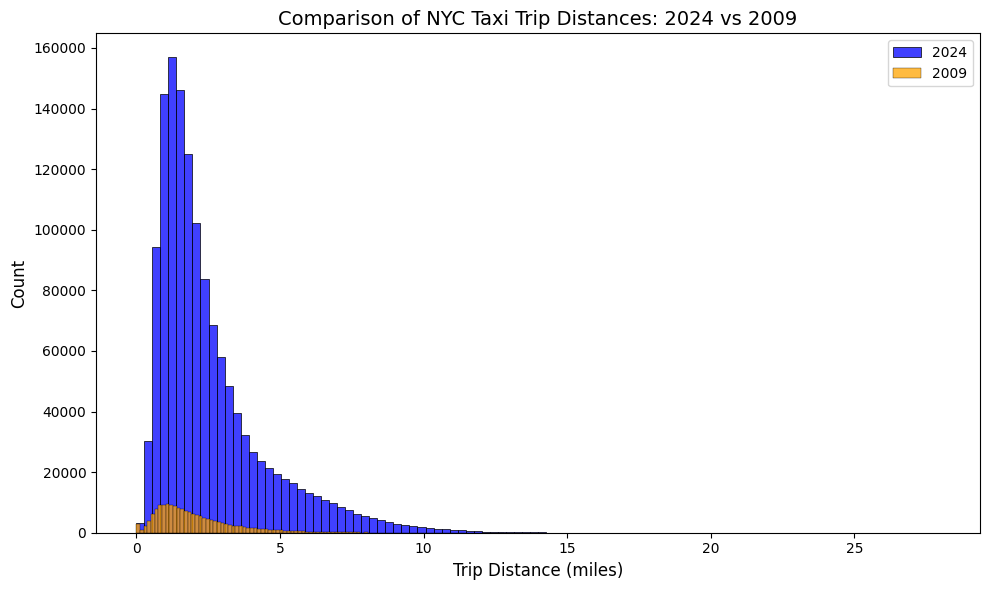

In [160]:
plt.figure(figsize=(10, 6))

# Plot the histograms with labels for the legend
sns.histplot(geo_test_df['trip_miles'], bins=100, color='blue', label='2024')
sns.histplot(distance_df['distance'], bins=100, color='orange', label='2009')

# Add title and improve axis labels
plt.title('Comparison of NYC Taxi Trip Distances: 2024 vs 2009', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Improve tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optional: Improve layout
plt.tight_layout()

# Show plot
plt.show()

In [161]:
geo_test_df['trip_miles'].describe()

count    1.377401e+06
mean     2.551665e+00
std      1.937714e+00
min      0.000000e+00
25%      1.240000e+00
50%      1.930000e+00
75%      3.180000e+00
max      2.797000e+01
Name: trip_miles, dtype: float64

In [162]:
distance_df_2 = distance_df[distance_df['distance'] != 0 ]

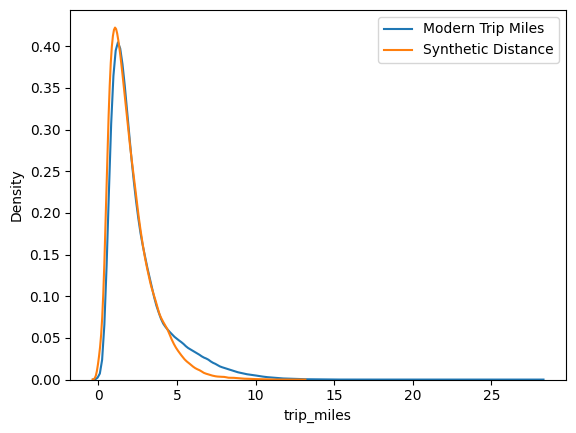

In [163]:
sns.kdeplot(geo_test_df['trip_miles'], label='Modern Trip Miles')
sns.kdeplot(distance_df_2['distance'], label='Synthetic Distance')
plt.legend()


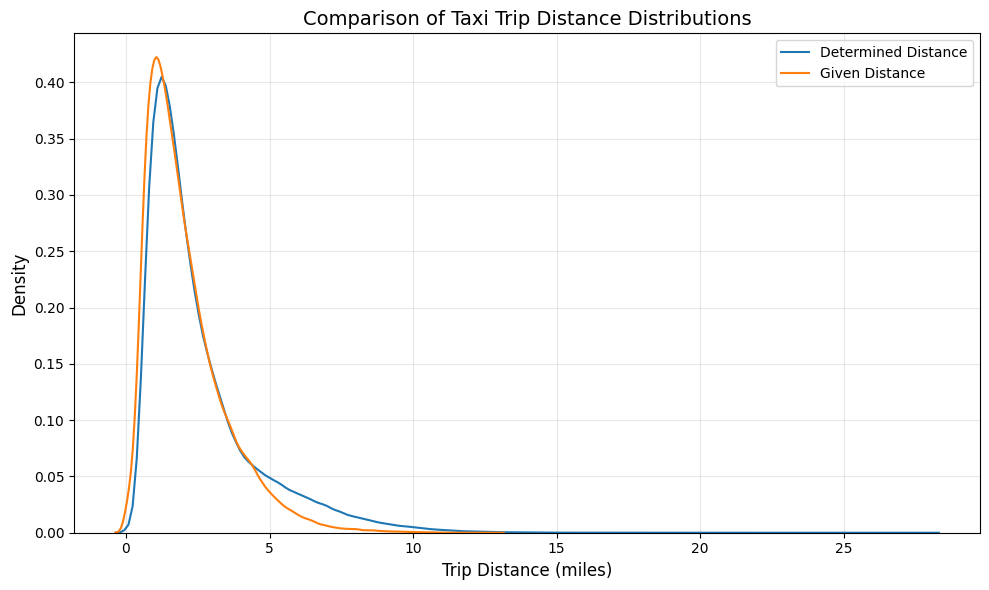

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))

# Create the KDE plots with new labels
sns.kdeplot(geo_test_df['trip_miles'], label='Determined Distance')
sns.kdeplot(distance_df_2['distance'], label='Given Distance')

# Add title and improve axis labels
plt.title('Comparison of Taxi Trip Distance Distributions', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend with better position
plt.legend(fontsize=10)

# Improve tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optional: Improve overall appearance
plt.grid(alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()

# Optional: Save the figure
# plt.savefig('taxi_trip_distance_comparison_kde.png', dpi=300, bbox_inches='tight')

In [165]:

geo_test_df_clipped = geo_test_df[geo_test_df['trip_miles'] <= 12.8]


In [166]:
#distance_df[distance_df['distance'] == 0]

In [167]:
distance_df_2['base_passenger_fare'] = distance_df_2['fare_amount']
distance_df_2['base_passenger_fare'] = distance_df_2['adjusted_base_fare']

<ipython-input-167-0a6ea005973d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_2['base_passenger_fare'] = distance_df_2['fare_amount']
<ipython-input-167-0a6ea005973d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_2['base_passenger_fare'] = distance_df_2['adjusted_base_fare']


In [168]:
distance_df_2

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
8         15822268   2012-02-17 09:32:00.00000043          9.7   
...            ...                            ...          ...   
199673    44943450   2009-12-15 07:53:00.00000063          4.5   
199701    44895432    2009-09-16 10:46:52.0000001          6.1   
199735    18714081    2015-01-22 16:52:06.0000001          4.0   
199761    10343914  2013-06-24 13:06:00.000000176          6.0   
199873    36575161   2012-03-04 20:28:00.00000096          3.7   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06        -73.999817        40.738354   
1      2009-07-17 20:04:56        -73.994355        40.728225   
2      2009-08-24 21:45:00        -74.005043        40.740770   
4      2014-08-28 17:47:00        -73.925023        40.744085   
8      2012-02-17 09:32:00        -73.975187        40.745767   
...                    ...               ...              ...   
199673 2009-12-15 07:53:00        -73.973547        40.792330   
199701 2009-09-16 10:46:52        -73.974610        40.790523   
199735 2015-01-22 16:52:06        -73.972771        40.796940   
199761 2013-06-24 13:06:00        -73.957107        40.802107   
199873 2012-03-04 20:28:00        -73.963047        40.794090   

        dropoff_longitude  dropoff_latitude  passenger_count  \
0              -73.999512         40.723217                1   
1              -73.994710         40.750325                1   
2              -73.962565         40.772647                1   
4              -73.973082         40.761247                5   
8              -74.002720         40.743537                1   
...                   ...               ...              ...   
199673         -73.968370         40.787413                1   
199701         -73.961033         40.806596                1   
199735         -73.966850         40.798862                1   
199761         -73.969918         40.793960                1   
199873         -73.967232         40.788057                1   

        adjusted_base_fare  distance  base_passenger_fare  
0                    17.39  1.306177                17.39  
1                    18.41  1.959462                18.41  
2                    32.91  5.130495                32.91  
4                    41.00  4.500249                41.00  
8                    24.95  2.053647                24.95  
...                    ...       ...                  ...  
199673                8.99  0.696486                 8.99  
199701               14.30  2.045850                14.30  
199735                8.67  0.541168                 8.67  
199761               14.04  1.446102                14.04  
199873                8.68  0.705042                 8.68  

[171077 rows x 12 columns]

In [169]:
distance_df_2['base_passenger_fare'].sort_values()

38604       4.53
25672       4.53
143813      4.60
43233       4.62
126325      4.62
           ...  
128128    137.26
73591     137.77
15362     138.24
2053      138.66
170081    139.18
Name: base_passenger_fare, Length: 171077, dtype: float64

In [170]:
distance_df_2

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
8         15822268   2012-02-17 09:32:00.00000043          9.7   
...            ...                            ...          ...   
199673    44943450   2009-12-15 07:53:00.00000063          4.5   
199701    44895432    2009-09-16 10:46:52.0000001          6.1   
199735    18714081    2015-01-22 16:52:06.0000001          4.0   
199761    10343914  2013-06-24 13:06:00.000000176          6.0   
199873    36575161   2012-03-04 20:28:00.00000096          3.7   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06        -73.999817        40.738354   
1      2009-07-17 20:04:56        -73.994355        40.728225   
2      2009-08-24 21:45:00        -74.005043        40.740770   
4      2014-08-28 17:47:00        -73.925023        40.744085   
8      2012-02-17 09:32:00        -73.975187        40.745767   
...                    ...               ...              ...   
199673 2009-12-15 07:53:00        -73.973547        40.792330   
199701 2009-09-16 10:46:52        -73.974610        40.790523   
199735 2015-01-22 16:52:06        -73.972771        40.796940   
199761 2013-06-24 13:06:00        -73.957107        40.802107   
199873 2012-03-04 20:28:00        -73.963047        40.794090   

        dropoff_longitude  dropoff_latitude  passenger_count  \
0              -73.999512         40.723217                1   
1              -73.994710         40.750325                1   
2              -73.962565         40.772647                1   
4              -73.973082         40.761247                5   
8              -74.002720         40.743537                1   
...                   ...               ...              ...   
199673         -73.968370         40.787413                1   
199701         -73.961033         40.806596                1   
199735         -73.966850         40.798862                1   
199761         -73.969918         40.793960                1   
199873         -73.967232         40.788057                1   

        adjusted_base_fare  distance  base_passenger_fare  
0                    17.39  1.306177                17.39  
1                    18.41  1.959462                18.41  
2                    32.91  5.130495                32.91  
4                    41.00  4.500249                41.00  
8                    24.95  2.053647                24.95  
...                    ...       ...                  ...  
199673                8.99  0.696486                 8.99  
199701               14.30  2.045850                14.30  
199735                8.67  0.541168                 8.67  
199761               14.04  1.446102                14.04  
199873                8.68  0.705042                 8.68  

[171077 rows x 12 columns]

In [171]:
distance_df_2['base_passenger_fare'].sort_values()

38604       4.53
25672       4.53
143813      4.60
43233       4.62
126325      4.62
           ...  
128128    137.26
73591     137.77
15362     138.24
2053      138.66
170081    139.18
Name: base_passenger_fare, Length: 171077, dtype: float64

In [172]:
geo_test_df

request_datetime   on_scene_datetime     pickup_datetime  \
394658  2024-04-02 18:33:05 2024-04-02 18:42:31 2024-04-02 18:42:51   
2327577 2024-04-09 23:35:19 2024-04-09 23:45:51 2024-04-09 23:46:48   
639206  2024-04-03 15:47:44 2024-04-03 15:51:13 2024-04-03 15:51:25   
2000864 2024-04-08 14:52:08 2024-04-08 14:54:54 2024-04-08 14:56:21   
629998  2024-04-03 14:55:45 2024-04-03 15:00:14 2024-04-03 15:00:49   
...                     ...                 ...                 ...   
1134248 2025-01-31 02:03:01 2025-01-31 02:06:23 2025-01-31 02:06:31   
1099635 2025-01-30 22:22:07 2025-01-30 22:26:12 2025-01-30 22:26:21   
343187  2025-01-27 22:00:10 2025-01-27 22:01:10 2025-01-27 22:01:37   
1123598 2025-01-31 00:29:54 2025-01-31 00:31:10 2025-01-31 00:33:11   
1031030 2025-01-30 19:42:49 2025-01-30 19:46:11 2025-01-30 19:47:16   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  \
394658  2024-04-02 18:55:04           246           234        1.49   
2327577 2024-04-09 23:53:13           164           100        0.85   
639206  2024-04-03 16:05:00           161           237        1.18   
2000864 2024-04-08 15:01:24           170           137        0.50   
629998  2024-04-03 15:16:28           231           211        1.85   
...                     ...           ...           ...         ...   
1134248 2025-01-31 02:13:26           186           125        2.23   
1099635 2025-01-30 22:45:22           234           236        3.80   
343187  2025-01-27 22:10:42            88             4        3.66   
1123598 2025-01-31 00:41:09           161           137        1.15   
1031030 2025-01-30 20:10:46           246           243        8.89   

         trip_time  base_passenger_fare  tolls   bcf  sales_tax  \
394658         733                10.22    0.0  0.30       0.96   
2327577        385                14.52    0.0  0.40       1.29   
639206         815                15.36    0.0  0.45       1.44   
2000864        303                 8.25    0.0  0.23       0.73   
629998         939                26.53    0.0  0.73       2.35   
...            ...                  ...    ...   ...        ...   
1134248        415                15.39    0.0  0.38       1.36   
1099635       1141                48.41    0.0  1.22       4.03   
343187         545                12.15    0.0  0.31       1.08   
1123598        478                10.96    0.0  0.27       1.03   
1031030       1410                30.82    0.0  0.80       2.73   

         congestion_surcharge  airport_fee                   pickup_zone  \
394658                   2.75          0.0     West Chelsea/Hudson Yards   
2327577                  2.75          0.0                 Midtown South   
639206                   2.75          0.0                Midtown Center   
2000864                  2.75          0.0                   Murray Hill   
629998                   2.75          0.0          TriBeCa/Civic Center   
...                       ...          ...                           ...   
1134248                  2.75          0.0  Penn Station/Madison Sq West   
1099635                  2.75          0.0                      Union Sq   
343187                   2.75          0.0      Financial District South   
1123598                  2.75          0.0                Midtown Center   
1031030                  2.75          0.0     West Chelsea/Hudson Yards   

                     dropoff_zone  
394658                   Union Sq  
2327577          Garment District  
639206      Upper East Side South  
2000864                  Kips Bay  
629998                       SoHo  
...                           ...  
1134248                 Hudson Sq  
1099635     Upper East Side North  
343187              Alphabet City  
1123598                  Kips Bay  
1031030  Washington Heights North  

[1377401 rows x 16 columns]

In [173]:
type(geo_test_df['pickup_datetime'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [174]:
scaling_factor = geo_test_df_clipped['trip_miles'].mean() / distance_df_2['distance'].mean()
distance_df_2['distance_scaled'] = distance_df_2['distance'] * scaling_factor

<ipython-input-174-885e240f6dbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_2['distance_scaled'] = distance_df_2['distance'] * scaling_factor


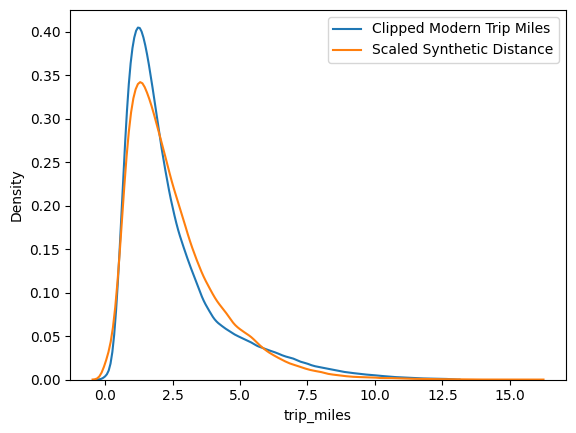

In [175]:
sns.kdeplot(geo_test_df_clipped['trip_miles'], label='Clipped Modern Trip Miles')
sns.kdeplot(distance_df_2['distance_scaled'], label='Scaled Synthetic Distance')
plt.legend()


In [176]:
distance_df_2

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
8         15822268   2012-02-17 09:32:00.00000043          9.7   
...            ...                            ...          ...   
199673    44943450   2009-12-15 07:53:00.00000063          4.5   
199701    44895432    2009-09-16 10:46:52.0000001          6.1   
199735    18714081    2015-01-22 16:52:06.0000001          4.0   
199761    10343914  2013-06-24 13:06:00.000000176          6.0   
199873    36575161   2012-03-04 20:28:00.00000096          3.7   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06        -73.999817        40.738354   
1      2009-07-17 20:04:56        -73.994355        40.728225   
2      2009-08-24 21:45:00        -74.005043        40.740770   
4      2014-08-28 17:47:00        -73.925023        40.744085   
8      2012-02-17 09:32:00        -73.975187        40.745767   
...                    ...               ...              ...   
199673 2009-12-15 07:53:00        -73.973547        40.792330   
199701 2009-09-16 10:46:52        -73.974610        40.790523   
199735 2015-01-22 16:52:06        -73.972771        40.796940   
199761 2013-06-24 13:06:00        -73.957107        40.802107   
199873 2012-03-04 20:28:00        -73.963047        40.794090   

        dropoff_longitude  dropoff_latitude  passenger_count  \
0              -73.999512         40.723217                1   
1              -73.994710         40.750325                1   
2              -73.962565         40.772647                1   
4              -73.973082         40.761247                5   
8              -74.002720         40.743537                1   
...                   ...               ...              ...   
199673         -73.968370         40.787413                1   
199701         -73.961033         40.806596                1   
199735         -73.966850         40.798862                1   
199761         -73.969918         40.793960                1   
199873         -73.967232         40.788057                1   

        adjusted_base_fare  distance  base_passenger_fare  distance_scaled  
0                    17.39  1.306177                17.39         1.612214  
1                    18.41  1.959462                18.41         2.418562  
2                    32.91  5.130495                32.91         6.332567  
4                    41.00  4.500249                41.00         5.554655  
8                    24.95  2.053647                24.95         2.534815  
...                    ...       ...                  ...              ...  
199673                8.99  0.696486                 8.99         0.859672  
199701               14.30  2.045850                14.30         2.525192  
199735                8.67  0.541168                 8.67         0.667964  
199761               14.04  1.446102                14.04         1.784923  
199873                8.68  0.705042                 8.68         0.870233  

[171077 rows x 13 columns]

In [177]:
distance_df_4 = distance_df_2

<Axes: xlabel='base_passenger_fare', ylabel='trip_time'>

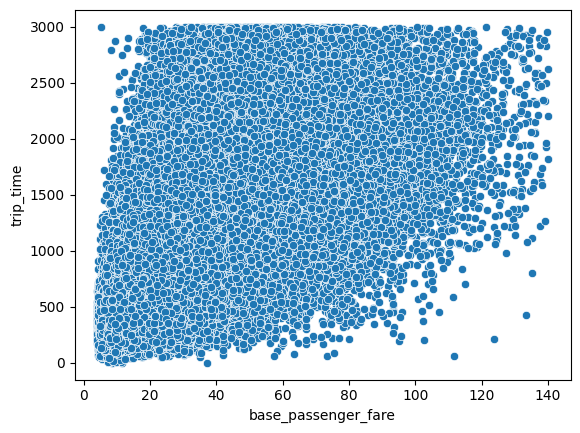

In [178]:
sns.scatterplot(data=geo_test_df, x = 'base_passenger_fare', y = 'trip_time')

In [179]:
distance_df_4['base_passenger_fare'].sort_values()

38604       4.53
25672       4.53
143813      4.60
43233       4.62
126325      4.62
           ...  
128128    137.26
73591     137.77
15362     138.24
2053      138.66
170081    139.18
Name: base_passenger_fare, Length: 171077, dtype: float64

In [180]:
distance_df_5 = distance_df_4

In [181]:
distance_df_5['trip_miles'] = distance_df_5['distance_scaled']

<ipython-input-181-a390c81939b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_5['trip_miles'] = distance_df_5['distance_scaled']


In [182]:
distance_df_5

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
8         15822268   2012-02-17 09:32:00.00000043          9.7   
...            ...                            ...          ...   
199673    44943450   2009-12-15 07:53:00.00000063          4.5   
199701    44895432    2009-09-16 10:46:52.0000001          6.1   
199735    18714081    2015-01-22 16:52:06.0000001          4.0   
199761    10343914  2013-06-24 13:06:00.000000176          6.0   
199873    36575161   2012-03-04 20:28:00.00000096          3.7   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06        -73.999817        40.738354   
1      2009-07-17 20:04:56        -73.994355        40.728225   
2      2009-08-24 21:45:00        -74.005043        40.740770   
4      2014-08-28 17:47:00        -73.925023        40.744085   
8      2012-02-17 09:32:00        -73.975187        40.745767   
...                    ...               ...              ...   
199673 2009-12-15 07:53:00        -73.973547        40.792330   
199701 2009-09-16 10:46:52        -73.974610        40.790523   
199735 2015-01-22 16:52:06        -73.972771        40.796940   
199761 2013-06-24 13:06:00        -73.957107        40.802107   
199873 2012-03-04 20:28:00        -73.963047        40.794090   

        dropoff_longitude  dropoff_latitude  passenger_count  \
0              -73.999512         40.723217                1   
1              -73.994710         40.750325                1   
2              -73.962565         40.772647                1   
4              -73.973082         40.761247                5   
8              -74.002720         40.743537                1   
...                   ...               ...              ...   
199673         -73.968370         40.787413                1   
199701         -73.961033         40.806596                1   
199735         -73.966850         40.798862                1   
199761         -73.969918         40.793960                1   
199873         -73.967232         40.788057                1   

        adjusted_base_fare  distance  base_passenger_fare  distance_scaled  \
0                    17.39  1.306177                17.39         1.612214   
1                    18.41  1.959462                18.41         2.418562   
2                    32.91  5.130495                32.91         6.332567   
4                    41.00  4.500249                41.00         5.554655   
8                    24.95  2.053647                24.95         2.534815   
...                    ...       ...                  ...              ...   
199673                8.99  0.696486                 8.99         0.859672   
199701               14.30  2.045850                14.30         2.525192   
199735                8.67  0.541168                 8.67         0.667964   
199761               14.04  1.446102                14.04         1.784923   
199873                8.68  0.705042                 8.68         0.870233   

        trip_miles  
0         1.612214  
1         2.418562  
2         6.332567  
4         5.554655  
8         2.534815  
...            ...  
199673    0.859672  
199701    2.525192  
199735    0.667964  
199761    1.784923  
199873    0.870233  

[171077 rows x 14 columns]

In [183]:
geo_test_df_clipped['pickup_year'] = geo_test_df_clipped['pickup_datetime'].dt.year.astype(int)


geo_test_df_clipped['pickup_month'] = geo_test_df_clipped['pickup_datetime'].dt.month.astype(int)
geo_test_df_clipped['pickup_month_cos'] = np.sin(2 * np.pi * geo_test_df_clipped['pickup_month']/12)
geo_test_df_clipped['pickup_month_sin'] = np.cos(2 * np.pi * geo_test_df_clipped['pickup_month']/12)

geo_test_df_clipped['pickup_day'] = geo_test_df_clipped['pickup_datetime'].dt.day.astype(int)
geo_test_df_clipped['days_in_month'] = geo_test_df_clipped['pickup_datetime'].dt.days_in_month.astype(int)
geo_test_df_clipped['pickup_day_cos'] = np.sin(2 * np.pi * geo_test_df_clipped['pickup_day']/geo_test_df_clipped['days_in_month'])
geo_test_df_clipped['pickup_day_sin'] = np.cos(2 * np.pi * geo_test_df_clipped['pickup_day']/geo_test_df_clipped['days_in_month'])

geo_test_df_clipped['pickup_dayofweek'] = geo_test_df_clipped['pickup_datetime'].dt.dayofweek
geo_test_df_clipped['pickup_dow_sin'] = np.sin(2 * np.pi * geo_test_df_clipped['pickup_dayofweek'] / 7)
geo_test_df_clipped['pickup_dow_cos'] = np.cos(2 * np.pi * geo_test_df_clipped['pickup_dayofweek'] / 7)

geo_test_df_clipped['pickup_hour'] = geo_test_df_clipped['pickup_datetime'].dt.hour.astype(int)
geo_test_df_clipped['pickup_hour_cos'] = np.sin(2 * np.pi * geo_test_df_clipped['pickup_hour']/24)
geo_test_df_clipped['pickup_hour_sin'] = np.cos(2 * np.pi * geo_test_df_clipped['pickup_hour']/24)

geo_test_df_clipped['pickup_minute'] = geo_test_df_clipped['pickup_datetime'].dt.minute.astype(int)
geo_test_df_clipped['pickup_minute_cos'] = np.sin(2 * np.pi * geo_test_df_clipped['pickup_minute']/60)
geo_test_df_clipped['pickup_minute_sin'] = np.cos(2 * np.pi * geo_test_df_clipped['pickup_minute']/60)

<ipython-input-183-de61a6c31b70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_test_df_clipped['pickup_year'] = geo_test_df_clipped['pickup_datetime'].dt.year.astype(int)
<ipython-input-183-de61a6c31b70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_test_df_clipped['pickup_month'] = geo_test_df_clipped['pickup_datetime'].dt.month.astype(int)
<ipython-input-183-de61a6c31b70>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [184]:
from sklearn.model_selection import train_test_split

features = ['trip_miles','base_passenger_fare', 'pickup_month_cos', 'pickup_month_sin', 'pickup_day_cos',
            'pickup_day_sin', 'pickup_dow_sin', 'pickup_dow_cos', 'pickup_hour_cos', 'pickup_hour_sin', 'pickup_minute_cos',
            'pickup_minute_sin']
X = geo_test_df_clipped[features]
y = geo_test_df_clipped['trip_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

opt = Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999 )
model.compile(loss = 'mean_squared_error', optimizer ='adam', metrics = ['root_mean_squared_error','mean_absolute_error'])

In [186]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='val_loss', min_delta = 1e-4, patience = 10)


In [187]:
history = model.fit(X_train, y_train, epochs=25, batch_size=256, validation_split=.2, callbacks=[trainCallback])


2025/04/17 14:36:47 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'dadf8aa55a02490393f280ec85eb9dda', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2025/04/17 14:36:47 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: Sequential model 'sequential' has no defined input shape yet.
2025/04/17 14:36:47 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.


Epoch 1/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 227836.1250 - mean_absolute_error: 319.9305 - root_mean_squared_error: 452.3884

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 227804.2344 - mean_absolute_error: 319.9063 - root_mean_squared_error: 452.3568 - val_loss: 76885.9922 - val_mean_absolute_error: 200.7796 - val_root_mean_squared_error: 277.2832
Epoch 2/25
3440/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75492.2891 - mean_absolute_error: 197.9433 - root_mean_squared_error: 274.7514

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 75491.4297 - mean_absolute_error: 197.9418 - root_mean_squared_error: 274.7499 - val_loss: 71135.9297 - val_mean_absolute_error: 190.0269 - val_root_mean_squared_error: 266.7132
Epoch 3/25
3440/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71110.3516 - mean_absolute_error: 190.8796 - root_mean_squared_error: 266.6630

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 71110.2812 - mean_absolute_error: 190.8795 - root_mean_squared_error: 266.6628 - val_loss: 69986.3359 - val_mean_absolute_error: 190.8791 - val_root_mean_squared_error: 264.5493
Epoch 4/25
3424/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70286.1094 - mean_absolute_error: 189.6286 - root_mean_squared_error: 265.1133

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 70285.0312 - mean_absolute_error: 189.6272 - root_mean_squared_error: 265.1113 - val_loss: 69564.1562 - val_mean_absolute_error: 190.8409 - val_root_mean_squared_error: 263.7502
Epoch 5/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69448.0391 - mean_absolute_error: 188.4582 - root_mean_squared_error: 263.5283

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 69448.0391 - mean_absolute_error: 188.4582 - root_mean_squared_error: 263.5283 - val_loss: 68885.5078 - val_mean_absolute_error: 187.0159 - val_root_mean_squared_error: 262.4605
Epoch 6/25
3439/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69307.0312 - mean_absolute_error: 187.8739 - root_mean_squared_error: 263.2599

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 69306.8516 - mean_absolute_error: 187.8738 - root_mean_squared_error: 263.2595 - val_loss: 68385.9297 - val_mean_absolute_error: 186.9631 - val_root_mean_squared_error: 261.5070
Epoch 7/25
3427/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68844.8047 - mean_absolute_error: 187.5251 - root_mean_squared_error: 262.3824

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 68844.5391 - mean_absolute_error: 187.5241 - root_mean_squared_error: 262.3819 - val_loss: 68322.4531 - val_mean_absolute_error: 188.0297 - val_root_mean_squared_error: 261.3857
Epoch 8/25
3439/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68877.4453 - mean_absolute_error: 187.2152 - root_mean_squared_error: 262.4424

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 68877.2031 - mean_absolute_error: 187.2151 - root_mean_squared_error: 262.4420 - val_loss: 68029.6016 - val_mean_absolute_error: 185.7308 - val_root_mean_squared_error: 260.8248
Epoch 9/25
3426/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68529.1953 - mean_absolute_error: 186.9482 - root_mean_squared_error: 261.7787

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 68528.7812 - mean_absolute_error: 186.9477 - root_mean_squared_error: 261.7780 - val_loss: 67833.9609 - val_mean_absolute_error: 186.6446 - val_root_mean_squared_error: 260.4495
Epoch 10/25
3431/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68374.8281 - mean_absolute_error: 186.8844 - root_mean_squared_error: 261.4851

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 68374.5469 - mean_absolute_error: 186.8836 - root_mean_squared_error: 261.4845 - val_loss: 67636.3750 - val_mean_absolute_error: 185.3015 - val_root_mean_squared_error: 260.0699
Epoch 11/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 68483.4219 - mean_absolute_error: 186.8412 - root_mean_squared_error: 261.6922 - val_loss: 67834.5938 - val_mean_absolute_error: 185.2016 - val_root_mean_squared_error: 260.4507
Epoch 12/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 68040.6953 - mean_absolute_error: 186.2796 - root_mean_squared_error: 260.8447 - val_loss: 68140.3906 - val_mean_absolute_error: 189.1380 - val_root_mean_squared_error: 261.0371
Epoch 13/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67976.5781 - mean_absolute_error: 186.0317 - root_mean_squared_error: 260.7212 - val_loss: 69303.8984 - val_mean_absolute_error: 194.2526 - val_root_mean_squared_error: 263.2563
Epoch 14/25
3435/3441 ━━━━━━━━━━━━━━━━━━━━ 0

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67942.7891 - mean_absolute_error: 186.4942 - root_mean_squared_error: 260.6579 - val_loss: 67236.5391 - val_mean_absolute_error: 184.9453 - val_root_mean_squared_error: 259.3001
Epoch 15/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 67648.4297 - mean_absolute_error: 185.7491 - root_mean_squared_error: 260.0916 - val_loss: 67499.3047 - val_mean_absolute_error: 183.5139 - val_root_mean_squared_error: 259.8063
Epoch 16/25
3429/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67972.6797 - mean_absolute_error: 186.2607 - root_mean_squared_error: 260.7121

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67971.3906 - mean_absolute_error: 186.2589 - root_mean_squared_error: 260.7096 - val_loss: 67066.8828 - val_mean_absolute_error: 185.2415 - val_root_mean_squared_error: 258.9727
Epoch 17/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 67347.2422 - mean_absolute_error: 185.3677 - root_mean_squared_error: 259.5120 - val_loss: 67365.1172 - val_mean_absolute_error: 187.8459 - val_root_mean_squared_error: 259.5479
Epoch 18/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67663.2266 - mean_absolute_error: 185.7751 - root_mean_squared_error: 260.1209 - val_loss: 67199.8281 - val_mean_absolute_error: 183.3880 - val_root_mean_squared_error: 259.2293
Epoch 19/25
3437/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67594.7656 - mean_absolute_error: 185.6129 - root_mean_squared_error: 259.9889

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67594.5312 - mean_absolute_error: 185.6128 - root_mean_squared_error: 259.9884 - val_loss: 66825.4375 - val_mean_absolute_error: 185.1885 - val_root_mean_squared_error: 258.5062
Epoch 20/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67399.4688 - mean_absolute_error: 185.4637 - root_mean_squared_error: 259.6127 - val_loss: 66945.4922 - val_mean_absolute_error: 183.4407 - val_root_mean_squared_error: 258.7383
Epoch 21/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 67218.5312 - mean_absolute_error: 185.2152 - root_mean_squared_error: 259.2647 - val_loss: 66873.2500 - val_mean_absolute_error: 183.8667 - val_root_mean_squared_error: 258.5986
Epoch 22/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67182.8203 - mean_absolute_error: 185.0982 - root_mean_squared_error: 259.1959 - val_loss: 66908.6094 - val_mean_absolute_error: 183.2001 - val_root_mean_squared_error: 258.6670
Epoch 23/25
3435/3441 ━━━━━━━━━━━━━━━━━━━━ 0

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67031.0078 - mean_absolute_error: 184.8579 - root_mean_squared_error: 258.9027 - val_loss: 66610.4219 - val_mean_absolute_error: 185.3575 - val_root_mean_squared_error: 258.0899
Epoch 24/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67096.8359 - mean_absolute_error: 185.0736 - root_mean_squared_error: 259.0302 - val_loss: 66749.8906 - val_mean_absolute_error: 183.5102 - val_root_mean_squared_error: 258.3600
Epoch 25/25
3432/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67327.4922 - mean_absolute_error: 185.0873 - root_mean_squared_error: 259.4736

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 67326.7812 - mean_absolute_error: 185.0869 - root_mean_squared_error: 259.4723 - val_loss: 66566.6094 - val_mean_absolute_error: 185.2037 - val_root_mean_squared_error: 258.0050


2025/04/17 14:41:57 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2025/04/17 14:41:57 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/04/17 14:42:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [188]:
distance_df_5['pickup_year'] = distance_df_5['pickup_datetime'].dt.year.astype(int)


distance_df_5['pickup_month'] = distance_df_5['pickup_datetime'].dt.month.astype(int)
distance_df_5['pickup_month_cos'] = np.sin(2 * np.pi * distance_df_5['pickup_month']/12)
distance_df_5['pickup_month_sin'] = np.cos(2 * np.pi * distance_df_5['pickup_month']/12)

distance_df_5['pickup_day'] = distance_df_5['pickup_datetime'].dt.day.astype(int)
distance_df_5['days_in_month'] = distance_df_5['pickup_datetime'].dt.days_in_month.astype(int)
distance_df_5['pickup_day_sin'] = np.sin(2 * np.pi * distance_df_5['pickup_day'] / distance_df_5['days_in_month'])
distance_df_5['pickup_day_cos'] = np.cos(2 * np.pi * distance_df_5['pickup_day'] / distance_df_5['days_in_month'])

distance_df_5['pickup_dayofweek'] = distance_df_5['pickup_datetime'].dt.dayofweek.astype(int)
distance_df_5['pickup_dow_sin'] = np.sin(2 * np.pi * distance_df_5['pickup_dayofweek'] / 7)
distance_df_5['pickup_dow_cos'] = np.cos(2 * np.pi * distance_df_5['pickup_dayofweek'] / 7)


distance_df_5['pickup_hour'] = distance_df_5['pickup_datetime'].dt.hour.astype(int)
distance_df_5['pickup_hour_cos'] = np.sin(2 * np.pi * distance_df_5['pickup_hour']/24)
distance_df_5['pickup_hour_sin'] = np.cos(2 * np.pi * distance_df_5['pickup_hour']/24)

distance_df_5['pickup_minute'] = distance_df_5['pickup_datetime'].dt.minute.astype(int)
distance_df_5['pickup_minute_cos'] = np.sin(2 * np.pi * distance_df_5['pickup_minute']/60)
distance_df_5['pickup_minute_sin'] = np.cos(2 * np.pi * distance_df_5['pickup_minute']/60)

X_2009 = distance_df_5[features]

<ipython-input-188-8dfe8121289e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_5['pickup_year'] = distance_df_5['pickup_datetime'].dt.year.astype(int)
<ipython-input-188-8dfe8121289e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_5['pickup_month'] = distance_df_5['pickup_datetime'].dt.month.astype(int)
<ipython-input-188-8dfe8121289e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [189]:
distance_df_5['predicted_trip_time'] = model.predict(X_2009)
distance_df_5['estimated_dropoff_time'] = distance_df_5['pickup_datetime'] + pd.to_timedelta(distance_df_5['predicted_trip_time'], unit='s')

5347/5347 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


<ipython-input-189-7286c6298dd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_5['predicted_trip_time'] = model.predict(X_2009)
<ipython-input-189-7286c6298dd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_5['estimated_dropoff_time'] = distance_df_5['pickup_datetime'] + pd.to_timedelta(distance_df_5['predicted_trip_time'], unit='s')


In [190]:
geo_test_df

request_datetime   on_scene_datetime     pickup_datetime  \
394658  2024-04-02 18:33:05 2024-04-02 18:42:31 2024-04-02 18:42:51   
2327577 2024-04-09 23:35:19 2024-04-09 23:45:51 2024-04-09 23:46:48   
639206  2024-04-03 15:47:44 2024-04-03 15:51:13 2024-04-03 15:51:25   
2000864 2024-04-08 14:52:08 2024-04-08 14:54:54 2024-04-08 14:56:21   
629998  2024-04-03 14:55:45 2024-04-03 15:00:14 2024-04-03 15:00:49   
...                     ...                 ...                 ...   
1134248 2025-01-31 02:03:01 2025-01-31 02:06:23 2025-01-31 02:06:31   
1099635 2025-01-30 22:22:07 2025-01-30 22:26:12 2025-01-30 22:26:21   
343187  2025-01-27 22:00:10 2025-01-27 22:01:10 2025-01-27 22:01:37   
1123598 2025-01-31 00:29:54 2025-01-31 00:31:10 2025-01-31 00:33:11   
1031030 2025-01-30 19:42:49 2025-01-30 19:46:11 2025-01-30 19:47:16   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  \
394658  2024-04-02 18:55:04           246           234        1.49   
2327577 2024-04-09 23:53:13           164           100        0.85   
639206  2024-04-03 16:05:00           161           237        1.18   
2000864 2024-04-08 15:01:24           170           137        0.50   
629998  2024-04-03 15:16:28           231           211        1.85   
...                     ...           ...           ...         ...   
1134248 2025-01-31 02:13:26           186           125        2.23   
1099635 2025-01-30 22:45:22           234           236        3.80   
343187  2025-01-27 22:10:42            88             4        3.66   
1123598 2025-01-31 00:41:09           161           137        1.15   
1031030 2025-01-30 20:10:46           246           243        8.89   

         trip_time  base_passenger_fare  tolls   bcf  sales_tax  \
394658         733                10.22    0.0  0.30       0.96   
2327577        385                14.52    0.0  0.40       1.29   
639206         815                15.36    0.0  0.45       1.44   
2000864        303                 8.25    0.0  0.23       0.73   
629998         939                26.53    0.0  0.73       2.35   
...            ...                  ...    ...   ...        ...   
1134248        415                15.39    0.0  0.38       1.36   
1099635       1141                48.41    0.0  1.22       4.03   
343187         545                12.15    0.0  0.31       1.08   
1123598        478                10.96    0.0  0.27       1.03   
1031030       1410                30.82    0.0  0.80       2.73   

         congestion_surcharge  airport_fee                   pickup_zone  \
394658                   2.75          0.0     West Chelsea/Hudson Yards   
2327577                  2.75          0.0                 Midtown South   
639206                   2.75          0.0                Midtown Center   
2000864                  2.75          0.0                   Murray Hill   
629998                   2.75          0.0          TriBeCa/Civic Center   
...                       ...          ...                           ...   
1134248                  2.75          0.0  Penn Station/Madison Sq West   
1099635                  2.75          0.0                      Union Sq   
343187                   2.75          0.0      Financial District South   
1123598                  2.75          0.0                Midtown Center   
1031030                  2.75          0.0     West Chelsea/Hudson Yards   

                     dropoff_zone  
394658                   Union Sq  
2327577          Garment District  
639206      Upper East Side South  
2000864                  Kips Bay  
629998                       SoHo  
...                           ...  
1134248                 Hudson Sq  
1099635     Upper East Side North  
343187              Alphabet City  
1123598                  Kips Bay  
1031030  Washington Heights North  

[1377401 rows x 16 columns]

8602/8602 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
Mean Absolute Error (MAE): 787.77 seconds
Root Mean Squared Error (RMSE): 883.18 seconds
R² Score: -2.1927


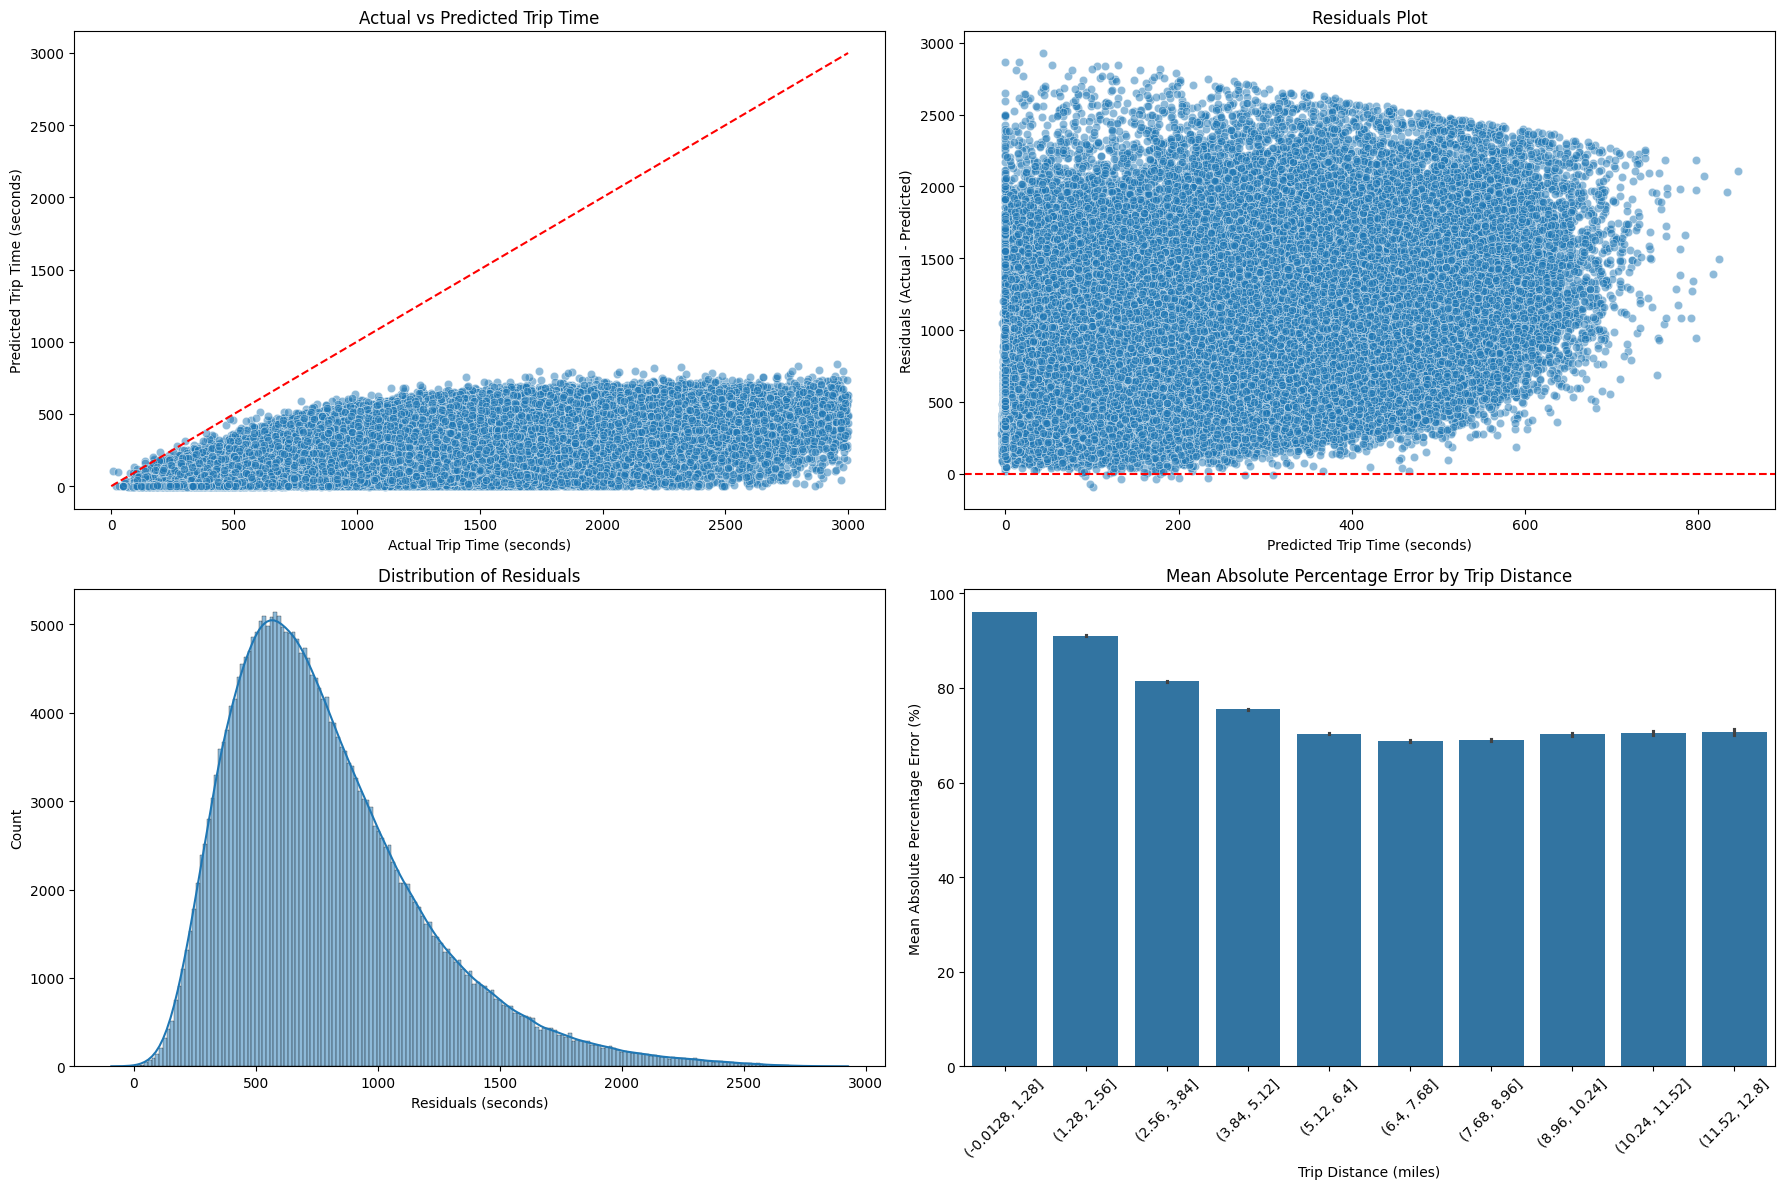

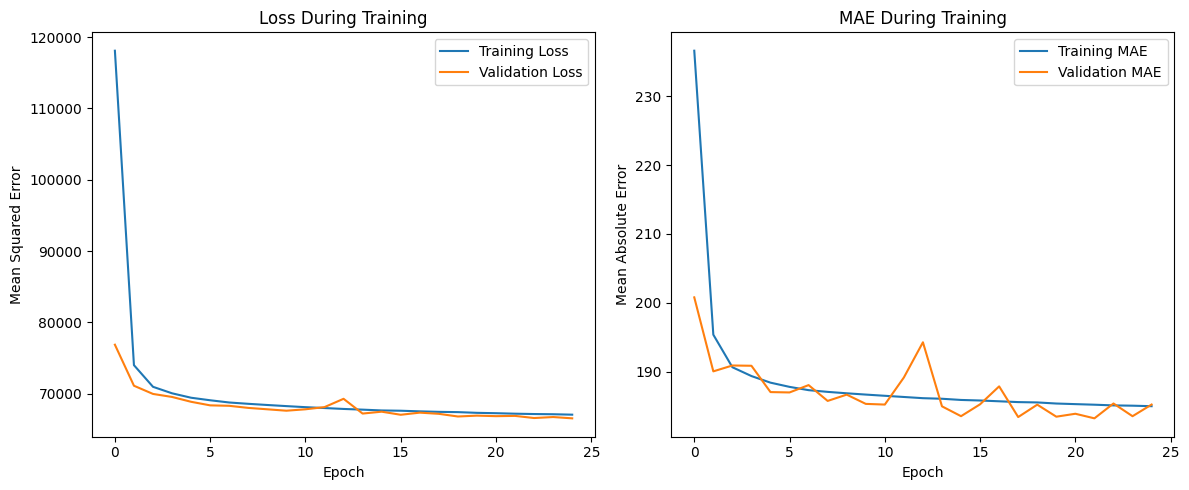

<ipython-input-198-2757bce311cc>:110: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(day_names)


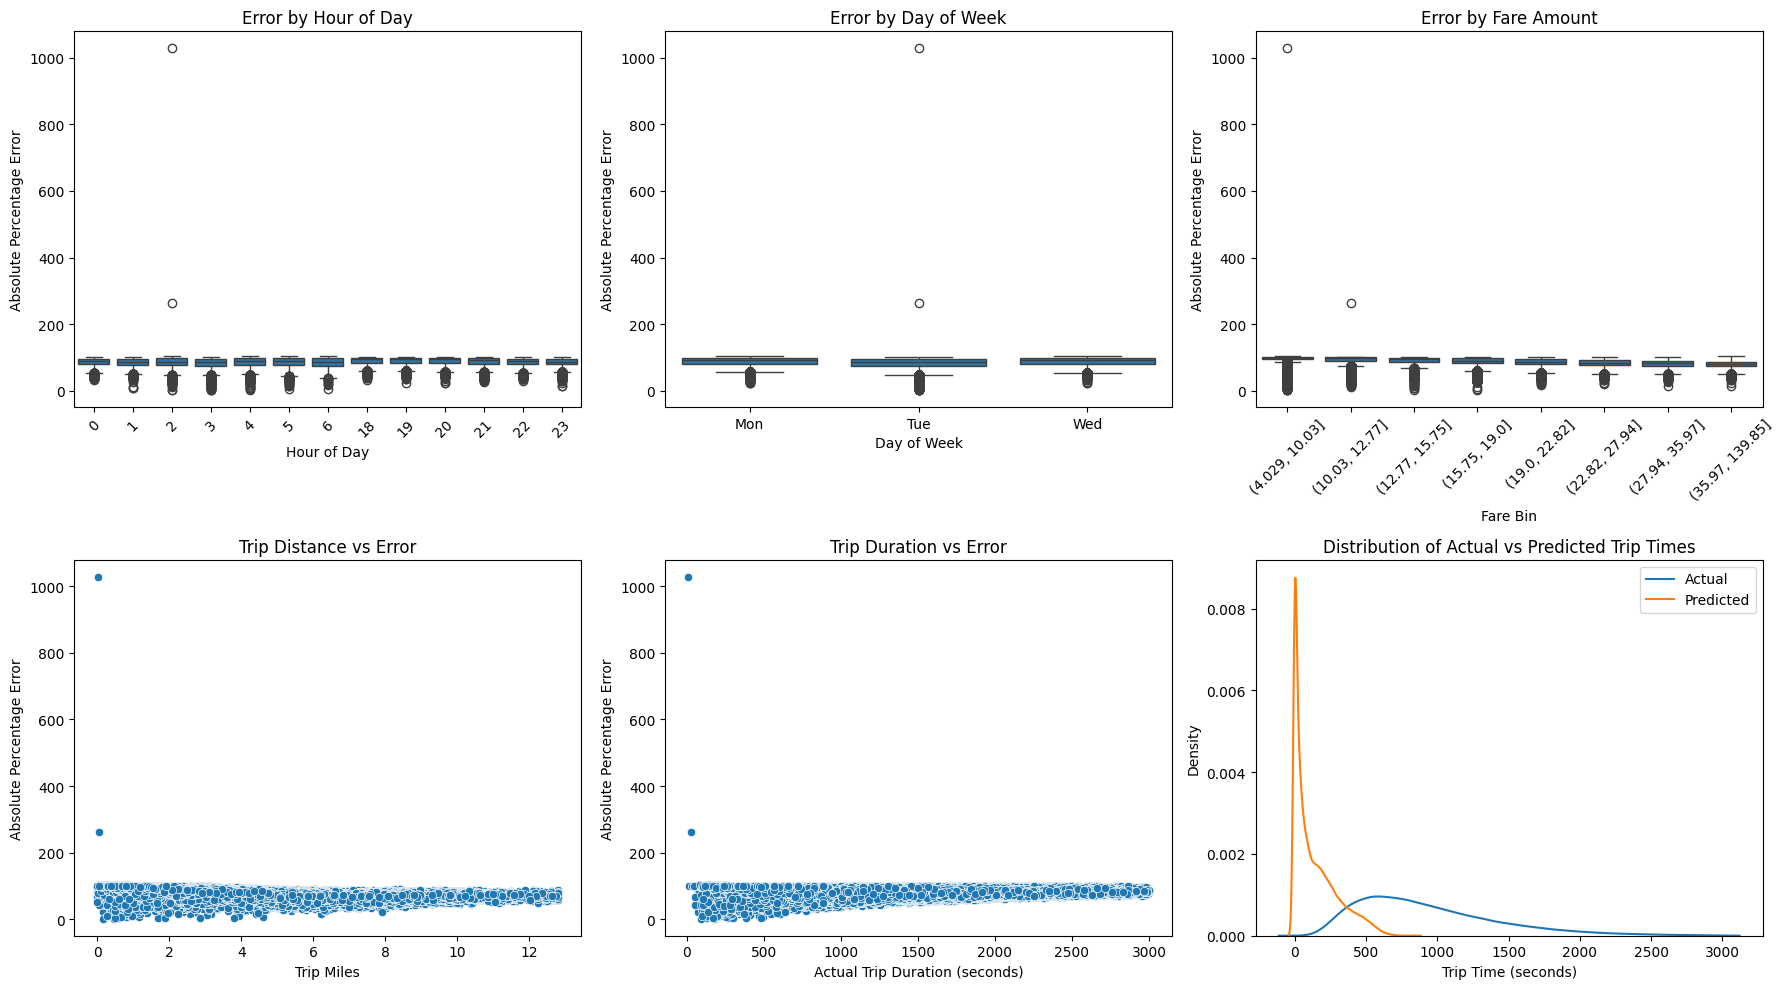


Summary Statistics of Absolute Percentage Error:
count    275262.000000
mean         87.371291
std          12.086107
min           2.133043
25%          79.762801
50%          89.964148
75%          97.930378
max        1027.918413
Name: Abs_Pct_Error, dtype: float64

Percentage of predictions within 10% of actual: 0.01%
Percentage of predictions within 20% of actual: 0.02%
Percentage of predictions within 30% of actual: 0.05%


In [198]:
# Model Performance Evaluation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you already have the model, X_test_scaled, and y_test from your previous code

# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f} seconds")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} seconds")
print(f"R² Score: {r2:.4f}")

# Create a DataFrame for actual vs predicted values
performance_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create visualizations
plt.figure(figsize=(18, 12))

# 1. Scatter plot of Actual vs Predicted
plt.subplot(2, 2, 1)
sns.scatterplot(x='Actual', y='Predicted', data=performance_df, alpha=0.5)
max_val = max(performance_df['Actual'].max(), performance_df['Predicted'].max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.title('Actual vs Predicted Trip Time')
plt.xlabel('Actual Trip Time (seconds)')
plt.ylabel('Predicted Trip Time (seconds)')

# 2. Residuals Plot
plt.subplot(2, 2, 2)
performance_df['Residuals'] = performance_df['Actual'] - performance_df['Predicted']
sns.scatterplot(x='Predicted', y='Residuals', data=performance_df, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Trip Time (seconds)')
plt.ylabel('Residuals (Actual - Predicted)')

# 3. Distribution of Residuals
plt.subplot(2, 2, 3)
sns.histplot(performance_df['Residuals'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (seconds)')

# 4. Error Distribution by Trip Distance
plt.subplot(2, 2, 4)
# Calculate absolute percentage error
performance_df['Abs_Pct_Error'] = np.abs(performance_df['Residuals'] / performance_df['Actual']) * 100
# Get corresponding trip_miles from X_test
performance_df['trip_miles'] = X_test['trip_miles'].values
# Create bins for trip distances
performance_df['distance_bin'] = pd.cut(performance_df['trip_miles'], bins=10)
# Plot mean absolute percentage error by distance bin
sns.barplot(x='distance_bin', y='Abs_Pct_Error', data=performance_df)
plt.title('Mean Absolute Percentage Error by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Mean Absolute Percentage Error (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('model_performance.png', dpi=300)
plt.show()

# 5. Learning Curves from Training History
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('MAE During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png', dpi=300)
plt.show()

# 6. Additional analysis: Prediction accuracy across different feature values
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Error by hour of day
performance_df['pickup_hour'] = X_test['pickup_hour_cos'].map(lambda x: int(np.arcsin(x) * 24 / (2 * np.pi)) % 24)
sns.boxplot(x='pickup_hour', y='Abs_Pct_Error', data=performance_df, ax=axes[0, 0])
axes[0, 0].set_title('Error by Hour of Day')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Absolute Percentage Error')
axes[0, 0].tick_params(axis='x', rotation=45)

# Error by day of week
performance_df['day_of_week'] = X_test['pickup_dow_sin'].map(lambda x: int(np.arcsin(x) * 7 / (2 * np.pi)) % 7)
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.boxplot(x='day_of_week', y='Abs_Pct_Error', data=performance_df, ax=axes[0, 1])
axes[0, 1].set_xticklabels(day_names)
axes[0, 1].set_title('Error by Day of Week')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Absolute Percentage Error')

# Error by fare amount
performance_df['fare_bin'] = pd.qcut(X_test['base_passenger_fare'], 8)
sns.boxplot(x='fare_bin', y='Abs_Pct_Error', data=performance_df, ax=axes[0, 2])
axes[0, 2].set_title('Error by Fare Amount')
axes[0, 2].set_xlabel('Fare Bin')
axes[0, 2].set_ylabel('Absolute Percentage Error')
axes[0, 2].tick_params(axis='x', rotation=45)

# Scatter plot: Trip Miles vs Error
sns.scatterplot(x='trip_miles', y='Abs_Pct_Error', data=performance_df, ax=axes[1, 0])
axes[1, 0].set_title('Trip Distance vs Error')
axes[1, 0].set_xlabel('Trip Miles')
axes[1, 0].set_ylabel('Absolute Percentage Error')

# Scatter plot: Actual Trip Time vs Error
sns.scatterplot(x='Actual', y='Abs_Pct_Error', data=performance_df, ax=axes[1, 1])
axes[1, 1].set_title('Trip Duration vs Error')
axes[1, 1].set_xlabel('Actual Trip Duration (seconds)')
axes[1, 1].set_ylabel('Absolute Percentage Error')

# KDE plot: Distribution of actual vs predicted trip times
sns.kdeplot(performance_df['Actual'], ax=axes[1, 2], label='Actual')
sns.kdeplot(performance_df['Predicted'], ax=axes[1, 2], label='Predicted')
axes[1, 2].set_title('Distribution of Actual vs Predicted Trip Times')
axes[1, 2].set_xlabel('Trip Time (seconds)')
axes[1, 2].legend()

plt.tight_layout()
plt.savefig('detailed_analysis.png', dpi=300)
plt.show()

# Display summary statistics of errors
print("\nSummary Statistics of Absolute Percentage Error:")
print(performance_df['Abs_Pct_Error'].describe())

# Calculate percentage of predictions within different error ranges
within_10pct = (performance_df['Abs_Pct_Error'] <= 10).mean() * 100
within_20pct = (performance_df['Abs_Pct_Error'] <= 20).mean() * 100
within_30pct = (performance_df['Abs_Pct_Error'] <= 30).mean() * 100

print(f"\nPercentage of predictions within 10% of actual: {within_10pct:.2f}%")
print(f"Percentage of predictions within 20% of actual: {within_20pct:.2f}%")
print(f"Percentage of predictions within 30% of actual: {within_30pct:.2f}%")

<ipython-input-201-175f699661ae>:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_distance = performance_df.groupby(miles_bins)['abs_error'].mean().reset_index()
<ipython-input-201-175f699661ae>:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = performance_df.groupby(fare_bins)[['Actual', 'Predicted']].mean().reset_index()


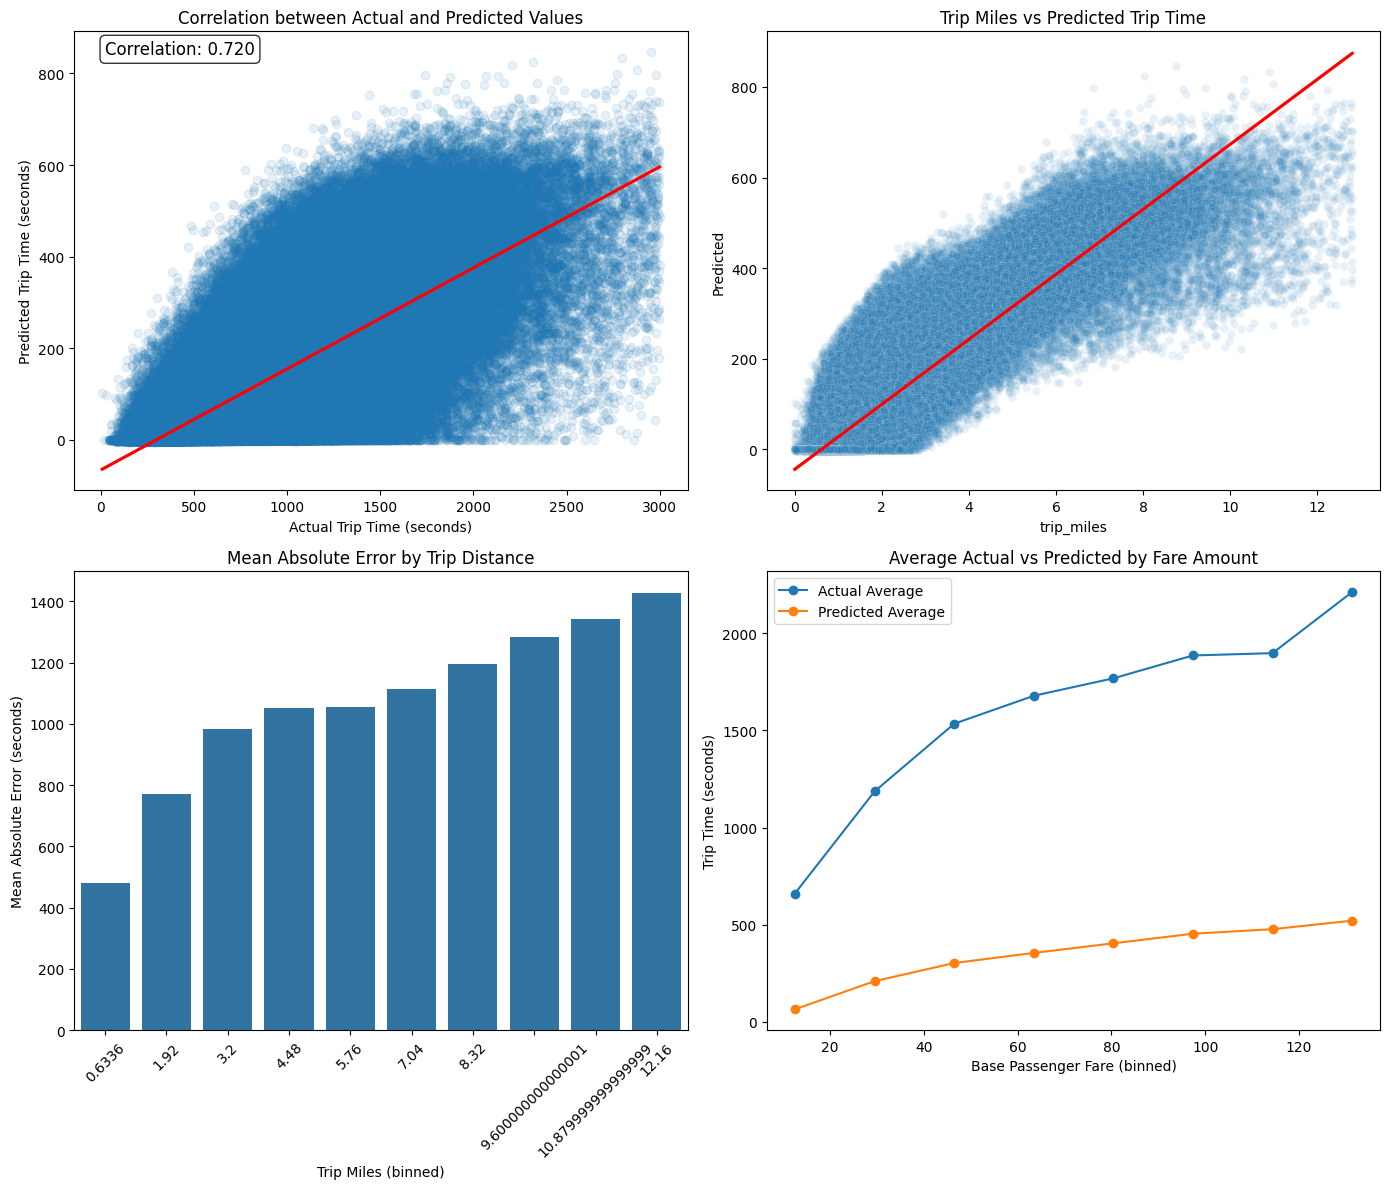

Correlation between Actual and Predicted: 0.720
Correlation between Trip Miles and Predicted Time: 0.906
Spearman Rank Correlation: 0.735


In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Assuming y_test, y_pred, and X_test are already defined
performance_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'trip_miles': X_test['trip_miles'],
    'base_passenger_fare': X_test['base_passenger_fare']
})

# Create figure with multiple plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Correlation between actual and predicted (even if weak)
sns.regplot(x='Actual', y='Predicted', data=performance_df,
            scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'}, ax=axes[0, 0])
axes[0, 0].set_title('Correlation between Actual and Predicted Values')
axes[0, 0].set_xlabel('Actual Trip Time (seconds)')
axes[0, 0].set_ylabel('Predicted Trip Time (seconds)')

# Calculate and display Pearson correlation
corr = performance_df[['Actual', 'Predicted']].corr().iloc[0, 1]
axes[0, 0].annotate(f'Correlation: {corr:.3f}', xy=(0.05, 0.95), xycoords='axes fraction',
                  fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# 2. Trip miles vs predictions
sns.scatterplot(x='trip_miles', y='Predicted', data=performance_df, alpha=0.1, ax=axes[0, 1])
axes[0, 1].set_title('Trip Miles vs Predicted Trip Time')
axes[0, 1].set_xlabel('Trip Miles')
axes[0, 1].set_ylabel('Predicted Trip Time (seconds)')

# Add best fit line
sns.regplot(x='trip_miles', y='Predicted', data=performance_df,
           scatter=False, line_kws={'color': 'red'}, ax=axes[0, 1])

# 3. Create bins for trip miles and show error trends
miles_bins = pd.cut(performance_df['trip_miles'], 10)
performance_df['abs_error'] = np.abs(performance_df['Actual'] - performance_df['Predicted'])
error_by_distance = performance_df.groupby(miles_bins)['abs_error'].mean().reset_index()
error_by_distance['bin_center'] = error_by_distance['trip_miles'].apply(lambda x: x.mid)

sns.barplot(x='bin_center', y='abs_error', data=error_by_distance, ax=axes[1, 0])
axes[1, 0].set_title('Mean Absolute Error by Trip Distance')
axes[1, 0].set_xlabel('Trip Miles (binned)')
axes[1, 0].set_ylabel('Mean Absolute Error (seconds)')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Compare actual and predicted by fare amount (binned)
fare_bins = pd.cut(performance_df['base_passenger_fare'], 8)
grouped = performance_df.groupby(fare_bins)[['Actual', 'Predicted']].mean().reset_index()
grouped['bin_center'] = grouped['base_passenger_fare'].apply(lambda x: x.mid)

# Plot as lines to show trends
axes[1, 1].plot(grouped['bin_center'], grouped['Actual'], 'o-', label='Actual Average')
axes[1, 1].plot(grouped['bin_center'], grouped['Predicted'], 'o-', label='Predicted Average')
axes[1, 1].set_title('Average Actual vs Predicted by Fare Amount')
axes[1, 1].set_xlabel('Base Passenger Fare (binned)')
axes[1, 1].set_ylabel('Trip Time (seconds)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Print some additional analysis
print(f"Correlation between Actual and Predicted: {corr:.3f}")
print(f"Correlation between Trip Miles and Predicted Time: {performance_df[['trip_miles', 'Predicted']].corr().iloc[0, 1]:.3f}")

# Check if predictions at least have correct ranking (Spearman correlation)
spearman_corr = performance_df[['Actual', 'Predicted']].corr(method='spearman').iloc[0, 1]
print(f"Spearman Rank Correlation: {spearman_corr:.3f}")

In [191]:
geo_test_df['trip_time'].sort_values()

3006476       0
3290186       1
2257466       1
355510        3
145551        3
           ... 
2477634    2999
2559297    2999
2098217    2999
922226     2999
2955560    2999
Name: trip_time, Length: 1377401, dtype: int64

<Axes: xlabel='base_passenger_fare', ylabel='trip_time'>

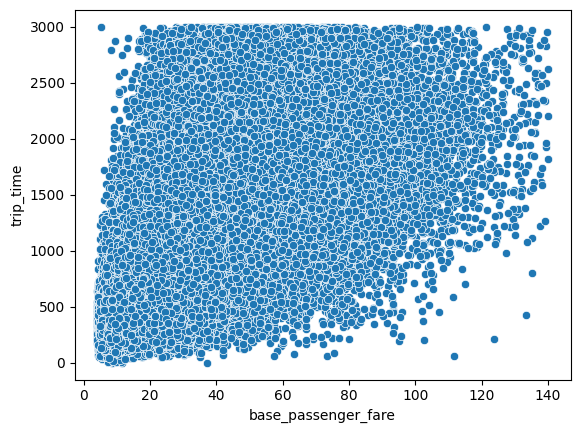

In [192]:
sns.scatterplot( data = geo_test_df_clipped, x = 'base_passenger_fare', y = 'trip_time')

<Axes: xlabel='base_passenger_fare', ylabel='predicted_trip_time'>

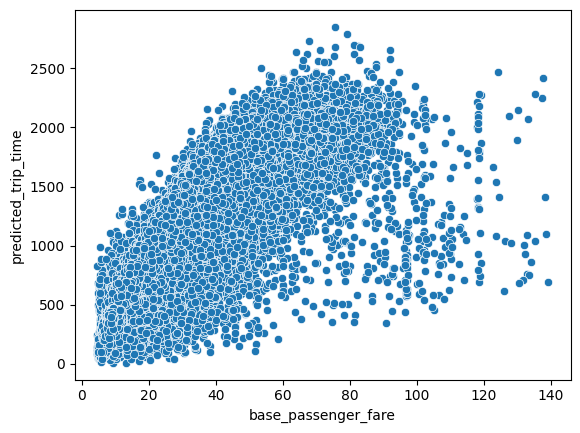

In [193]:
sns.scatterplot( data = distance_df_5, x = 'base_passenger_fare', y = 'predicted_trip_time')

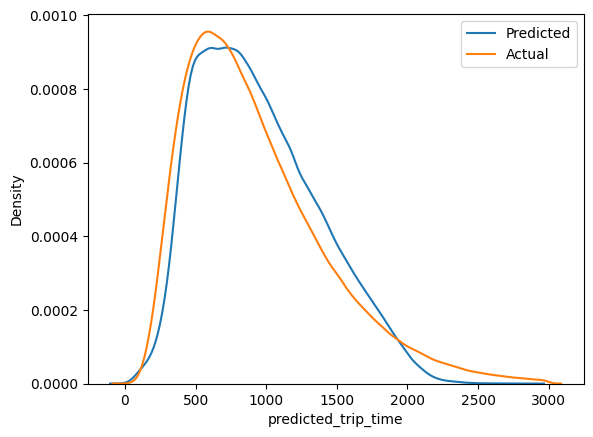

In [194]:
sns.kdeplot(distance_df_5['predicted_trip_time'], label='Predicted')
sns.kdeplot(geo_test_df['trip_time'], label='Actual')
plt.legend()


<Axes: xlabel='base_passenger_fare', ylabel='Density'>

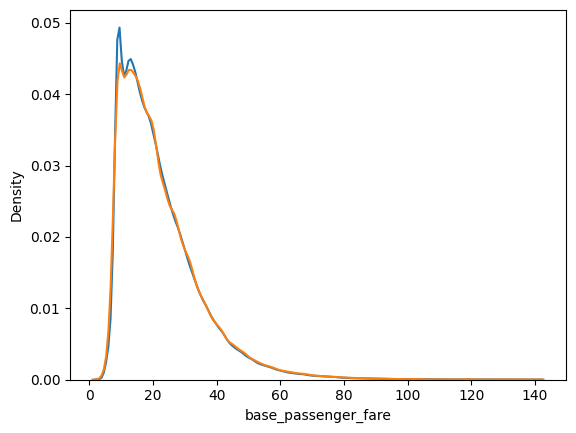

In [195]:
sns.kdeplot(geo_test_df['base_passenger_fare'], label='Real Fare')
sns.kdeplot(distance_df_5['base_passenger_fare'], label='Synthetic Fare')


In [196]:
geo_test_df

request_datetime   on_scene_datetime     pickup_datetime  \
394658  2024-04-02 18:33:05 2024-04-02 18:42:31 2024-04-02 18:42:51   
2327577 2024-04-09 23:35:19 2024-04-09 23:45:51 2024-04-09 23:46:48   
639206  2024-04-03 15:47:44 2024-04-03 15:51:13 2024-04-03 15:51:25   
2000864 2024-04-08 14:52:08 2024-04-08 14:54:54 2024-04-08 14:56:21   
629998  2024-04-03 14:55:45 2024-04-03 15:00:14 2024-04-03 15:00:49   
...                     ...                 ...                 ...   
1134248 2025-01-31 02:03:01 2025-01-31 02:06:23 2025-01-31 02:06:31   
1099635 2025-01-30 22:22:07 2025-01-30 22:26:12 2025-01-30 22:26:21   
343187  2025-01-27 22:00:10 2025-01-27 22:01:10 2025-01-27 22:01:37   
1123598 2025-01-31 00:29:54 2025-01-31 00:31:10 2025-01-31 00:33:11   
1031030 2025-01-30 19:42:49 2025-01-30 19:46:11 2025-01-30 19:47:16   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  \
394658  2024-04-02 18:55:04           246           234        1.49   
2327577 2024-04-09 23:53:13           164           100        0.85   
639206  2024-04-03 16:05:00           161           237        1.18   
2000864 2024-04-08 15:01:24           170           137        0.50   
629998  2024-04-03 15:16:28           231           211        1.85   
...                     ...           ...           ...         ...   
1134248 2025-01-31 02:13:26           186           125        2.23   
1099635 2025-01-30 22:45:22           234           236        3.80   
343187  2025-01-27 22:10:42            88             4        3.66   
1123598 2025-01-31 00:41:09           161           137        1.15   
1031030 2025-01-30 20:10:46           246           243        8.89   

         trip_time  base_passenger_fare  tolls   bcf  sales_tax  \
394658         733                10.22    0.0  0.30       0.96   
2327577        385                14.52    0.0  0.40       1.29   
639206         815                15.36    0.0  0.45       1.44   
2000864        303                 8.25    0.0  0.23       0.73   
629998         939                26.53    0.0  0.73       2.35   
...            ...                  ...    ...   ...        ...   
1134248        415                15.39    0.0  0.38       1.36   
1099635       1141                48.41    0.0  1.22       4.03   
343187         545                12.15    0.0  0.31       1.08   
1123598        478                10.96    0.0  0.27       1.03   
1031030       1410                30.82    0.0  0.80       2.73   

         congestion_surcharge  airport_fee                   pickup_zone  \
394658                   2.75          0.0     West Chelsea/Hudson Yards   
2327577                  2.75          0.0                 Midtown South   
639206                   2.75          0.0                Midtown Center   
2000864                  2.75          0.0                   Murray Hill   
629998                   2.75          0.0          TriBeCa/Civic Center   
...                       ...          ...                           ...   
1134248                  2.75          0.0  Penn Station/Madison Sq West   
1099635                  2.75          0.0                      Union Sq   
343187                   2.75          0.0      Financial District South   
1123598                  2.75          0.0                Midtown Center   
1031030                  2.75          0.0     West Chelsea/Hudson Yards   

                     dropoff_zone  
394658                   Union Sq  
2327577          Garment District  
639206      Upper East Side South  
2000864                  Kips Bay  
629998                       SoHo  
...                           ...  
1134248                 Hudson Sq  
1099635     Upper East Side North  
343187              Alphabet City  
1123598                  Kips Bay  
1031030  Washington Heights North  

[1377401 rows x 16 columns]

In [197]:
distance_df_5

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
8         15822268   2012-02-17 09:32:00.00000043          9.7   
...            ...                            ...          ...   
199673    44943450   2009-12-15 07:53:00.00000063          4.5   
199701    44895432    2009-09-16 10:46:52.0000001          6.1   
199735    18714081    2015-01-22 16:52:06.0000001          4.0   
199761    10343914  2013-06-24 13:06:00.000000176          6.0   
199873    36575161   2012-03-04 20:28:00.00000096          3.7   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06        -73.999817        40.738354   
1      2009-07-17 20:04:56        -73.994355        40.728225   
2      2009-08-24 21:45:00        -74.005043        40.740770   
4      2014-08-28 17:47:00        -73.925023        40.744085   
8      2012-02-17 09:32:00        -73.975187        40.745767   
...                    ...               ...              ...   
199673 2009-12-15 07:53:00        -73.973547        40.792330   
199701 2009-09-16 10:46:52        -73.974610        40.790523   
199735 2015-01-22 16:52:06        -73.972771        40.796940   
199761 2013-06-24 13:06:00        -73.957107        40.802107   
199873 2012-03-04 20:28:00        -73.963047        40.794090   

        dropoff_longitude  dropoff_latitude  passenger_count  \
0              -73.999512         40.723217                1   
1              -73.994710         40.750325                1   
2              -73.962565         40.772647                1   
4              -73.973082         40.761247                5   
8              -74.002720         40.743537                1   
...                   ...               ...              ...   
199673         -73.968370         40.787413                1   
199701         -73.961033         40.806596                1   
199735         -73.966850         40.798862                1   
199761         -73.969918         40.793960                1   
199873         -73.967232         40.788057                1   

        adjusted_base_fare  ...  pickup_dow_sin  pickup_dow_cos  pickup_hour  \
0                    17.39  ...        0.433884       -0.900969           19   
1                    18.41  ...       -0.433884       -0.900969           20   
2                    32.91  ...        0.000000        1.000000           21   
4                    41.00  ...        0.433884       -0.900969           17   
8                    24.95  ...       -0.433884       -0.900969            9   
...                    ...  ...             ...             ...          ...   
199673                8.99  ...        0.781831        0.623490            7   
199701               14.30  ...        0.974928       -0.222521           10   
199735                8.67  ...        0.433884       -0.900969           16   
199761               14.04  ...        0.000000        1.000000           13   
199873                8.68  ...       -0.781831        0.623490           20   

        pickup_hour_cos  pickup_hour_sin  pickup_minute  pickup_minute_cos  \
0             -0.965926         0.258819             52          -0.743145   
1             -0.866025         0.500000              4           0.406737   
2             -0.707107         0.707107             45          -1.000000   
4             -0.965926        -0.258819             47          -0.978148   
8              0.707107        -0.707107             32          -0.207912   
...                 ...              ...            ...                ...   
199673         0.965926        -0.258819             53          -0.669131   
199701         0.500000        -0.866025             46          -0.994522   
19

# Prep For Subzone Model

In [202]:
geo_test_df_clipped

request_datetime   on_scene_datetime     pickup_datetime  \
394658  2024-04-02 18:33:05 2024-04-02 18:42:31 2024-04-02 18:42:51   
2327577 2024-04-09 23:35:19 2024-04-09 23:45:51 2024-04-09 23:46:48   
639206  2024-04-03 15:47:44 2024-04-03 15:51:13 2024-04-03 15:51:25   
2000864 2024-04-08 14:52:08 2024-04-08 14:54:54 2024-04-08 14:56:21   
629998  2024-04-03 14:55:45 2024-04-03 15:00:14 2024-04-03 15:00:49   
...                     ...                 ...                 ...   
1134248 2025-01-31 02:03:01 2025-01-31 02:06:23 2025-01-31 02:06:31   
1099635 2025-01-30 22:22:07 2025-01-30 22:26:12 2025-01-30 22:26:21   
343187  2025-01-27 22:00:10 2025-01-27 22:01:10 2025-01-27 22:01:37   
1123598 2025-01-31 00:29:54 2025-01-31 00:31:10 2025-01-31 00:33:11   
1031030 2025-01-30 19:42:49 2025-01-30 19:46:11 2025-01-30 19:47:16   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  \
394658  2024-04-02 18:55:04           246           234        1.49   
2327577 2024-04-09 23:53:13           164           100        0.85   
639206  2024-04-03 16:05:00           161           237        1.18   
2000864 2024-04-08 15:01:24           170           137        0.50   
629998  2024-04-03 15:16:28           231           211        1.85   
...                     ...           ...           ...         ...   
1134248 2025-01-31 02:13:26           186           125        2.23   
1099635 2025-01-30 22:45:22           234           236        3.80   
343187  2025-01-27 22:10:42            88             4        3.66   
1123598 2025-01-31 00:41:09           161           137        1.15   
1031030 2025-01-30 20:10:46           246           243        8.89   

         trip_time  base_passenger_fare  tolls  ...  pickup_day_sin  \
394658         733                10.22    0.0  ...        0.913545   
2327577        385                14.52    0.0  ...       -0.309017   
639206         815                15.36    0.0  ...        0.809017   
2000864        303                 8.25    0.0  ...       -0.104528   
629998         939                26.53    0.0  ...        0.809017   
...            ...                  ...    ...  ...             ...   
1134248        415                15.39    0.0  ...        1.000000   
1099635       1141                48.41    0.0  ...        0.979530   
343187         545                12.15    0.0  ...        0.688967   
1123598        478                10.96    0.0  ...        1.000000   
1031030       1410                30.82    0.0  ...        0.979530   

         pickup_dayofweek  pickup_dow_sin  pickup_dow_cos pickup_hour  \
394658                  1        0.781831        0.623490          18   
2327577                 1        0.781831        0.623490          23   
639206                  2        0.974928       -0.222521          15   
2000864                 0        0.000000        1.000000          14   
629998                  2        0.974928       -0.222521          15   
...                   ...             ...             ...         ...   
1134248                 4       -0.433884       -0.900969           2   
1099635                 3        0.433884       -0.900969          22   
343187                  0        0.000000        1.000000          22   
1123598                 4       -0.433884       -0.900969           0   
1031030                 3        0.433884       -0.900969          19   

        pickup_hour_cos  pickup_hour_sin  pickup_minute  pickup_minute_cos  \
394658        -1.000000    -1.836970e-16             42          -0.951057   
2327577       -0.258819     9.659258e-01             46          -0.994522   
639206        -0.707107    -7.071068e-01             51          -0.809017   
2000864       -0.500000    -8.660254e-01             56          -0.406737   
629998        -0.707107    -7.071068e-01              0           0.000000   
...                 ...              ...            ...                ...   
1134248        0.500000     8

In [203]:
taxi_geo

OBJECTID  Shape_Leng                                           the_geom  \
0           1    0.116357  MULTIPOLYGON (((-74.18445299999996 40.69499599...   
1           2    0.433470  MULTIPOLYGON (((-73.82337597260663 40.63898704...   
2           3    0.084341  MULTIPOLYGON (((-73.84792614099985 40.87134223...   
3           4    0.043567  MULTIPOLYGON (((-73.97177410965318 40.72582128...   
4           5    0.092146  MULTIPOLYGON (((-74.17421738099989 40.56256808...   
..        ...         ...                                                ...   
258       256    0.067915  MULTIPOLYGON (((-73.95834207500002 40.71330630...   
259       259    0.126750  MULTIPOLYGON (((-73.85107116191898 40.91037152...   
260       260    0.133514  MULTIPOLYGON (((-73.90175373399988 40.76077547...   
261       261    0.027120  MULTIPOLYGON (((-74.01332610899988 40.70503078...   
262       262    0.049064  MULTIPOLYGON (((-73.94383256699986 40.78285908...   

     Shape_Area                       zone  LocationID        borough  
0      0.000782             Newark Airport           1            EWR  
1      0.004866                Jamaica Bay           2         Queens  
2      0.000314    Allerton/Pelham Gardens           3          Bronx  
3      0.000112              Alphabet City           4      Manhattan  
4      0.000498              Arden Heights           5  Staten Island  
..          ...                        ...         ...            ...  
258    0.000169  Williamsburg (South Side)         256       Brooklyn  
259    0.000395         Woodlawn/Wakefield         259          Bronx  
260    0.000422                   Woodside         260         Queens  
261    0.000034         World Trade Center         261      Manhattan  
262    0.000122             Yorkville East         262      Manhattan  

[263 rows x 7 columns]

In [204]:
pickup = taxi_geo[['the_geom', 'LocationID', 'zone']].copy()
pickup.columns= ['PU_Geom','PULocationID','PU_zone']
dropoff = taxi_geo[['the_geom', 'LocationID', 'zone']].copy()
dropoff.columns =['DO_Geom', 'DOLocationID', 'DO_zone']

In [205]:
geo_clipped_merged = pd.merge(
            geo_test_df_clipped,
            pickup,
            left_on = 'PULocationID',
            right_on = 'PULocationID',
            how = 'left'
)

geo_clipped_merged = pd.merge(
            geo_clipped_merged,
            dropoff,
            left_on = 'DOLocationID',
            right_on = 'DOLocationID',
            how = 'left'
)

In [206]:
geo_clipped_merged

request_datetime   on_scene_datetime     pickup_datetime  \
0       2024-04-02 18:33:05 2024-04-02 18:42:31 2024-04-02 18:42:51   
1       2024-04-09 23:35:19 2024-04-09 23:45:51 2024-04-09 23:46:48   
2       2024-04-03 15:47:44 2024-04-03 15:51:13 2024-04-03 15:51:25   
3       2024-04-08 14:52:08 2024-04-08 14:54:54 2024-04-08 14:56:21   
4       2024-04-03 14:55:45 2024-04-03 15:00:14 2024-04-03 15:00:49   
...                     ...                 ...                 ...   
1376301 2025-01-31 02:03:01 2025-01-31 02:06:23 2025-01-31 02:06:31   
1376302 2025-01-30 22:22:07 2025-01-30 22:26:12 2025-01-30 22:26:21   
1376303 2025-01-27 22:00:10 2025-01-27 22:01:10 2025-01-27 22:01:37   
1376304 2025-01-31 00:29:54 2025-01-31 00:31:10 2025-01-31 00:33:11   
1376305 2025-01-30 19:42:49 2025-01-30 19:46:11 2025-01-30 19:47:16   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  \
0       2024-04-02 18:55:04           246           234        1.49   
1       2024-04-09 23:53:13           164           100        0.85   
2       2024-04-03 16:05:00           161           237        1.18   
3       2024-04-08 15:01:24           170           137        0.50   
4       2024-04-03 15:16:28           231           211        1.85   
...                     ...           ...           ...         ...   
1376301 2025-01-31 02:13:26           186           125        2.23   
1376302 2025-01-30 22:45:22           234           236        3.80   
1376303 2025-01-27 22:10:42            88             4        3.66   
1376304 2025-01-31 00:41:09           161           137        1.15   
1376305 2025-01-30 20:10:46           246           243        8.89   

         trip_time  base_passenger_fare  tolls  ...  pickup_hour  \
0              733                10.22    0.0  ...           18   
1              385                14.52    0.0  ...           23   
2              815                15.36    0.0  ...           15   
3              303                 8.25    0.0  ...           14   
4              939                26.53    0.0  ...           15   
...            ...                  ...    ...  ...          ...   
1376301        415                15.39    0.0  ...            2   
1376302       1141                48.41    0.0  ...           22   
1376303        545                12.15    0.0  ...           22   
1376304        478                10.96    0.0  ...            0   
1376305       1410                30.82    0.0  ...           19   

         pickup_hour_cos  pickup_hour_sin  pickup_minute pickup_minute_cos  \
0              -1.000000    -1.836970e-16             42         -0.951057   
1              -0.258819     9.659258e-01             46         -0.994522   
2              -0.707107    -7.071068e-01             51         -0.809017   
3              -0.500000    -8.660254e-01             56         -0.406737   
4              -0.707107    -7.071068e-01              0          0.000000   
...                  ...              ...            ...               ...   
1376301         0.500000     8.660254e-01              6          0.587785   
1376302        -0.500000     8.660254e-01             26          0.406737   
1376303        -0.500000     8.660254e-01              1          0.104528   
1376304         0.000000     1.000000e+00             33         -0.309017   
1376305        -0.965926     2.588190e-01             47         -0.978148   

        pickup_minute_sin                                            PU_Geom  \
0               -0.309017  MULTIPOLYGON (((-74.00439976203513 40.76267135...   
1                0.104528  MULTIPOLYGON (((-73.98362519999995 40.74394311...   
2                0.587785  MULTIPOLYGON (((-73.97534377999993 40.75529969...   
3                0.913545  MULTIPOLYGON (((-73.97203331099983 40.74580496...   
4                1.000000  MULTIPOLYGON (((-74.00931760399995 40.72470155...   
...                   ...                                              

In [207]:
distance_df_5[['distance', 'distance_scaled']]

distance  distance_scaled
0       1.306177         1.612214
1       1.959462         2.418562
2       5.130495         6.332567
4       4.500249         5.554655
8       2.053647         2.534815
...          ...              ...
199673  0.696486         0.859672
199701  2.045850         2.525192
199735  0.541168         0.667964
199761  1.446102         1.784923
199873  0.705042         0.870233

[171077 rows x 2 columns]

In [208]:
distance_df_5.isna().sum()

Unnamed: 0                 0
key                        0
fare_amount                0
pickup_datetime            0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
passenger_count            0
adjusted_base_fare         0
distance                  90
base_passenger_fare        0
distance_scaled           90
trip_miles                90
pickup_year                0
pickup_month               0
pickup_month_cos           0
pickup_month_sin           0
pickup_day                 0
days_in_month              0
pickup_day_sin             0
pickup_day_cos             0
pickup_dayofweek           0
pickup_dow_sin             0
pickup_dow_cos             0
pickup_hour                0
pickup_hour_cos            0
pickup_hour_sin            0
pickup_minute              0
pickup_minute_cos          0
pickup_minute_sin          0
predicted_trip_time       90
estimated_dropoff_time    90
dtype: int64

In [209]:
distance_df_6 = distance_df_5.dropna()

In [210]:
distance_df_6.isna().sum()

Unnamed: 0                0
key                       0
fare_amount               0
pickup_datetime           0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
passenger_count           0
adjusted_base_fare        0
distance                  0
base_passenger_fare       0
distance_scaled           0
trip_miles                0
pickup_year               0
pickup_month              0
pickup_month_cos          0
pickup_month_sin          0
pickup_day                0
days_in_month             0
pickup_day_sin            0
pickup_day_cos            0
pickup_dayofweek          0
pickup_dow_sin            0
pickup_dow_cos            0
pickup_hour               0
pickup_hour_cos           0
pickup_hour_sin           0
pickup_minute             0
pickup_minute_cos         0
pickup_minute_sin         0
predicted_trip_time       0
estimated_dropoff_time    0
dtype: int64

In [211]:
from shapely import wkt
from shapely.geometry import Point
import geopandas as gpd

df = distance_df_6.copy()
gdf_zones = taxi_geo.copy()
gdf_zones['the_geom'] = gdf_zones['the_geom'].apply(wkt.loads)

df['pickup_point'] = df.apply(lambda row: Point(row['pickup_longitude'], row['pickup_latitude']), axis=1)
df['dropoff_point'] = df.apply(lambda row: Point(row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

gdf_pickups = gpd.GeoDataFrame(df, geometry='pickup_point', crs='EPSG:4326')
gdf_dropoffs = gpd.GeoDataFrame(df, geometry='dropoff_point', crs='EPSG:4326')
gdf_zones = gpd.GeoDataFrame(gdf_zones, geometry='the_geom', crs='EPSG:4326')

In [212]:
gdf_pickups = gpd.sjoin(gdf_pickups, gdf_zones[['LocationID', 'the_geom']], how='left', predicate='within')
gdf_pickups = gdf_pickups.rename(columns={'LocationID': 'PULocationID'})

gdf_dropoffs = gpd.sjoin(gdf_dropoffs, gdf_zones[['LocationID', 'the_geom']], how='left', predicate='within')
gdf_dropoffs = gdf_dropoffs.rename(columns={'LocationID': 'DOLocationID'})

gdf_combined = df.copy()
gdf_combined['PULocationID'] = gdf_pickups['PULocationID']
gdf_combined['DOLocationID'] = gdf_dropoffs['DOLocationID']
gdf_combined['dropoff_point'] = gdf_dropoffs['dropoff_point']
gdf_combined = gpd.GeoDataFrame(gdf_combined, geometry='dropoff_point', crs='EPSG:4326')

zone_counts = gdf_combined['DOLocationID'].value_counts()
zone_counts.head()

DOLocationID
161.0    7513
237.0    6349
236.0    6302
170.0    6118
230.0    5987
Name: count, dtype: int64

# Subzone Model

In [213]:
gdf_taxi_zones = pd.read_csv('/content/drive/MyDrive/PHASE_5_PROJECT/taxi_zones.csv')

In [221]:
gdf_taxi_zones

OBJECTID       Shape_Leng  \
0          1   0.116357453189   
1          2    0.43346966679   
2          3  0.0843411059012   
3          4  0.0435665270921   
4          5  0.0921464898574   
..       ...              ...   
258      256  0.0679149669603   
259      259   0.126750305191   
260      260   0.133514154636   
261      261  0.0271204563616   
262      262  0.0490636231541   

                                              geometry         Shape_Area  \
0    MULTIPOLYGON (((-74.18445 40.695, -74.18449 40...    0.0007823067885   
1    MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...   0.00486634037837   
2    MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...  0.000314414156821   
3    MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...  0.000111871946192   
4    MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...  0.000497957489363   
..                                                 ...                ...   
258  MULTIPOLYGON (((-73.95834 40.71331, -73.95681 ...  0.000168611097013   
259  MULTIPOLYGON (((-73.85107 40.91037, -73.85207 ...  0.000394552487366   
260  MULTIPOLYGON (((-73.90175 40.76078, -73.90147 ...  0.000422345326907   
261  MULTIPOLYGON (((-74.01333 40.70503, -74.01327 ...  0.000034342323165   
262  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...  0.000122330270966   

                          zone LocationID        borough  
0               Newark Airport          1            EWR  
1                  Jamaica Bay          2         Queens  
2      Allerton/Pelham Gardens          3          Bronx  
3                Alphabet City          4      Manhattan  
4                Arden Heights          5  Staten Island  
..                         ...        ...            ...  
258  Williamsburg (South Side)        256       Brooklyn  
259         Woodlawn/Wakefield        259          Bronx  
260                   Woodside        260         Queens  
261         World Trade Center        261      Manhattan  
262             Yorkville East        262      Manhattan  

[263 rows x 7 columns]

In [214]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Polygon
from shapely.ops import unary_union
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import joblib


def divide_polygon_correctly(poly, n_subzones=4):
    if n_subzones <= 1:
        return [poly]
    minx, miny, maxx, maxy = poly.bounds
    n = max(2, int(np.ceil(np.sqrt(n_subzones * 2))))

    dx = (maxx - minx) / n
    dy = (maxy - miny) / n

    grid_cells = []
    for i in range(n):
        for j in range(n):

            cell = Polygon([
                (minx + i*dx, miny + j*dy),
                (minx + (i+1)*dx, miny + j*dy),
                (minx + (i+1)*dx, miny + (j+1)*dy),
                (minx + i*dx, miny + (j+1)*dy)
            ])


            if cell.intersects(poly):

                intersection = cell.intersection(poly)


                if not intersection.is_empty and intersection.area > 0:
                    grid_cells.append(intersection)


    grid_cells.sort(key=lambda x: x.area, reverse=True)


    while len(grid_cells) > n_subzones:

        smallest_idx = len(grid_cells) - 1
        second_smallest_idx = len(grid_cells) - 2


        smallest = grid_cells[smallest_idx]
        second_smallest = grid_cells[second_smallest_idx]

        try:

            merged = smallest.union(second_smallest)


            if merged.geom_type != 'MultiPolygon':

                grid_cells.pop(smallest_idx)
                grid_cells.pop(second_smallest_idx)
                grid_cells.append(merged)
            else:

                grid_cells = grid_cells[:n_subzones]
                break
        except:

            grid_cells = grid_cells[:n_subzones]
            break


    subzones_union = unary_union(grid_cells)
    diff = poly.difference(subzones_union)


    if not diff.is_empty and diff.area > 0:

        leftover_polys = []
        if diff.geom_type == 'Polygon':
            leftover_polys = [diff]
        elif diff.geom_type == 'MultiPolygon':
            leftover_polys = list(diff.geoms)


        for leftover in leftover_polys:

            centroid = leftover.centroid


            min_dist = float('inf')
            closest_idx = 0

            for i, subzone in enumerate(grid_cells):
                dist = centroid.distance(subzone.centroid)
                if dist < min_dist:
                    min_dist = dist
                    closest_idx = i


            grid_cells[closest_idx] = grid_cells[closest_idx].union(leftover)

    return grid_cells

def create_density_based_subzones(taxi_zone_gdf, trip_counts, min_subzones=200, base_subzones=2, max_subzones=8, allowed_overlap_pct=2):
    """
    Create subzones with higher density in busy areas, lower in quiet areas
    """

    projected_gdf = taxi_zone_gdf.to_crs("EPSG:2263")


    all_zone_ids = [int(zone_id) for zone_id in projected_gdf['LocationID'].unique()]


    zone_subzone_counts = {zone_id: 1 for zone_id in all_zone_ids}

    total_trips = sum(trip_counts.values())
    print(f"Total trips across all zones: {total_trips}")


    trip_counts = {int(k): v for k, v in trip_counts.items()}


    zones_with_trips = set(trip_counts.keys())
    zones_without_trips = set(all_zone_ids) - zones_with_trips

    print(f"Zones with trip data: {len(zones_with_trips)}")
    print(f"Zones without trip data: {len(zones_without_trips)}")


    if len(zones_with_trips) > 0:

        sorted_zones = sorted(zones_with_trips, key=lambda z: trip_counts[z], reverse=True)


        target_multi_zones = min(len(zones_with_trips) // 4 + 1, 30)

        print(f"Target zones with multiple subzones: {target_multi_zones}")

        total_trips_in_active_zones = sum(trip_counts.get(z, 0) for z in zones_with_trips)


        top_busy_zones = sorted(zones_with_trips, key=lambda z: trip_counts[z], reverse=True)[:25]


        for zone_id in all_zone_ids:
          if zone_id in top_busy_zones:

            zone_portion = trip_counts.get(zone_id, 0) / total_trips_in_active_zones
            if zone_portion > 0.03:
              zone_subzone_counts[zone_id] = 3
            else:
                zone_subzone_counts[zone_id] = 2
        else:

            zone_subzone_counts[zone_id] = 1


    print("\nFinal subzone allocation:")
    total_subzones = sum(zone_subzone_counts.values())
    print(f"Total subzones to be created: {total_subzones}")

    all_subzones = []

    for idx, row in projected_gdf.iterrows():
        zone_id = int(row['LocationID'])
        zone_poly = row['geometry']
        n_subzones = zone_subzone_counts.get(zone_id, 1)

        subzones = divide_polygon_correctly(zone_poly, n_subzones)

        for j, subzone_shape in enumerate(subzones):
            all_subzones.append({
                'LocationID': zone_id,
                'subzone_id': f"{zone_id}_{j}",
                'geometry': subzone_shape,
                'zone_name': row.get('zone_name', ''),
                'borough': row.get('borough', ''),
                'n_subzones': n_subzones,
                'trip_count': trip_counts.get(zone_id, 0)
            })




    subzone_gdf = gpd.GeoDataFrame(all_subzones, geometry='geometry', crs="EPSG:2263")


    total_area = sum(subzone_gdf['geometry'].area)
    union_area = unary_union(subzone_gdf['geometry']).area
    overlap_pct = (total_area - union_area) / total_area * 100

    print(f"Created {len(subzone_gdf)} subzones with {overlap_pct:.2f}% overlap")


    subzone_counts = {}
    for count in zone_subzone_counts.values():
        subzone_counts[count] = subzone_counts.get(count, 0) + 1

    print("Subzone distribution by count:")
    for n in sorted(subzone_counts.keys()):
        print(f"  {subzone_counts[n]} zones have {n} subzones each")

    subzone_gdf['geometry_wkt'] = subzone_gdf['geometry'].apply(lambda x: x.wkt)

    return subzone_gdf.to_crs("EPSG:4326")



print("Loading taxi zone data...")
gdf_taxi_zones = gpd.read_file('/content/drive/MyDrive/PHASE_5_PROJECT/taxi_zones.csv')


if 'geometry' not in gdf_taxi_zones.columns and 'the_geom' in gdf_taxi_zones.columns:
    gdf_taxi_zones = gdf_taxi_zones.rename(columns={'the_geom': 'geometry'})

if not isinstance(gdf_taxi_zones, gpd.GeoDataFrame):

    if 'geometry' in gdf_taxi_zones.columns and isinstance(gdf_taxi_zones.iloc[0]['geometry'], str):
        from shapely import wkt
        gdf_taxi_zones['geometry'] = gdf_taxi_zones['geometry'].apply(wkt.loads)

    gdf_taxi_zones = gpd.GeoDataFrame(gdf_taxi_zones, geometry='geometry', crs='EPSG:4326')

print(f"Loaded {len(gdf_taxi_zones)} taxi zones")


trip_counts = {}
if 'gdf_combined' in globals():

    zone_counts = gdf_combined['DOLocationID'].value_counts().to_dict()
    trip_counts = {int(zone_id): count for zone_id, count in zone_counts.items()}
    print(f"Calculated trip counts for {len(trip_counts)} zones")
else:

    print("No trip data available. Using default trip counts.")
    for zone_id in gdf_taxi_zones['LocationID'].unique():
        trip_counts[zone_id] = 5000

print("Creating dynamic subzones based on trip volume...")
gdf_subzones = create_density_based_subzones(
    taxi_zone_gdf=gdf_taxi_zones,
    trip_counts=trip_counts,
    min_subzones=300,
    allowed_overlap_pct=2
)


print("Saving subzones to file...")
gdf_subzones.to_file("manhattan_subzones.geojson", driver="GeoJSON")




if 'gdf_combined' in globals() and len(gdf_combined) > 0:
    print("Joining trip data with subzones...")


    if gdf_combined.crs != gdf_subzones.crs:
        gdf_combined = gdf_combined.to_crs(gdf_subzones.crs)


    gdf_with_subzone = gdf_combined.copy()


    gdf_with_subzone = gpd.sjoin(
        gdf_with_subzone,
        gdf_subzones[['subzone_id', 'geometry']],
        how='left',
        predicate='within'
    )

    gdf_with_subzone = pd.merge(
        gdf_with_subzone,
        gdf_subzones[['subzone_id', 'geometry_wkt']],
        on='subzone_id',
        how='left'
    )

    gdf_with_subzone['target_subzone'] = gdf_with_subzone['subzone_id']
    gdf_with_subzone['subzone_geometry'] = gdf_with_subzone['geometry_wkt']


    gdf_with_subzone['PU_DO_route'] = (
        gdf_with_subzone['PULocationID'].astype(str) + '_' +
        gdf_with_subzone['DOLocationID'].astype(str)
    )

    print("Preparing data for modeling...")
    gdf_subzone = gdf_with_subzone.dropna(subset=['target_subzone']).copy()

    gdf_subzone['zone_id'] = gdf_subzone['target_subzone'].str.split('_').str[0].astype(int)
    gdf_subzone['subzone_index'] = gdf_subzone['target_subzone'].str.split('_').str[1].astype(int)


    if len(gdf_subzone) == 0:
        print("ERROR: No data left after filtering for target_subzone. Check your spatial join.")
    else:
        print(f"Data prepared. {len(gdf_subzone)} trips assigned to subzones.")


        print("Training separate models for each DOLocationID...")


        all_features = [
            'predicted_trip_time', 'base_passenger_fare', 'distance',
            'pickup_month_cos', 'pickup_month_sin', 'pickup_day_cos', 'pickup_day_sin',
            'pickup_dow_sin', 'pickup_dow_cos', 'pickup_hour_cos', 'pickup_hour_sin',
            'pickup_minute_cos', 'pickup_minute_sin', 'PU_DO_route'
        ]


        missing_features = [f for f in all_features if f not in gdf_subzone.columns]
        if missing_features:
            print(f"WARNING: Missing features: {missing_features}")
            print("Available columns:", gdf_subzone.columns.tolist())

            all_features = [f for f in all_features if f in gdf_subzone.columns]

        numeric_features = [f for f in [
            'predicted_trip_time', 'base_passenger_fare', 'distance',
            'pickup_month_cos', 'pickup_month_sin', 'pickup_day_cos', 'pickup_day_sin',
            'pickup_dow_sin', 'pickup_dow_cos', 'pickup_hour_cos', 'pickup_hour_sin',
            'pickup_minute_cos', 'pickup_minute_sin'
        ] if f in all_features]

        categorical_features = [f for f in ['PU_DO_route'] if f in all_features]
        final_features = numeric_features + categorical_features

        if not final_features:
            print("ERROR: No features available for modeling. Check your data.")
        else:
            print(f"Using features for prediction: {final_features}")


            os.makedirs('zone_models', exist_ok=True)


            unique_zones = gdf_subzone['DOLocationID'].unique()
            print(f"Training models for {len(unique_zones)} unique zones...")


            zone_models = {}


            zone_subzone_counts = gdf_subzones.groupby('LocationID').size().to_dict()


            for zone_id in tqdm(unique_zones):

                zone_data = gdf_subzone[gdf_subzone['DOLocationID'] == zone_id]


                if len(zone_data) < 10:
                  print(f"  Zone {zone_id} has insufficient data ({len(zone_data)} samples), assigned 1 subzone")

                  zone_subzone_counts[zone_id] = 1
                  zone_models[zone_id] = None
                  continue


                n_subzones = zone_subzone_counts.get(zone_id, 1)


                if n_subzones == 1:
                    print(f"  Zone {zone_id} has only 1 subzone, no model needed")
                    zone_models[zone_id] = None
                    continue

                print(f"  Training model for zone {zone_id} with {len(zone_data)} samples and {n_subzones} subzones")


                X = zone_data[final_features]
                y = zone_data['subzone_index']


                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.2, random_state=42
                )


                transformer_list = []
                if categorical_features:
                    transformer_list.append(('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features))
                if numeric_features:
                    transformer_list.append(('scale', StandardScaler(), numeric_features))

                preprocessor = ColumnTransformer(transformer_list)


                n_estimators = min(200, max(50, len(X_train) // 5))
                max_depth = min(15, max(5, int(np.log2(len(X_train)))))

                pipeline = Pipeline([
                    ('preprocess', preprocessor),
                    ('clf', RandomForestClassifier(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        min_samples_leaf=2,
                        n_jobs=-1,
                        random_state=42
                    ))
                ])


                pipeline.fit(X_train, y_train)


                train_acc = pipeline.score(X_train, y_train)
                test_acc = pipeline.score(X_test, y_test)
                print(f"    Zone {zone_id} model - Train Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}")


                zone_models[zone_id] = pipeline


                joblib.dump(pipeline, f'zone_models/zone_{zone_id}_model.joblib')


            zone_info = []
            for zone_id, n_subzones in zone_subzone_counts.items():
                zone_info.append({
                    'zone_id': zone_id,
                    'n_subzones': n_subzones,
                    'trip_count': trip_counts.get(zone_id, 0),
                    'has_model': zone_id in zone_models and zone_models[zone_id] is not None
                })

            zone_info_df = pd.DataFrame(zone_info)
            zone_info_df.to_csv('zone_models/zone_info.csv', index=False)

            print(f"Saved {len(zone_models)} zone-specific models")


            if 'geo_test_df_clipped' in globals():
                print("Making predictions on test data...")
                pred_df = geo_test_df_clipped.copy()
                pred_df['predicted_subzone'] = None
                pred_df['PU_DO_route'] = (
                    pred_df['PULocationID'].astype(str) + '_' +
                    pred_df['DOLocationID'].astype(str)
                )
                if 'trip_miles' in pred_df.columns and 'distance' not in pred_df.columns:
                    pred_df['distance'] = pred_df['trip_miles']
                if 'trip_time' in pred_df.columns and 'predicted_trip_time' not in pred_df.columns:
                    pred_df['predicted_trip_time'] = pred_df['trip_time']

                missing_test_features = [f for f in final_features if f not in pred_df.columns]
                if missing_test_features:
                    print(f"WARNING: Missing features in test data: {missing_test_features}")

                def predict_subzones_for_zone(zone_id, zone_test, zone_models, final_features):
                    predictions = []
                    indices = []
                    if zone_id not in zone_models or zone_models[zone_id] is None:
                        return [f"{zone_id}_0"] * len(zone_test), zone_test.index

                    pred_features = zone_test[final_features].dropna()
                    if len(pred_features) == 0:
                        return [f"{zone_id}_0"] * len(zone_test), zone_test.index

                    try:
                        pred_subzones = zone_models[zone_id].predict(pred_features)
                        for idx, subzone_idx in zip(pred_features.index, pred_subzones):
                            predictions.append(f"{zone_id}_{subzone_idx}")
                            indices.append(idx)
                        missing_indices = zone_test.index.difference(pred_features.index)
                        for idx in missing_indices:
                            predictions.append(f"{zone_id}_0")
                            indices.append(idx)
                    except Exception as e:
                        print(f"Error predicting for zone {zone_id}: {e}")
                        return [f"{zone_id}_0"] * len(zone_test), zone_test.index

                    return predictions, indices


                    prediction_dict = {}
                    for zone_id in tqdm(pred_df['DOLocationID'].unique()):
                      zone_test = pred_df[pred_df['DOLocationID'] == zone_id].copy()
                      zone_predictions, zone_indices = predict_subzones_for_zone(
                        int(zone_id), zone_test, zone_models, final_features
                        )


                      for idx, prediction in zip(zone_indices, zone_predictions):
                        prediction_dict[idx] = prediction

                    for idx, prediction in prediction_dict.items():
                        pred_df.loc[idx, 'predicted_subzone'] = prediction


                subzone_lookup = gdf_subzones[['subzone_id', 'geometry_wkt']].drop_duplicates()
                subzone_lookup['subzone_id'] = subzone_lookup['subzone_id'].astype(str)
                pred_df['predicted_subzone'] = pred_df['predicted_subzone'].astype(str)

                print("Merging predictions with subzone geometries...")
                merged_df = pd.merge(
                    pred_df,
                    subzone_lookup,
                    left_on='predicted_subzone',
                    right_on='subzone_id',
                    how='left',
                    suffixes=('', '_lookup')
                )

                merged_count = merged_df['geometry_wkt'].notna().sum()


                merged_df.rename(columns={'geometry_wkt': 'wkt_predicted_subzone'}, inplace=True)
                print("Saving prediction results...")
                merged_df.to_csv("predictions_with_subzones.csv", index=False)
                geo_test_df_clipped = merged_df
            else:
                print("No trip data available for model training. Only subzones were created.")

print("Processing complete!")

Loading taxi zone data...
Loaded 263 taxi zones
Calculated trip counts for 93 zones
Creating dynamic subzones based on trip volume...
Total trips across all zones: 170762
Zones with trip data: 93
Zones without trip data: 167
Target zones with multiple subzones: 24

Final subzone allocation:
Total subzones to be created: 294
Created 297 subzones with 0.00% overlap
Subzone distribution by count:
  235 zones have 1 subzones each
  16 zones have 2 subzones each
  9 zones have 3 subzones each
Saving subzones to file...
Joining trip data with subzones...
Preparing data for modeling...
Data prepared. 170762 trips assigned to subzones.
Training separate models for each DOLocationID...
Using features for prediction: ['predicted_trip_time', 'base_passenger_fare', 'distance', 'pickup_month_cos', 'pickup_month_sin', 'pickup_day_cos', 'pickup_day_sin', 'pickup_dow_sin', 'pickup_dow_cos', 'pickup_hour_cos', 'pickup_hour_sin', 'pickup_minute_cos', 'pickup_minute_sin', 'PU_DO_route']
Training models f

  0%|          | 0/93 [00:00<?, ?it/s]

  Zone 211.0 has only 1 subzone, no model needed
  Training model for zone 186.0 with 5197 samples and 3 subzones


  2%|▏         | 2/93 [00:00<00:33,  2.70it/s]

    Zone 186.0 model - Train Acc: 0.77, Test Acc: 0.59
  Training model for zone 237.0 with 6349 samples and 3 subzones


  3%|▎         | 3/93 [00:01<00:48,  1.84it/s]

    Zone 237.0 model - Train Acc: 0.69, Test Acc: 0.53
  Training model for zone 161.0 with 7513 samples and 3 subzones


  4%|▍         | 4/93 [00:02<00:58,  1.53it/s]

    Zone 161.0 model - Train Acc: 0.70, Test Acc: 0.47
  Training model for zone 68.0 with 4623 samples and 2 subzones


  5%|▌         | 5/93 [00:03<00:57,  1.53it/s]

    Zone 68.0 model - Train Acc: 0.78, Test Acc: 0.67
  Training model for zone 236.0 with 6302 samples and 3 subzones


  6%|▋         | 6/93 [00:03<01:00,  1.44it/s]

    Zone 236.0 model - Train Acc: 0.71, Test Acc: 0.69
  Training model for zone 79.0 with 5290 samples and 3 subzones


  8%|▊         | 7/93 [00:04<01:00,  1.42it/s]

    Zone 79.0 model - Train Acc: 0.76, Test Acc: 0.73
  Training model for zone 238.0 with 3319 samples and 2 subzones


  9%|▊         | 8/93 [00:05<00:57,  1.48it/s]

    Zone 238.0 model - Train Acc: 0.88, Test Acc: 0.62
  Training model for zone 163.0 with 4732 samples and 2 subzones


 10%|▉         | 9/93 [00:05<00:56,  1.48it/s]

    Zone 163.0 model - Train Acc: 0.85, Test Acc: 0.63
  Zone 233.0 has only 1 subzone, no model needed
  Training model for zone 230.0 with 5987 samples and 3 subzones


 12%|█▏        | 11/93 [00:06<00:44,  1.84it/s]

    Zone 230.0 model - Train Acc: 0.74, Test Acc: 0.48
  Training model for zone 170.0 with 6118 samples and 3 subzones


 13%|█▎        | 12/93 [00:07<00:48,  1.67it/s]

    Zone 170.0 model - Train Acc: 0.69, Test Acc: 0.53
  Training model for zone 162.0 with 5952 samples and 3 subzones


 14%|█▍        | 13/93 [00:08<00:51,  1.56it/s]

    Zone 162.0 model - Train Acc: 0.83, Test Acc: 0.46
  Training model for zone 246.0 with 3197 samples and 2 subzones


 15%|█▌        | 14/93 [00:08<00:50,  1.58it/s]

    Zone 246.0 model - Train Acc: 0.91, Test Acc: 0.70
  Zone 148.0 has only 1 subzone, no model needed
  Zone 158.0 has only 1 subzone, no model needed
  Training model for zone 231.0 with 3301 samples and 2 subzones


 18%|█▊        | 17/93 [00:09<00:30,  2.46it/s]

    Zone 231.0 model - Train Acc: 0.73, Test Acc: 0.64
  Training model for zone 239.0 with 4289 samples and 2 subzones


 19%|█▉        | 18/93 [00:10<00:34,  2.16it/s]

    Zone 239.0 model - Train Acc: 0.69, Test Acc: 0.57
  Zone 143.0 has only 1 subzone, no model needed
  Zone 75.0 has only 1 subzone, no model needed
  Training model for zone 141.0 with 4293 samples and 2 subzones


 23%|██▎       | 21/93 [00:10<00:25,  2.83it/s]

    Zone 141.0 model - Train Acc: 0.83, Test Acc: 0.64
  Training model for zone 107.0 with 4316 samples and 2 subzones


 24%|██▎       | 22/93 [00:11<00:29,  2.45it/s]

    Zone 107.0 model - Train Acc: 0.72, Test Acc: 0.71
  Training model for zone 142.0 with 4789 samples and 2 subzones


 25%|██▍       | 23/93 [00:12<00:32,  2.14it/s]

    Zone 142.0 model - Train Acc: 0.82, Test Acc: 0.63
  Zone 90.0 has only 1 subzone, no model needed
  Training model for zone 140.0 with 3055 samples and 2 subzones


 27%|██▋       | 25/93 [00:12<00:27,  2.45it/s]

    Zone 140.0 model - Train Acc: 0.79, Test Acc: 0.60
  Zone 261.0 has only 1 subzone, no model needed
  Training model for zone 48.0 with 4993 samples and 2 subzones


 29%|██▉       | 27/93 [00:13<00:25,  2.60it/s]

    Zone 48.0 model - Train Acc: 0.80, Test Acc: 0.64
  Training model for zone 234.0 with 5489 samples and 3 subzones


 30%|███       | 28/93 [00:14<00:29,  2.19it/s]

    Zone 234.0 model - Train Acc: 0.74, Test Acc: 0.47
  Zone 112.0 has only 1 subzone, no model needed
  Zone 88.0 has only 1 subzone, no model needed
  Zone 41.0 has only 1 subzone, no model needed
  Training model for zone 229.0 with 3190 samples and 2 subzones


 34%|███▍      | 32/93 [00:14<00:18,  3.33it/s]

    Zone 229.0 model - Train Acc: 0.76, Test Acc: 0.57
  Zone 4.0 has only 1 subzone, no model needed
  Zone 12.0 has only 1 subzone, no model needed
  Zone 137.0 has only 1 subzone, no model needed
  Zone 179.0 has only 1 subzone, no model needed
  Training model for zone 249.0 with 3550 samples and 2 subzones


 40%|███▉      | 37/93 [00:15<00:12,  4.60it/s]

    Zone 249.0 model - Train Acc: 0.79, Test Acc: 0.60
  Training model for zone 164.0 with 4103 samples and 2 subzones


 41%|████      | 38/93 [00:16<00:14,  3.67it/s]

    Zone 164.0 model - Train Acc: 0.69, Test Acc: 0.61
  Zone 224.0 has only 1 subzone, no model needed
  Zone 262.0 has only 1 subzone, no model needed
  Training model for zone 263.0 with 3301 samples and 2 subzones


 44%|████▍     | 41/93 [00:16<00:13,  3.96it/s]

    Zone 263.0 model - Train Acc: 0.79, Test Acc: 0.61
  Zone 145.0 has only 1 subzone, no model needed
  Zone 144.0 has only 1 subzone, no model needed
  Zone 125.0 has only 1 subzone, no model needed
  Zone 114.0 has only 1 subzone, no model needed
  Zone 69.0 has only 1 subzone, no model needed
  Zone 166.0 has only 1 subzone, no model needed
  Zone 43.0 has only 1 subzone, no model needed
  Zone 87.0 has only 1 subzone, no model needed
  Zone 151.0 has only 1 subzone, no model needed
  Training model for zone 100.0 with 3252 samples and 2 subzones


100%|██████████| 93/93 [00:17<00:00,  5.33it/s]

    Zone 100.0 model - Train Acc: 0.89, Test Acc: 0.56
  Zone 24.0 has only 1 subzone, no model needed
  Zone 17.0 has only 1 subzone, no model needed
  Zone 65.0 has insufficient data (7 samples), assigned 1 subzone
  Zone 7.0 has only 1 subzone, no model needed
  Zone 74.0 has only 1 subzone, no model needed
  Zone 116.0 has only 1 subzone, no model needed
  Zone 113.0 has only 1 subzone, no model needed
  Zone 209.0 has only 1 subzone, no model needed
  Zone 255.0 has only 1 subzone, no model needed
  Zone 244.0 has only 1 subzone, no model needed
  Zone 80.0 has only 1 subzone, no model needed
  Zone 50.0 has only 1 subzone, no model needed
  Zone 13.0 has only 1 subzone, no model needed
  Zone 243.0 has only 1 subzone, no model needed
  Zone 232.0 has only 1 subzone, no model needed
  Zone 146.0 has only 1 subzone, no model needed
  Zone 247.0 has only 1 subzone, no model needed
  Zone 45.0 has only 1 subzone, no model needed
  Zone 66.0 has only 1 subzone, no model needed
  Zone 

Merging predictions with subzone geometries...
Saving prediction results...
Processing complete!


In [204]:
geo_test_df_clipped

request_datetime   on_scene_datetime     pickup_datetime  \
0       2024-04-02 18:33:05 2024-04-02 18:42:31 2024-04-02 18:42:51   
1       2024-04-09 23:35:19 2024-04-09 23:45:51 2024-04-09 23:46:48   
2       2024-04-03 15:47:44 2024-04-03 15:51:13 2024-04-03 15:51:25   
3       2024-04-08 14:52:08 2024-04-08 14:54:54 2024-04-08 14:56:21   
4       2024-04-03 14:55:45 2024-04-03 15:00:14 2024-04-03 15:00:49   
...                     ...                 ...                 ...   
1376301 2025-01-31 02:03:01 2025-01-31 02:06:23 2025-01-31 02:06:31   
1376302 2025-01-30 22:22:07 2025-01-30 22:26:12 2025-01-30 22:26:21   
1376303 2025-01-27 22:00:10 2025-01-27 22:01:10 2025-01-27 22:01:37   
1376304 2025-01-31 00:29:54 2025-01-31 00:31:10 2025-01-31 00:33:11   
1376305 2025-01-30 19:42:49 2025-01-30 19:46:11 2025-01-30 19:47:16   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  \
0       2024-04-02 18:55:04           246           234        1.49   
1       2024-04-09 23:53:13           164           100        0.85   
2       2024-04-03 16:05:00           161           237        1.18   
3       2024-04-08 15:01:24           170           137        0.50   
4       2024-04-03 15:16:28           231           211        1.85   
...                     ...           ...           ...         ...   
1376301 2025-01-31 02:13:26           186           125        2.23   
1376302 2025-01-30 22:45:22           234           236        3.80   
1376303 2025-01-27 22:10:42            88             4        3.66   
1376304 2025-01-31 00:41:09           161           137        1.15   
1376305 2025-01-30 20:10:46           246           243        8.89   

         trip_time  base_passenger_fare  tolls  ...  pickup_hour_sin  \
0              733                10.22    0.0  ...    -1.836970e-16   
1              385                14.52    0.0  ...     9.659258e-01   
2              815                15.36    0.0  ...    -7.071068e-01   
3              303                 8.25    0.0  ...    -8.660254e-01   
4              939                26.53    0.0  ...    -7.071068e-01   
...            ...                  ...    ...  ...              ...   
1376301        415                15.39    0.0  ...     8.660254e-01   
1376302       1141                48.41    0.0  ...     8.660254e-01   
1376303        545                12.15    0.0  ...     8.660254e-01   
1376304        478                10.96    0.0  ...     1.000000e+00   
1376305       1410                30.82    0.0  ...     2.588190e-01   

         pickup_minute  pickup_minute_cos  pickup_minute_sin  \
0                   42          -0.951057          -0.309017   
1                   46          -0.994522           0.104528   
2                   51          -0.809017           0.587785   
3                   56          -0.406737           0.913545   
4                    0           0.000000           1.000000   
...                ...                ...                ...   
1376301              6           0.587785           0.809017   
1376302             26           0.406737          -0.913545   
1376303              1           0.104528           0.994522   
1376304             33          -0.309017          -0.951057   
1376305             47          -0.978148           0.207912   

        predicted_subzone PU_DO_route  distance  predicted_trip_time  \
0                    None     246_234      1.49                  733   
1                    None     164_100      0.85                  385   
2                    None     161_237      1.18                  815   
3                    None     170_137      0.50                  303   
4                    None     231_211      1.85                  939   
...                   ...         ...       ...                  ...   
1376301              None     186_125      2.23                  415   
1376302              None     234_236      3.80                 1141   
1376303              No

In [ ]:
geo_test_df_clipped.to_parquet('/content/drive/MyDrive/PHASE_5_PROJECT/geo_test_df_TEST.parqet', index=False)

In [206]:
END_DF = pd.read_parquet('/content/drive/MyDrive/PHASE_5_PROJECT/geo_test_df_TEST.parqet')

In [213]:
END_DF.columns

Index(['request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'pickup_zone', 'dropoff_zone',
       'pickup_year', 'pickup_month', 'pickup_month_cos', 'pickup_month_sin',
       'pickup_day', 'days_in_month', 'pickup_day_cos', 'pickup_day_sin',
       'pickup_dayofweek', 'pickup_dow_sin', 'pickup_dow_cos', 'pickup_hour',
       'pickup_hour_cos', 'pickup_hour_sin', 'pickup_minute',
       'pickup_minute_cos', 'pickup_minute_sin', 'predicted_subzone',
       'PU_DO_route', 'zone_id_feature', 'distance', 'predicted_trip_time',
       'subzone_id_x', 'wkt_predicted_subzone', 'subzone_id_y',
       'wkt_predicted_subzone_1', 'subzone_id', 'wkt_predicted_subzone_2',
       'subzone_id_lookup', 'wkt_predicted_subzone_3', 'Total_Fare'],
      dtype='object')

In [212]:
END_DF['Total_Fare'] = END_DF['base_passenger_fare'] + END_DF['bcf'] + END_DF['sales_tax'] + END_DF['congestion_surcharge']

In [208]:
END_DF['subzone_id_lookup'].value_counts().unique()

array([45723, 41350, 40623, 39992, 35527, 35427, 35231, 35092, 33399,
       30357, 28924, 28046, 27821, 27409, 26879, 25155, 25126, 25001,
       24952, 24846, 24570, 24530, 23795, 22981, 22687, 22469, 22418,
       21791, 21629, 21409, 21293, 20204, 19827, 19824, 18656, 18602,
       18598, 18470, 17788, 17326, 17070, 17065, 16916, 15976, 15581,
       15062, 14322, 13127, 12682, 12327, 11327,  9885,  9680,  9592,
        9254,  8835,  8615,  8493,  8333,  8165,  7447,  7378,  6323,
        5608,  5598,  5282,  4880,  4063,  3783,  3145,  2994,  2525,
        2378,  1968,  1545,  1246,  1231,  1191,  1048,  1040,   884,
         820,   802,   786,   731,   688,   527,   438,   343,   337,
         266,   256,   196,   166,   101,    88,    67,    42,    38,
           3])

In [ ]:
geo_test_df_clipped

In [223]:
geo_test_df_clipped

request_datetime   on_scene_datetime     pickup_datetime  \
0       2024-04-02 18:33:05 2024-04-02 18:42:31 2024-04-02 18:42:51   
1       2024-04-09 23:35:19 2024-04-09 23:45:51 2024-04-09 23:46:48   
2       2024-04-03 15:47:44 2024-04-03 15:51:13 2024-04-03 15:51:25   
3       2024-04-08 14:52:08 2024-04-08 14:54:54 2024-04-08 14:56:21   
4       2024-04-03 14:55:45 2024-04-03 15:00:14 2024-04-03 15:00:49   
...                     ...                 ...                 ...   
1376301 2025-01-31 02:03:01 2025-01-31 02:06:23 2025-01-31 02:06:31   
1376302 2025-01-30 22:22:07 2025-01-30 22:26:12 2025-01-30 22:26:21   
1376303 2025-01-27 22:00:10 2025-01-27 22:01:10 2025-01-27 22:01:37   
1376304 2025-01-31 00:29:54 2025-01-31 00:31:10 2025-01-31 00:33:11   
1376305 2025-01-30 19:42:49 2025-01-30 19:46:11 2025-01-30 19:47:16   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  \
0       2024-04-02 18:55:04           246           234        1.49   
1       2024-04-09 23:53:13           164           100        0.85   
2       2024-04-03 16:05:00           161           237        1.18   
3       2024-04-08 15:01:24           170           137        0.50   
4       2024-04-03 15:16:28           231           211        1.85   
...                     ...           ...           ...         ...   
1376301 2025-01-31 02:13:26           186           125        2.23   
1376302 2025-01-30 22:45:22           234           236        3.80   
1376303 2025-01-27 22:10:42            88             4        3.66   
1376304 2025-01-31 00:41:09           161           137        1.15   
1376305 2025-01-30 20:10:46           246           243        8.89   

         trip_time  base_passenger_fare  tolls  ...  pickup_hour_sin  \
0              733                10.22    0.0  ...    -1.836970e-16   
1              385                14.52    0.0  ...     9.659258e-01   
2              815                15.36    0.0  ...    -7.071068e-01   
3              303                 8.25    0.0  ...    -8.660254e-01   
4              939                26.53    0.0  ...    -7.071068e-01   
...            ...                  ...    ...  ...              ...   
1376301        415                15.39    0.0  ...     8.660254e-01   
1376302       1141                48.41    0.0  ...     8.660254e-01   
1376303        545                12.15    0.0  ...     8.660254e-01   
1376304        478                10.96    0.0  ...     1.000000e+00   
1376305       1410                30.82    0.0  ...     2.588190e-01   

         pickup_minute  pickup_minute_cos  pickup_minute_sin  \
0                   42          -0.951057          -0.309017   
1                   46          -0.994522           0.104528   
2                   51          -0.809017           0.587785   
3                   56          -0.406737           0.913545   
4                    0           0.000000           1.000000   
...                ...                ...                ...   
1376301              6           0.587785           0.809017   
1376302             26           0.406737          -0.913545   
1376303              1           0.104528           0.994522   
1376304             33          -0.309017          -0.951057   
1376305             47          -0.978148           0.207912   

        predicted_subzone PU_DO_route  distance  predicted_trip_time  \
0                    None     246_234      1.49                  733   
1                    None     164_100      0.85                  385   
2                    None     161_237      1.18                  815   
3                    None     170_137      0.50                  303   
4                    None     231_211      1.85                  939   
...                   ...         ...       ...                  ...   
1376301              None     186_125      2.23                  415   
1376302              None     234_236      3.80                 1141   
1376303              No

In [224]:
geo_test_df_clipped.isna().sum()

request_datetime               0
on_scene_datetime              0
pickup_datetime                0
dropoff_datetime               0
PULocationID                   0
DOLocationID                   0
trip_miles                     0
trip_time                      0
base_passenger_fare            0
tolls                          0
bcf                            0
sales_tax                      0
congestion_surcharge           0
airport_fee                    0
pickup_zone                    0
dropoff_zone                   0
pickup_year                    0
pickup_month                   0
pickup_month_cos               0
pickup_month_sin               0
pickup_day                     0
days_in_month                  0
pickup_day_cos                 0
pickup_day_sin                 0
pickup_dayofweek               0
pickup_dow_sin                 0
pickup_dow_cos                 0
pickup_hour                    0
pickup_hour_cos                0
pickup_hour_sin                0
pickup_minute                  0
pickup_minute_cos              0
pickup_minute_sin              0
predicted_subzone              0
PU_DO_route                    0
distance                       0
predicted_trip_time            0
subzone_id               1376306
wkt_predicted_subzone    1376306
dtype: int64

Starting simplified map creation...
Found WKT columns: ['wkt_predicted_subzone', 'wkt_predicted_subzone_1', 'wkt_predicted_subzone_2', 'wkt_predicted_subzone_3']
Using 'wkt_predicted_subzone_3' for geometry data
Using 'subzone_id_lookup' for subzone IDs
Found 100 unique subzones
Successfully parsed 100 valid geometries
Processed subzones: 100
Missing subzones: 0
Found 64 unique zones
Map saved to taxi_zones_simple_map.png
Map creation successful!


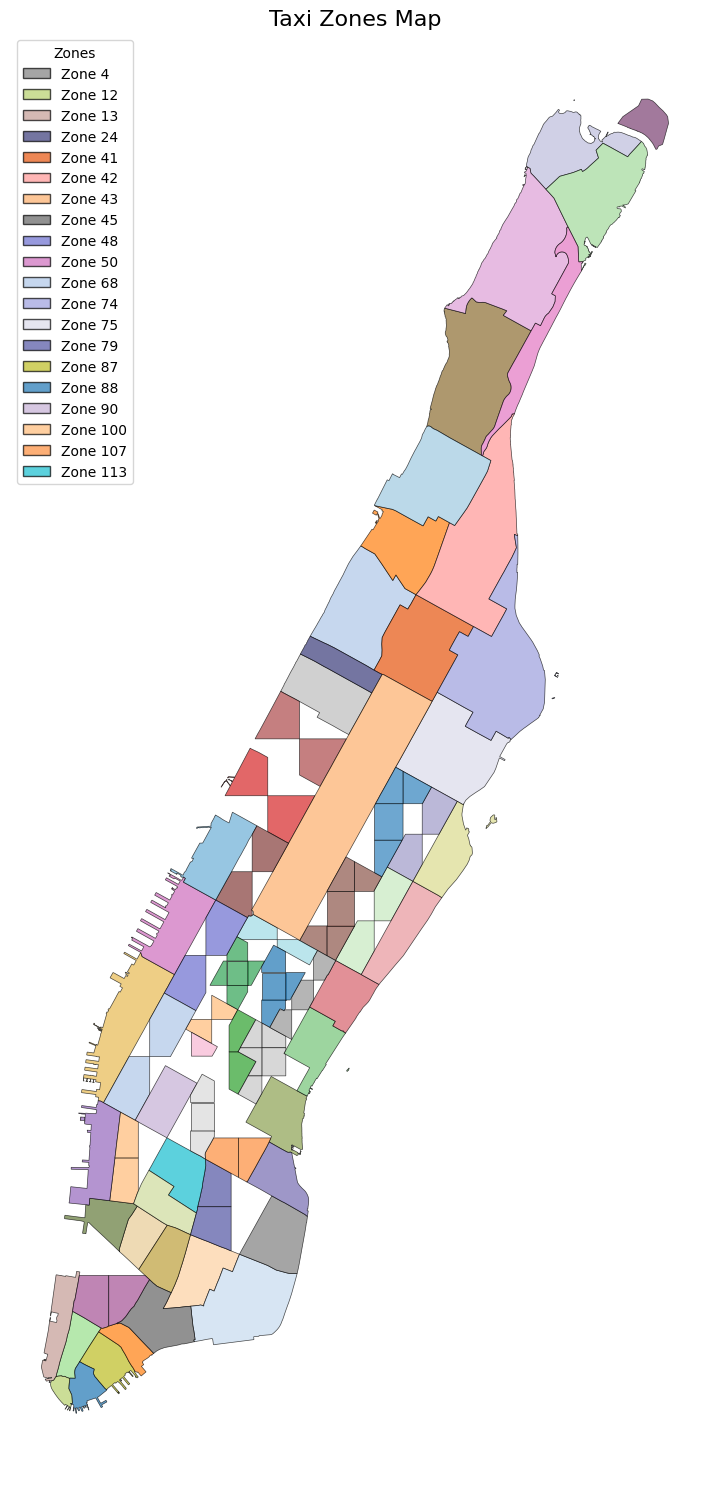

In [209]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt
import pandas as pd
import numpy as np
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
import random


def create_simple_map(geo_df, output_file='taxi_zones_simple_map.png'):

    print("Starting simplified map creation...")


    wkt_columns = [col for col in geo_df.columns if 'wkt_predicted_subzone' in col]
    print(f"Found WKT columns: {wkt_columns}")
    wkt_col = wkt_columns[-1]

    subzone_id_col = 'subzone_id_lookup'

    print(f"Using '{wkt_col}' for geometry data")
    print(f"Using '{subzone_id_col}' for subzone IDs")

    unique_data = geo_df[[subzone_id_col, wkt_col]].dropna().drop_duplicates(subzone_id_col)
    print(f"Found {len(unique_data)} unique subzones")


    valid_geoms = []
    valid_ids = []

    for idx, row in unique_data.iterrows():
        try:
            wkt_str = row[wkt_col]

            if not isinstance(wkt_str, str) or not (wkt_str.startswith('POLYGON') or wkt_str.startswith('MULTIPOLYGON')):
                print(f"Invalid WKT format for {row[subzone_id_col]}: {type(wkt_str)} - {wkt_str[:50]}...")
                continue

            geom = wkt.loads(wkt_str)
            if geom and not geom.is_empty and geom.is_valid:
                valid_geoms.append(geom)
                valid_ids.append(row[subzone_id_col])
            else:
                print(f"Empty or invalid geometry for {row[subzone_id_col]}")
        except Exception as e:
            print(f"Error parsing geometry for {row[subzone_id_col]}: {e}")

    print(f"Successfully parsed {len(valid_geoms)} valid geometries")


    processed_subzones = set(valid_ids)
    all_subzones = set(unique_data[subzone_id_col].tolist())
    missing_subzones = all_subzones - processed_subzones

    print(f"Processed subzones: {len(processed_subzones)}")
    print(f"Missing subzones: {len(missing_subzones)}")
    if missing_subzones:
        print("First 10 missing subzones:", list(missing_subzones)[:10])

    if not valid_geoms:
        print("No valid geometries found. Cannot create map.")
        return None

    zone_ids = [subzone_id.split('_')[0] for subzone_id in valid_ids]
    unique_zones = list(set(zone_ids))
    print(f"Found {len(unique_zones)} unique zones")


    color_map = {}
    colors = plt.cm.tab20(np.linspace(0, 1, 20))
    if len(unique_zones) > 20:
        colors = np.vstack([colors, plt.cm.tab20b(np.linspace(0, 1, 20))])
    if len(unique_zones) > 40:
        colors = np.vstack([colors, plt.cm.tab20c(np.linspace(0, 1, 20))])

    for i, zone_id in enumerate(unique_zones):
        color_idx = i % len(colors)
        color_map[zone_id] = colors[color_idx]


    fig, ax = plt.subplots(figsize=(15, 15))


    for geom, subzone_id in zip(valid_geoms, valid_ids):
        zone_id = subzone_id.split('_')[0]
        color = color_map.get(zone_id, (0.5, 0.5, 0.5, 1.0))


        if geom.geom_type == 'Polygon':
            x, y = geom.exterior.xy
            ax.fill(x, y, alpha=0.7, fc=color, ec='black', linewidth=0.5)
        elif geom.geom_type == 'MultiPolygon':
            for poly in geom.geoms:
                x, y = poly.exterior.xy
                ax.fill(x, y, alpha=0.7, fc=color, ec='black', linewidth=0.5)

    ax.set_aspect('equal')


    plt.title('Taxi Zones Map', fontsize=16)


    plt.axis('off')

    legend_elements = []
    for zone_id, color in sorted(color_map.items(), key=lambda x: int(x[0]) if x[0].isdigit() else float('inf')):
        legend_elements.append(
            patches.Patch(facecolor=color, edgecolor='black', alpha=0.7, label=f'Zone {zone_id}')
        )

    if legend_elements:
        ax.legend(handles=legend_elements[:20], loc='best', fontsize=10, title='Zones')


    plt.tight_layout()
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Map saved to {output_file}")

    return True


try:
    success = create_simple_map(END_DF, 'taxi_zones_simple_map.png')
    print("Map creation successful!" if success else "Map creation failed.")
except Exception as e:
    print(f"Error creating map: {e}")
    import traceback
    traceback.print_exc()

In [226]:
savings_df = pd.read_csv("/content/drive/MyDrive/PHASE_5_PROJECT/_savings.csv")

In [ ]:
geo_test_df_clipped.isna().sum()

In [ ]:
geo_test_df_clipped[['']]

In [ ]:
geo_test_df_clipped.columns

In [ ]:
geo_test_df_clipped

In [ ]:
Pre_Pricing_df = geo_test_df_clipped.dropna(axis=1, how ='all')

In [ ]:
Pre_Pricing_df.isna().sum()

In [ ]:
Pre_Pricing_df_2 = Pre_Pricing_df.dropna()

In [ ]:
Pre_Pricing_df_2

In [ ]:
Pre_Pricing_df_2['subzone_id'].value_counts(ascending=True)[:25]

In [ ]:
Pre_Pricing_df_2.columns

In [ ]:
Pre_Pricing_df_2['Total_fare'] = Pre_Pricing_df_2['base_passenger_fare'] + Pre_Pricing_df_2['bcf'] + Pre_Pricing_df_2['sales_tax'] + Pre_Pricing_df_2['congestion_surcharge']

In [ ]:
Pre_Pricing_df_2

In [ ]:
Pre_Pricing_df_2.columns

In [ ]:
Pre_Pricing_df_3 = Pre_Pricing_df_2.drop(columns = ['DOLocationID','base_passenger_fare', 'tolls', 'bcf',
       'sales_tax', 'congestion_surcharge', 'airport_fee', 'pickup_zone',
       'dropoff_zone', 'pickup_month_cos','pickup_year', 'pickup_month',
       'pickup_month_sin', 'pickup_day', 'days_in_month', 'pickup_day_cos',
       'pickup_day_sin', 'pickup_dow_sin',
       'pickup_dow_cos', 'pickup_hour', 'pickup_hour_cos', 'pickup_hour_sin',
       'pickup_minute', 'pickup_minute_cos', 'pickup_minute_sin', 'predicted_subzone', 'PU_DO_route',])

In [ ]:
Pre_Pricing_df_3

In [ ]:
Pre_Pricing_df_3["geometry"] = gpd.GeoSeries.from_wkt(Pre_Pricing_df_3["wkt_predicted_subzone"])

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(Pre_Pricing_df_3, geometry="geometry", crs="EPSG:4326")

# Save to a fast-loading binary file
gdf.to_pickle("/content/drive/MyDrive/full_data_with_geometry.pkl")

In [ ]:
Pre_Pricing_df_3.to_parquet('/content/drive/MyDrive/Final_Data_.parquet', index=False)